# Project 2: Ames Housing Data & Kaggle Challenge - Vikas Kalia


## Problem Statement
City of Boston has very comprehensive set of data on the sales transactions of the houses across some of its neighborhoods. Given the rich quality of the data, there is an opportunity to use data science modeling techniques to predict sale price for any new property that comes up for sale in these neighborhoods. Challenge of this project is to conduct a detailed EDA & feature engineering with very high number of features available with the datasets.

## Executive Summary
Objective of this project is to use past housing dataset with sale price and apply linear regression modeling after data cleaning, preprocessing, feature engineering and exploratory data analysis. Through model evaluation process, regularization techniques like Ridge and Lasso will be leveraged to tune the model to predict sale price of the house provided in the test dataset. Finally, summary of the analysis of modeling process will be documented and predicted sale price for houses in the test dataset will be submitted to Kaggle to get root mean square error of the predicted sale prices. 

### Contents table below provides the framework used to conduct this study & submission*.
- **Import Data Science Libraries**
- **Load Data** 
- **Phase 1 Data Cleaning, EDA & Feature Engineering**
- **Phase 1 Modeling - Training & Evaluation**
- **Phase 1 Submission of predictions to Kaggle**
- **Phase 2 EDA & Feature Engineering**
- **Phase 2 Modeling - Training & Evaluation**
- **Phase 2 Submission of predictions to Kaggle**
- **Project Summary Report**

**Note: While listed in sequence, these activities listed above are iterative in nature, so the flow can be back and forth among these activities to ultimately to select the best features as predictors of the target variable, i.e. sale price.'**

### Jupyter Notebooks list:
**Following notebooks are created to complete this study**
- **/code/Main_Project_2_VK.ipynb** - Main notebook 
- **/code/Train_test_split_Project_2_VK.ipynb** - for train_test_split the train dataset
- **/code/Phase 1 Modeling_Project_2_VK.ipynb** - for phase 1 - modeling, submission of prediction to Kaggle.
- **/code/Phase 2 Modeling_Project_2_VK.ipynb** - for phase 2 - modeling, submission of prediction to Kaggle.

### Datasets
**Datasets used - downloaded from Kaggle:**
- '../datasets/test.csv'
- '../datasets/train.csv'
- '../sample

**Datasets created**
***Through inital train_test_split of train dataset***
- '../datasets/x_train.csv'
- '../datasets/x_test.csv'
- '../datasets/y_train.csv'
- '../datasets/y_test.csv'

**Post data cleaning, EDA, preprocessing and feature engineering**

For **Phase 1** of feature selection and modeling 
- '../datasets/x_train_for_mod.csv'
- '../datasets/x_test_for_mod.csv'
- '../datasets/y_train_for_mod.csv'
- '../datasets/y_test_for_mod.csv'
- '../datasets/test_for_mod.csv'

For **Phase 2** of feature selection and modeling
- '../datasets/x_train_for_mod_p2.csv'
- '../datasets/x_test_for_mod_p2.csv'
- '../datasets/y_train_for_mod_p2.csv'
- '../datasets/y_test_for_mod_p2.csv'
- '../datasets/test_for_mod_p2.csv'

**Datasets submitted**
- '../datasets/submission.csv'       <== 'Intial submission with just one predictor'
- '../datasets/submission_lasso.csv' <== 'Submission with predictions from phase 1 lassoCV model'
- '../datasets/submission_lassoCV_p2.csv' <== 'Phase 2 submission with predictions from lassoCV model'
- '../datasets/submission_lr_p2.csv' <== 'Phase 2 submission with predictions from lr model'

### DataFrame naming convention for Main Notebook
- Training DataFrame name : df
- Training Target(y) DF name : y_train
- Validation DataFrame name : df_test
- Validate Target(y) DF name : y_test
- Test DataFrame name: test

### Threshholds used data cleaning and preprocessing
- For categorical features with two only classes, if one of the class is in more that 95% of the observations, then that feature will be dropped from the modelling
- For categorical features with more than two classes, if one of the class is in more that 70% of the observations, then that feature will be dropped from the modelling
- Any feature with more than 30% of observations with missing values will be dropped
- Among numerical features, inital plan is drop all features within +.4 and -.2 values of corr coef with target variable SalePrice. Only exception is 'Lot Area' feature with corr lower than .4. and will explained below
- If the correlation among the two predictors is greater than .8, then the feature with lower correlation with SalePrice will be dropped 

### Approach for Dropping Features 
- All numercial features are dropped in two phases and all categorical features are dropped in one place in the notebook for better tracability, even though the discovery and decision to drop those are made at different stages. Only exception is for the columns that are dropped after the one-hot-encoding to match columns among train and test DFs.
- Selected features are always dropped from three dataframes i.e. df, df_test & test.

### Approach for Dropping Observations(rows)
- Selected observations are always dropped from two dataframes i.e. df, y_train.

### Modeling Approach:
- First Linear Regression model called 'lr1' is created using one numerical feature Overall Qual and uploaded into Kaggle for testing.
- **Phase 1** of final models are built using notebook called **Phase1_Modeling_Project_2_VK.ipynb** on the features selected thru phase 1 of EDA and Feature Engineering. Following models are built:
    - Baseline model
    - Linear Regression
    - RidgeCV
    - LassoCV
    - ElasticNetCV
    
- **Phase 2** of final modeling will be conducted thru **Phase2_Modeling_Project_2_VK.ipynb** on the features selected thru phase 2 of EDA and Feature Engineering. Following models are builts:
    - Linear Regression
    - RidgeCV
    - LassoCV
    - ElasticNetCV


## Import Data Science Libraries

In [421]:
#Importing all libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns
import math as math

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from IPython.display import display

from datetime import date

pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

import datetime as datetime

In [422]:
# My Custom color and font scheme - to be used across all graphs 
my_title_col = 'darkslategray'
my_label_col = 'darkslategray'
my_graph_col = 'darkcyan'
my_title_font = 18
my_label_font = 14


## Load Data
### Approach
- **Train dataset is first split into train and test datasets for once and stored into .csv files for the use of EDA,data cleaning,preprocessing and feature selection. This is done to avoid random selection by train_test_split function everytime we run the main notebook.** 
- **After data cleaning, transformaiton and feature selection, final dataframe are stored in .csv formats to be referred for modelling.**

**For first time only run /code/'Train_test_split_Project_2_VK.ipynb'**

In [423]:
#import datasets into pandas dataframes
orig_train= pd.read_csv('../datasets/train.csv')
orig_test = pd.read_csv('../datasets/test.csv')
test = orig_test.copy()
df = pd.read_csv('../datasets/x_train.csv')
df_test = pd.read_csv('../datasets/x_test.csv')
y_train = pd.read_csv('../datasets/y_train.csv')
y_test = pd.read_csv('../datasets/y_test.csv')


In [424]:
print(df.shape,df_test.shape,y_train.shape,test.shape)

(1538, 81) (513, 81) (1538, 1) (879, 80)


In [425]:
orig_train.shape

(2051, 81)

## Phase 1 Data Cleaning & EDA

In [426]:
#df.info()

## Missing values

In [427]:
# function to explore the descriptive values and correlatio with target variable SalePrice
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [428]:
# review the correlation with SalePrice as well as nulls and missing values of each feature 
details = rstr(df, 'SalePrice')
display(details.sort_values(by='corr SalePrice', ascending=False))

Data shape: (1538, 81)
___________________________
Data types:
 object     42
int64      28
float64    11
Name: types, dtype: int64
___________________________


types  counts  distincts  nulls  missing_ration                                            uniques   skewness    kurtosis  corr SalePrice
SalePrice          int64    1538        689      0        0.000000  [[147000, 118500, 212999, 118000, 229000, 1245...   1.605276    3.683531        1.000000
Overall Qual       int64    1538         10      0        0.000000                  [[5, 6, 8, 7, 9, 4, 3, 10, 2, 1]]   0.194963    0.094921        0.813402
Gr Liv Area        int64    1538        886      0        0.000000  [[1122, 816, 1500, 698, 2183, 1041, 1718, 1872...   1.209952    3.946967        0.698893
Garage Cars      float64    1537          7      1        0.065020              [[2.0, 0.0, 3.0, 1.0, 4.0, nan, 5.0]]  -0.179949    0.306690        0.663162
Garage Area      float64    1537        458      1        0.065020  [[528.0, 0.0, 674.0, 786.0, 270.0, 427.0, 531....   0.264543    0.879767        0.662243
Total Bsmt SF    float64    1537        770      1        0.065020  [[924.0, 816.0, 1489.0, 698.0, 1204.0, 1041.0,...   1.291565   11.000695        0.636622
1st Flr SF         int64    1538        799      0        0.000000  [[1122, 816, 1500, 698, 1377, 1041, 885, 1299,...   1.368628    5.912724        0.626153
Year Built         int64    1538        110      0        0.000000  [[1948, 1990, 2006, 1947, 1988, 1959, 1998, 20...  -0.619247   -0.492821        0.584560
Year Remod/Add     int64    1538         61      0        0.000000  [[2005, 1990, 2006, 2008, 1988, 1959, 1998, 20...  -0.455091   -1.354678        0.550696
Full Bath          int64    1538          5      0        0.000000                                  [[1, 2, 3, 4, 0]]   0.144084   -0.558332        0.546589
Garage Yr Blt    float64    1459        101     79        5.136541  [[1948.0, nan, 2005.0, 1988.0, 1959.0, 1998.0,...  -0.158567    3.618301        0.540627
Mas Vnr Area     float64    1521        321     17        1.105332  [[0.0, 104.0, 132.0, 178.0, 40.0, 108.0, 30.0,...   2.348939    6.767471        0.538234
TotRms AbvGrd      int64    1538         12      0        0.000000         [[6, 5, 7, 4, 9, 11, 8, 10, 3, 12, 2, 13]]   0.798024    1.098041        0.511269
Fireplaces         int64    1538          5      0        0.000000                                  [[0, 1, 2, 4, 3]]   0.697541    0.180647        0.476729
BsmtFin SF 1     float64    1537        706      1        0.065020  [[144.0, 816.0, 36.0, 0.0, 1002.0, 991.0, 990....   1.559449    9.590485        0.427745
Wood Deck SF       int64    1538        270      0        0.000000  [[0, 144, 224, 160, 92, 48, 246, 198, 126, 212...   2.185388   10.290110        0.341239
Lot Frontage     float64    1295        115    243       15.799740  [[100.0, 81.0, 73.0, 50.0, nan, 80.0, 74.0, 75...   2.069052   17.191023        0.331182
Lot Area           int64    1538       1150      0        0.000000  [[12000, 11841, 8760, 9405, 13837, 9600, 10141...   6.292319   73.339673        0.318579
Open Porch SF      int64    1538        203      0        0.000000  [[36, 32, 38, 200, 0, 88, 94, 122, 39, 84, 92,...   2.179713    6.889248        0.312222
Bsmt Full Bath   float64    1536          5      2        0.130039                        [[1.0, 0.0, 2.0, nan, 3.0]]   0.588206   -0.826242        0.282568
Half Bath          int64    1538          3      0        0.000000                                        [[0, 1, 2]]   0.774918   -0.855540        0.281339
2nd Flr SF         int64    1538        420      0        0.000000  [[0, 806, 833, 573, 561, 1371, 720, 684, 1203,...   0.926821   -0.364375        0.242753
Bsmt Unf SF      float64    1537        834      1        0.065020  [[172.0, 0.0, 1453.0, 698.0, 50.0, 832.0, 309....   0.982527    0.533022        0.190842
Screen Porch       int64    1538         83      0        0.000000  [[0, 291, 135, 396, 88, 480, 171, 322, 266, 95...   3.783187   15.208080        0.168497
Bedroom AbvGr      int64    1538          7      0        0.000000                            

In [429]:
#Percentage of NAN - missing Values 
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"]).sort_values('percentage',ascending = False)


In [430]:
NAN.head(10)

column_name  percentage
73        Pool QC   99.544863
75   Misc Feature   96.618986
7           Alley   93.888166
74          Fence   80.104031
58   Fireplace Qu   47.659298
4    Lot Frontage   15.799740
61  Garage Finish    5.136541
64    Garage Qual    5.136541
60  Garage Yr Blt    5.136541
65    Garage Cond    5.136541

In [431]:
df.shape

(1538, 81)

In [432]:
# Exctrating continous columns into separate dataframe
nums_df = df.select_dtypes(exclude=['object'])

#Percentage numerical field with zero values 
zeros = [(c, (nums_df[c] == 0).mean()*100) for c in nums_df]
zeros = pd.DataFrame(zeros, columns=["column_name", "percentage"]).sort_values('percentage',ascending = False)
zeros.head(10)

column_name  percentage
34        Pool Area   99.544863
32       3Ssn Porch   98.959688
16  Low Qual Fin SF   98.504551
35         Misc Val   96.618986
19   Bsmt Half Bath   93.563069
33     Screen Porch   91.287386
11     BsmtFin SF 2   88.166450
31   Enclosed Porch   83.615085
21        Half Bath   64.109233
15       2nd Flr SF   59.167750

In [433]:
df['3Ssn Porch'].value_counts() # making sure that zero is not a meaningful value

0      1522
168       2
153       2
508       1
407       1
323       1
255       1
245       1
224       1
182       1
180       1
140       1
120       1
96        1
86        1
Name: 3Ssn Porch, dtype: int64

In [434]:
df['Pool Area'].value_counts() # making sure that zero is not a meaningful value

0      1531
800       1
738       1
648       1
576       1
561       1
480       1
228       1
Name: Pool Area, dtype: int64

In [435]:
df['Low Qual Fin SF'].value_counts() # making sure that zero is not a meaningful value

0       1515
697        1
53         1
80         1
108        1
114        1
120        1
140        1
144        1
156        1
234        1
259        1
1064       1
362        1
371        1
390        1
397        1
436        1
450        1
473        1
479        1
512        1
572        1
312        1
Name: Low Qual Fin SF, dtype: int64

In [436]:
df['Misc Val'].value_counts() # making sure that zero is not a meaningful value

0        1486
400         8
600         6
500         6
450         4
2000        4
700         3
3000        2
4500        2
1200        2
54          1
80          1
8300        1
12500       1
6500        1
3500        1
2500        1
1300        1
900         1
455         1
460         1
1500        1
1150        1
800         1
480         1
Name: Misc Val, dtype: int64

In [437]:
df['Bsmt Half Bath'].value_counts() # making sure that zero is not a meaningful value. Even though zero is a meaning value
# in th is case, howewver other values are less then one percent so will not have impact on sales price.

0.0    1439
1.0      95
2.0       2
Name: Bsmt Half Bath, dtype: int64

In [438]:
df['Screen Porch'].value_counts() # making sure that zero is not a meaningful value but missing data

0      1404
144       8
180       6
168       6
224       5
216       5
200       3
155       3
192       3
189       3
120       3
142       2
170       2
210       2
195       2
95        2
100       2
165       2
161       2
112       2
156       2
147       2
145       2
160       2
175       2
225       2
322       2
240       2
116       1
291       1
312       1
143       1
342       1
140       1
138       1
135       1
130       1
126       1
122       1
348       1
115       1
150       1
113       1
374       1
111       1
108       1
385       1
396       1
94        1
90        1
88        1
84        1
64        1
148       1
152       1
222       1
153       1
217       1
227       1
231       1
208       1
201       1
233       1
196       1
234       1
190       1
252       1
182       1
255       1
176       1
410       1
174       1
171       1
259       1
264       1
266       1
163       1
162       1
270       1
271       1
276       1
288       1
480       1
Name

In [439]:
df['BsmtFin SF 2'].value_counts() # making sure that zero is not a meaningful value but missing data

0.0       1356
294.0        5
539.0        3
180.0        3
72.0         3
290.0        2
273.0        2
80.0         2
117.0        2
495.0        2
162.0        2
202.0        2
96.0         2
551.0        2
108.0        2
465.0        2
670.0        2
483.0        2
955.0        1
1085.0       1
546.0        1
713.0        1
1039.0       1
750.0        1
1073.0       1
852.0        1
842.0        1
435.0        1
869.0        1
215.0        1
1063.0       1
1127.0       1
354.0        1
590.0        1
1080.0       1
531.0        1
506.0        1
281.0        1
270.0        1
173.0        1
262.0        1
580.0        1
239.0        1
149.0        1
175.0        1
466.0        1
163.0        1
850.0        1
12.0         1
841.0        1
76.0         1
308.0        1
232.0        1
252.0        1
60.0         1
240.0        1
40.0         1
127.0        1
712.0        1
624.0        1
52.0         1
1120.0       1
93.0         1
64.0         1
38.0         1
28.0         1
380.0     

In [440]:
df['Enclosed Porch'].value_counts() # making sure that zero is not a meaningful value but missing data

0      1286
112      10
96        8
128       6
36        5
144       5
180       5
40        4
60        4
70        4
77        4
84        4
216       4
100       4
120       4
168       4
192       4
148       4
56        3
212       3
156       3
140       3
164       3
64        3
105       3
176       3
150       3
240       3
236       3
280       3
116       2
252       2
78        2
158       2
264       2
68        2
234       2
135       2
115       2
244       2
48        2
184       2
186       2
45        2
80        2
211       2
222       2
30        2
218       2
34        2
35        2
228       2
205       2
39        2
200       2
126       2
42        2
94        1
288       1
88        1
90        1
92        1
87        1
291       1
101       1
81        1
99        1
98        1
246       1
294       1
75        1
16        1
18        1
19        1
23        1
24        1
26        1
330       1
37        1
324       1
44        1
50        1
55        1
57  

In [441]:
df[df['Garage Area'].isnull() == True]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice
146  2237  910201180           70        RM          50.0      9060   Pave   NaN       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR        Norm        Norm      1Fam      2Story             5             6        1923            1999      Gable   CompShg      Wd Sdng      Plywood         None           0.0         TA         TA     BrkTil        Gd        TA            No            ALQ         548.0            Unf           0.0        311.0          859.0    GasA         Ex           Y      SBrkr         942         886                0         1828             0.0             0.0          2          0              3              1           Gd              6        Typ           0          NaN      Detchd            NaN           NaN          NaN          NaN         NaN         NaN           Y           174              0             212           0             0          0     NaN  MnPrv          NaN         0        3     2007       WD      150909

In [442]:
# filling NAN Garage Area feature with mean value of garage - just one row with nulls
df['Garage Area'].fillna(df['Garage Area'].mean(), inplace = True) 
df_test['Garage Area'].fillna(df_test['Garage Area'].mean(), inplace = True) 
test['Garage Area'].fillna(test['Garage Area'].mean(), inplace = True) 


 

In [443]:
df[df['Garage Area'].isnull() == True]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [444]:
df[df['Garage Cars'].isnull() == True]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice
146  2237  910201180           70        RM          50.0      9060   Pave   NaN       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR        Norm        Norm      1Fam      2Story             5             6        1923            1999      Gable   CompShg      Wd Sdng      Plywood         None           0.0         TA         TA     BrkTil        Gd        TA            No            ALQ         548.0            Unf           0.0        311.0          859.0    GasA         Ex           Y      SBrkr         942         886                0         1828             0.0             0.0          2          0              3              1           Gd              6        Typ           0          NaN      Detchd            NaN           NaN          NaN   477.839948         NaN         NaN           Y           174              0             212           0             0          0     NaN  MnPrv          NaN         0        3     2007       WD      150909

In [445]:
df['Garage Cars'][(df['Garage Area'] > 400) & (df['Garage Area'] < 500)].value_counts()

2.0    315
1.0     13
3.0      1
Name: Garage Cars, dtype: int64

In [446]:
# filling NAN Garage Cars feature with number 2, as garages between 400 and 500 sqft can accomodate 2 cars
df['Garage Cars'].fillna(2, inplace = True) 
df_test['Garage Cars'].fillna(2, inplace = True) 
test['Garage Cars'].fillna(2, inplace = True) 



df['Garage Cars'].isnull().sum()
  

0

In [447]:
df[df['Total Bsmt SF'].isnull() == True]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice
455  1342  903230120           20        RM          99.0      5940   Pave   NaN       IR1          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr        Norm      1Fam      1Story             4             7        1946            1950      Gable   CompShg      MetalSd       CBlock         None           0.0         TA         TA      PConc       NaN       NaN           NaN            NaN           NaN            NaN           NaN          NaN            NaN    GasA         TA           Y      FuseA         896           0                0          896             NaN             NaN          1          0              2              1           TA              4        Typ           0          NaN      Detchd         1946.0           Unf          1.0        280.0          TA          TA           Y             0              0               0           0             0          0     NaN  MnPrv          NaN         0        4     2008     ConLD      79000

In [448]:
df[['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1', \
   'BsmtFin Type 2','Bsmt Unf SF','Total Bsmt SF']][df['Bsmt Qual'].isnull() == True].head()

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  Bsmt Unf SF  Total Bsmt SF
48        NaN       NaN           NaN            NaN           0.0            NaN          0.0            0.0
135       NaN       NaN           NaN            NaN           0.0            NaN          0.0            0.0
147       NaN       NaN           NaN            NaN           0.0            NaN          0.0            0.0
262       NaN       NaN           NaN            NaN           0.0            NaN          0.0            0.0
268       NaN       NaN           NaN            NaN           0.0            NaN          0.0            0.0

In [449]:
# filling NAN 'Total Bsmt SF' feature with 0 since whenever other Basement related features lije Bmnt Qual have missing value 
# Total Bsmt SF is also has 0 value. 
df['Total Bsmt SF'].fillna(0, inplace = True)
df_test['Total Bsmt SF'].fillna(0, inplace = True)
test['Total Bsmt SF'].fillna(0, inplace = True)


df['Total Bsmt SF'].isnull().sum()

0

In [450]:
df[['Garage Yr Blt','Year Built','Year Remod/Add']][df['Garage Yr Blt'].isnull() != True]

Garage Yr Blt  Year Built  Year Remod/Add
0            1948.0        1948            2005
2            2005.0        2006            2006
4            1988.0        1988            1988
5            1959.0        1959            1959
6            1998.0        1998            1998
7            2001.0        2001            2001
8            1964.0        1964            1980
9            1963.0        1890            1996
10           2006.0        2006            2006
11           1964.0        1964            1964
12           1998.0        1998            1999
13           1996.0        1996            1997
14           1950.0        1950            1950
15           1966.0        1966            1966
16           2000.0        2000            2000
17           1976.0        1976            2005
18           2004.0        2004            2004
19           1998.0        1998            1998
20           1996.0        1996            1997
21           1988.0        1988            1988
22           1989.0        1989            1989
23           1954.0        1954            1954
24           1993.0        1963            1963
25           1993.0        1993            1994
26           1969.0        1969            2000
27           1956.0        1956            1958
28           2003.0        2003            2004
29           2006.0        2006            2006
30           1940.0        1900            1950
33           1999.0        1999            2000
34           1966.0        1966            1966
36           1995.0        1995            1996
37           1930.0        1930            2003
38           1976.0        1976            2003
39           2007.0        2007            2007
40           1965.0        1965            1965
41           1972.0        1951            1951
42           1970.0        1970            1970
43           1977.0        1972            1972
44           2008.0        2008            2008
46           1968.0        1968            2004
47           2004.0        2004            2004
48           1950.0        1950            1950
49           1966.0        1966            1966
50           1978.0        1978            1998
51           1961.0        1961            1961
52           1920.0        1920            1950
53           1956.0        1956            1956
54           2004.0        2004            2004
55           2003.0        2003            2003
56           1964.0        1964            1964
57           1992.0        1992            1992
58           2003.0        2003            2003
59           2009.0        2008            2009
60           2006.0        2006            2006
61           1979.0        1939            1950
62           2003.0        2003            2004
63           1936.0        1936            1987
64           1997.0        1997            1997
65           2001.0        2001            2001
66           1987.0        1987            1987
67           2005.0        2005            2007
68           1992.0        1992            1993
69           2004.0        2004            2004
70           1957.0        1957            1996
71           1969.0        1969            1969
72           2006.0        2006            2006
73           2005.0        1959            2005
74           2004.0        2004            2004
75           1915.0        1915            1994
76           1976.0        1925            1980
77           1958.0        1958            1958
78           2002.0        2002            2002
79           1952.0        1952            1952
80           2007.0        2007            2007
81           1926.0        1935            1950
82           1987.0        1987            1987
83           1977.0        1977            1977
84           1925.0        1925            1950
85           1961.0        1961            1983
86           2002.0        2002            2003
87           1973.0        1973            2006
88           1954.0   

In [451]:
# filling NAN 'Garage Yr Built' feature with Year built since most garages have been built along the house itself.
 
df['Garage Yr Blt'].fillna(df['Year Built'], inplace = True) 
df_test['Garage Yr Blt'].fillna(df_test['Year Built'], inplace = True) 
test['Garage Yr Blt'].fillna(test['Year Built'], inplace = True) 


#also change the Garage Yr Blt from Float to int
def to_int(x):
    return int(x)

df['Garage Yr Blt'] = df['Garage Yr Blt'].apply(to_int)
df_test['Garage Yr Blt'] = df_test['Garage Yr Blt'].apply(to_int)
test['Garage Yr Blt'] = test['Garage Yr Blt'].apply(to_int)



df['Garage Yr Blt'].dtypes

dtype('int64')

In [452]:
df['Mas Vnr Area'].isnull().sum()

17

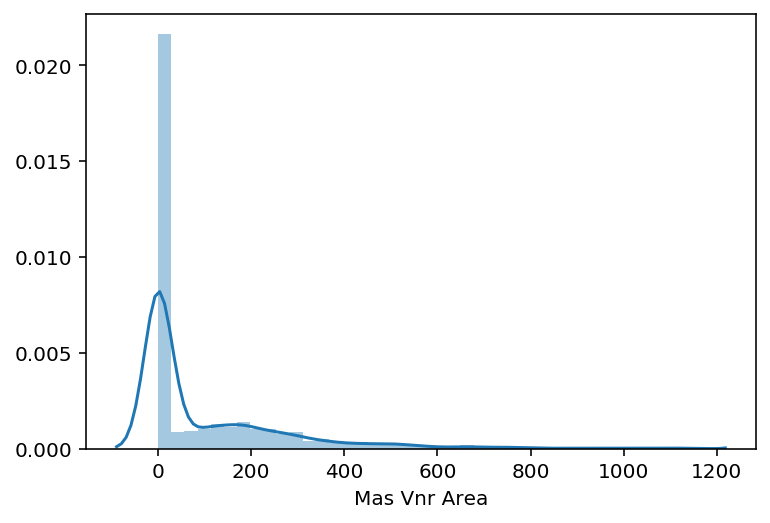

In [453]:
sns.distplot(df['Mas Vnr Area']);

In [454]:
# fill NAN value of Mas Vnr Area by using the mean ratio of Lot Area and Mas Vnr Area across the data set
ratio = (df['Mas Vnr Area'] / df['Lot Area']).mean()
df['Mas Vnr Area'].fillna((df['Lot Area'] * ratio), inplace = True) 
df_test['Mas Vnr Area'].fillna((df_test['Lot Area'] * ratio), inplace = True) 
test['Mas Vnr Area'].fillna((test['Lot Area'] * ratio), inplace = True) 

df['Mas Vnr Area'].isnull().sum()

0

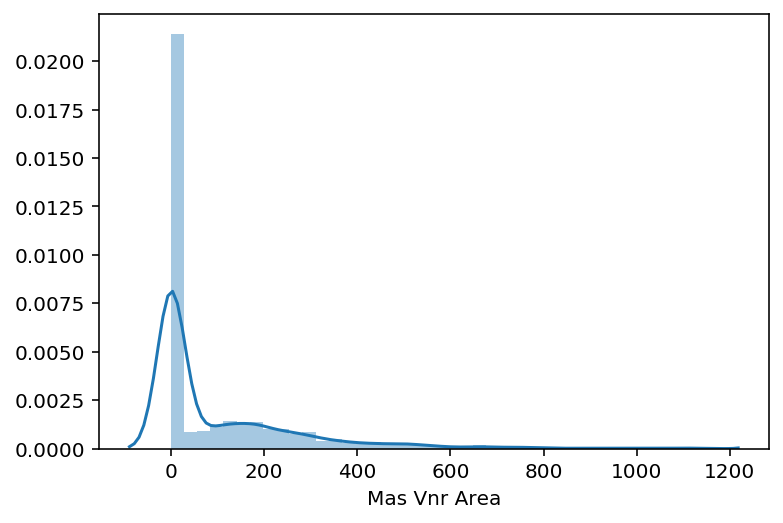

In [455]:
sns.distplot(df['Mas Vnr Area']);

There is no change in the distribution of Mas Vnr Area after filling the null values.

In [456]:
df[df['BsmtFin SF 1'].isnull() == True]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice
455  1342  903230120           20        RM          99.0      5940   Pave   NaN       IR1          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr        Norm      1Fam      1Story             4             7        1946            1950      Gable   CompShg      MetalSd       CBlock         None           0.0         TA         TA      PConc       NaN       NaN           NaN            NaN           NaN            NaN           NaN          NaN            0.0    GasA         TA           Y      FuseA         896           0                0          896             NaN             NaN          1          0              2              1           TA              4        Typ           0          NaN      Detchd           1946           Unf          1.0        280.0          TA          TA           Y             0              0               0           0             0          0     NaN  MnPrv          NaN         0        4     2008     ConLD      79000

In [457]:
# filling one one row with null value in BsmtFin SF 1 with zero since Total SF area is zero and other basement 
# related features have null value for this house 
df['BsmtFin SF 1'].fillna(0, inplace = True) 
df_test['BsmtFin SF 1'].fillna(0, inplace = True) 
test['BsmtFin SF 1'].fillna(0, inplace = True) 

df['BsmtFin SF 1'].isnull().sum()

0

### Feature Engineering of Numeric Features

In [458]:
nums_df.head()

Id        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice
0  1301  902201140           20         100.0     12000             5             7        1948            2005           0.0         144.0         608.0        172.0          924.0        1122           0                0         1122             1.0             0.0          1          0              2              1              6           0         1948.0          2.0        528.0             0             36               0           0             0          0         0        5     2008     147000
1  2174  908127100           90          81.0     11841             6             5        1990            1990         104.0         816.0           0.0          0.0          816.0         816           0                0          816             1.0             0.0          1          0              3              1              5           0            NaN          0.0          0.0             0             32               0           0             0          0         0        5     2007     118500
2  2110  906382060           20          73.0      8760             8             5        2006            2006         132.0          36.0           0.0       1453.0         1489.0        1500           0                0         1500             0.0             0.0          2          0              3              1              7           1         2005.0          2.0        674.0           144             38               0           0             0          0         0        6     2007     212999
3   894  908201040           20          50.0      9405             5             9        1947            2008           0.0           0.0           0.0        698.0          698.0         698           0                0          698             0.0             1.0          1          0              2              1              4           0            NaN          0.0          0.0             0            200               0           0             0          0         0        6     2009     118000
4  2344  527302080           50           NaN     13837             7             5        1988            1988         178.0        1002.0         202.0          0.0         1204.0        1377         806                0         2183             0.0             0.0          2          1              4              1              9           0         1988.0          3.0        786.0             0              0               0           0             0          0         0        2     2006     229000

In [459]:
df[df['Garage Yr Blt']==2207]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice
218  2261  916384070           20        RL          68.0      8298   Pave   NaN       IR1          HLS    AllPub     Inside        Gtl       Timber        Norm        Norm      1Fam      1Story             8             5        2006            2007        Hip   CompShg      VinylSd      VinylSd          NaN    100.192092         Gd         TA      PConc        Gd        TA            Av            GLQ         583.0            Unf           0.0        963.0         1546.0    GasA         Ex           Y      SBrkr        1564           0                0         1564             0.0             0.0          2          0              2              1           Ex              6        Typ           1           Gd      Attchd           2207           RFn          2.0        502.0          TA          TA           Y           132              0               0           0             0          0     NaN   NaN          NaN         0        9     2007       New     267300

In [460]:
# One of rows has Garage Yr Blt as 2207 so changed that to 2007 which is same year as Year Remod/add for that house.
df['Garage Yr Blt'][df['Garage Yr Blt']==2207] = 2007

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Creating New Continous Features 

In [461]:
# adding two new features to measure vintage and new_age of the houses and will drop the Year Built and Year Remod/Add features
#adding one new feature 'garage_age' of the houses and will drop the Garage Yr Blt

print(df.shape,df_test.shape,test.shape)

df['vintage'] = datetime.datetime.today().year - df['Year Built']
df['new_age'] = datetime.datetime.today().year - df['Year Remod/Add']
df['garage_age'] = datetime.datetime.today().year - df['Garage Yr Blt']

df_test['vintage'] = datetime.datetime.today().year - df_test['Year Built']
df_test['new_age'] = datetime.datetime.today().year - df_test['Year Remod/Add']
df_test['garage_age'] = datetime.datetime.today().year - df_test['Garage Yr Blt']

test['vintage'] = datetime.datetime.today().year - test['Year Built']
test['new_age'] = datetime.datetime.today().year - test['Year Remod/Add']
test['garage_age'] = datetime.datetime.today().year - test['Garage Yr Blt']

print(df.shape,df_test.shape,test.shape)

(1538, 81) (513, 81) (879, 80)
(1538, 84) (513, 84) (879, 83)


### Dropping Continous Columns summary
- #Drop PoolQC, Misc Feature, Alley and Fence and Fireplace QU features which have greater that 40 perrows with missing value 
- Drop Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val''Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch' features since since they 80 percent or higher zero value as missing value.
- Dropping numerical columns that have corr with SalePrice less than +-.29 => 'Mo Sold','Yr Sold','Id','MS SubClass','Overall Cond','Kitchen AbvGr','PID','Lot Frontage','Open Porch SF','Wood Deck SF','Bsmt Full Bath','Half Bath','Bsmt Unf SF','2nd Flr SF','Bedroom AbvGr'

### Phase 1 - Dropping of Numerical Features

In [462]:
print(df.shape,df_test.shape,test.shape)

# Dropping numerical columns that have corr with SalePrice less than +-.40
df.drop(['Mo Sold','Yr Sold','Id','MS SubClass','Overall Cond','Kitchen AbvGr','PID', \
         'Lot Frontage', 'Open Porch SF','Wood Deck SF','Bsmt Full Bath','Half Bath', \
         'Bsmt Unf SF','2nd Flr SF','Bedroom AbvGr'],axis=1,inplace=True)
df_test.drop(['Mo Sold','Yr Sold','Id','MS SubClass','Overall Cond','Kitchen AbvGr','PID', \
         'Lot Frontage', 'Open Porch SF','Wood Deck SF','Bsmt Full Bath','Half Bath', \
         'Bsmt Unf SF','2nd Flr SF','Bedroom AbvGr'],axis=1,inplace=True)
test.drop(['Mo Sold','Yr Sold','Id','MS SubClass','Overall Cond','Kitchen AbvGr','PID', \
         'Lot Frontage', 'Open Porch SF','Wood Deck SF','Bsmt Full Bath','Half Bath', \
         'Bsmt Unf SF','2nd Flr SF','Bedroom AbvGr'],axis=1,inplace=True)

# Drop Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val''Bsmt Half Bath', 
#'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch' features since those are 80 
# percent or higher proportion with zero value as 'missing value'.
df.drop(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch'],axis=1,inplace =True)
df_test.drop(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch'],axis=1,inplace=True)
test.drop(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch'],axis=1,inplace=True)

# drop the Year Built, Year Remod/Add features & Garage Yr Blt as new features vintage and new_age has been created.

df.drop(['Year Built','Year Remod/Add','Garage Yr Blt'],axis=1,inplace =True)
df_test.drop(['Year Built','Year Remod/Add','Garage Yr Blt'],axis=1,inplace =True)
test.drop(['Year Built','Year Remod/Add','Garage Yr Blt'],axis=1,inplace =True)


print(df.shape,df_test.shape,test.shape) # same column number since test has "Id" column and df and df_test do not.

(1538, 84) (513, 84) (879, 83)
(1538, 58) (513, 58) (879, 57)


In [463]:
# splitting columns into first phase of selected numeric features
sel_nums_df = df.select_dtypes(exclude=['object'])
print(sel_nums_df.shape)

(1538, 16)


In [464]:
# Running again the rstr function defined above to check the if all selected numeric features have clean values.
details = rstr(sel_nums_df, 'SalePrice')
display(details.sort_values(by='corr SalePrice', ascending=False))

Data shape: (1538, 16)
___________________________
Data types:
 int64      11
float64     5
Name: types, dtype: int64
___________________________


types  counts  distincts  nulls  missing_ration                                            uniques  skewness   kurtosis  corr SalePrice
SalePrice        int64    1538        689      0             0.0  [[147000.0, 118500.0, 212999.0, 118000.0, 2290...  1.605276   3.683531        1.000000
Overall Qual     int64    1538         10      0             0.0  [[5.0, 6.0, 8.0, 7.0, 9.0, 4.0, 3.0, 10.0, 2.0...  0.194963   0.094921        0.813402
Gr Liv Area      int64    1538        886      0             0.0  [[1122.0, 816.0, 1500.0, 698.0, 2183.0, 1041.0...  1.209952   3.946967        0.698893
Garage Cars    float64    1538          6      0             0.0                   [[2.0, 0.0, 3.0, 1.0, 4.0, 5.0]] -0.180513   0.308654        0.663046
Garage Area    float64    1538        458      0             0.0  [[528.0, 0.0, 674.0, 786.0, 270.0, 427.0, 531....  0.264628   0.882290        0.662211
Total Bsmt SF  float64    1538        769      0             0.0  [[924.0, 816.0, 1489.0, 698.0, 1204.0, 1041.0,...  1.281124  10.936927        0.637076
1st Flr SF       int64    1538        799      0             0.0  [[1122.0, 816.0, 1500.0, 698.0, 1377.0, 1041.0...  1.368628   5.912724        0.626153
Full Bath        int64    1538          5      0             0.0                        [[1.0, 2.0, 3.0, 4.0, 0.0]]  0.144084  -0.558332        0.546589
Mas Vnr Area   float64    1538        337      0             0.0  [[0.0, 104.0, 132.0, 178.0, 40.0, 108.0, 30.0,...  2.349245   6.808904        0.535613
TotRms AbvGrd    int64    1538         12      0             0.0  [[6.0, 5.0, 7.0, 4.0, 9.0, 11.0, 8.0, 10.0, 3....  0.798024   1.098041        0.511269
Fireplaces       int64    1538          5      0             0.0                        [[0.0, 1.0, 2.0, 4.0, 3.0]]  0.697541   0.180647        0.476729
BsmtFin SF 1   float64    1538        705      0             0.0  [[144.0, 816.0, 36.0, 0.0, 1002.0, 991.0, 990....  1.559790   9.587454        0.428195
Lot Area         int64    1538       1150      0             0.0  [[12000.0, 11841.0, 8760.0, 9405.0, 13837.0, 9...  6.292319  73.339673        0.318579
new_age          int64    1538         61      0             0.0  [[15.0, 30.0, 14.0, 12.0, 32.0, 61.0, 22.0, 19...  0.455091  -1.354678       -0.550696
garage_age       int64    1538        102      0             0.0  [[72.0, 30.0, 15.0, 73.0, 32.0, 61.0, 22.0, 19...  0.693680  -0.301168       -0.564570
vintage          int64    1538        110      0             0.0  [[72.0, 30.0, 14.0, 73.0, 32.0, 61.0, 22.0, 19...  0.619247  -0.492821       -0.584560

## Target Variable - Sale Price

**Analyzing outlier of SalePrice target feature**

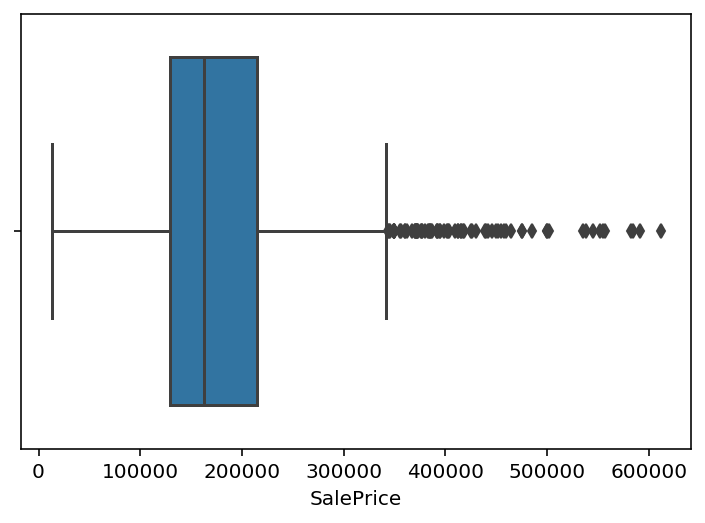

In [465]:
sns.boxplot(df['SalePrice']);

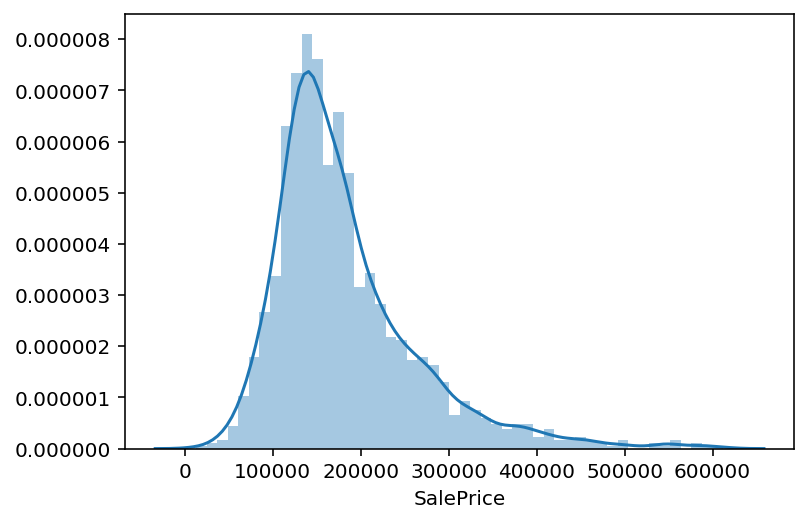

In [466]:
# looking for outliers
sns.distplot(df['SalePrice'],bins=50);

**SalePrice has a long tail on the right**

In [467]:
print(df.shape,y_train.shape)

# Dropping rows with SalesPrice greater than 500000 as tail of the outliers
df.drop(df[df['SalePrice'] > 500000].index,inplace=True)
y_train.drop(y_train[y_train['SalePrice'] > 500000].index,inplace=True)

print(df.shape,y_train.shape)

(1538, 58) (1538, 1)
(1526, 58) (1526, 1)


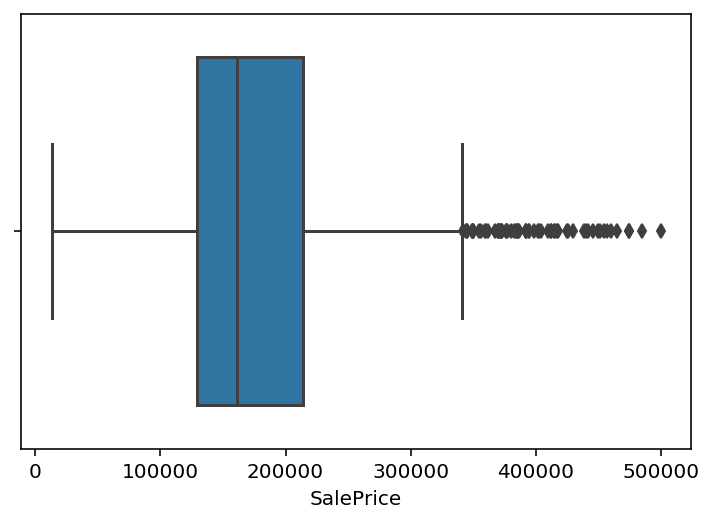

In [468]:
#Improved range for SalePrice after removal of outliers > $500,000
sns.boxplot(df['SalePrice']);

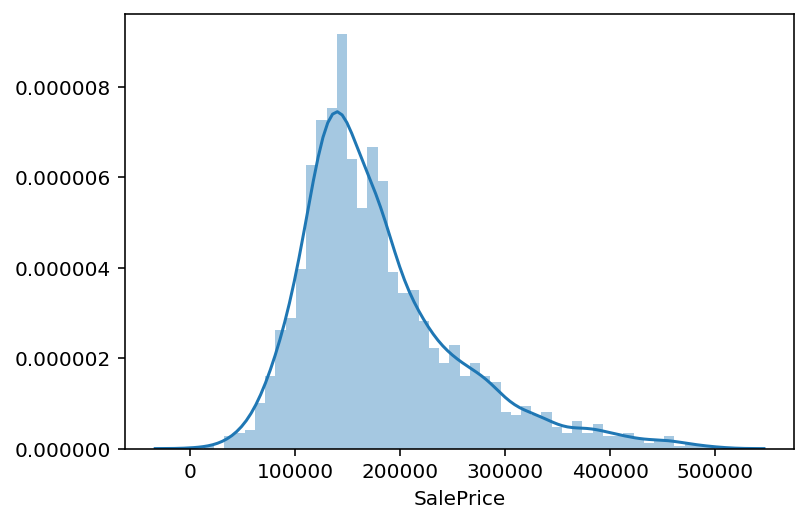

In [469]:
# Shorter tail on the right for distribution curve of SaleProce after removal of outliers > $500,000
sns.distplot(df['SalePrice'],bins=50);

**Saleprice now has a shorter tale**

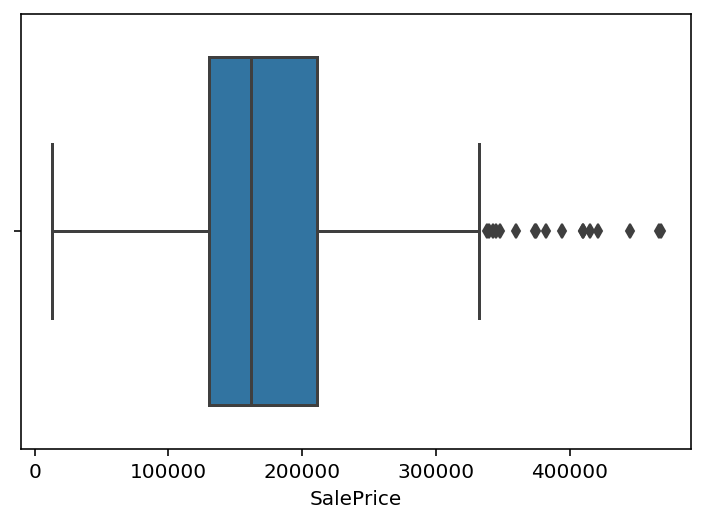

In [470]:
# reviewing the magnitude of rows with SalePrice greater than $5000,000 in df_test dataset.
sns.boxplot(df_test['SalePrice']);

In [471]:
df.shape

(1526, 58)

## Continous Features

In [472]:
# stores cross columns correlation matrix of continous features in final_corr dataframe
final_corr = sel_nums_df.corr()

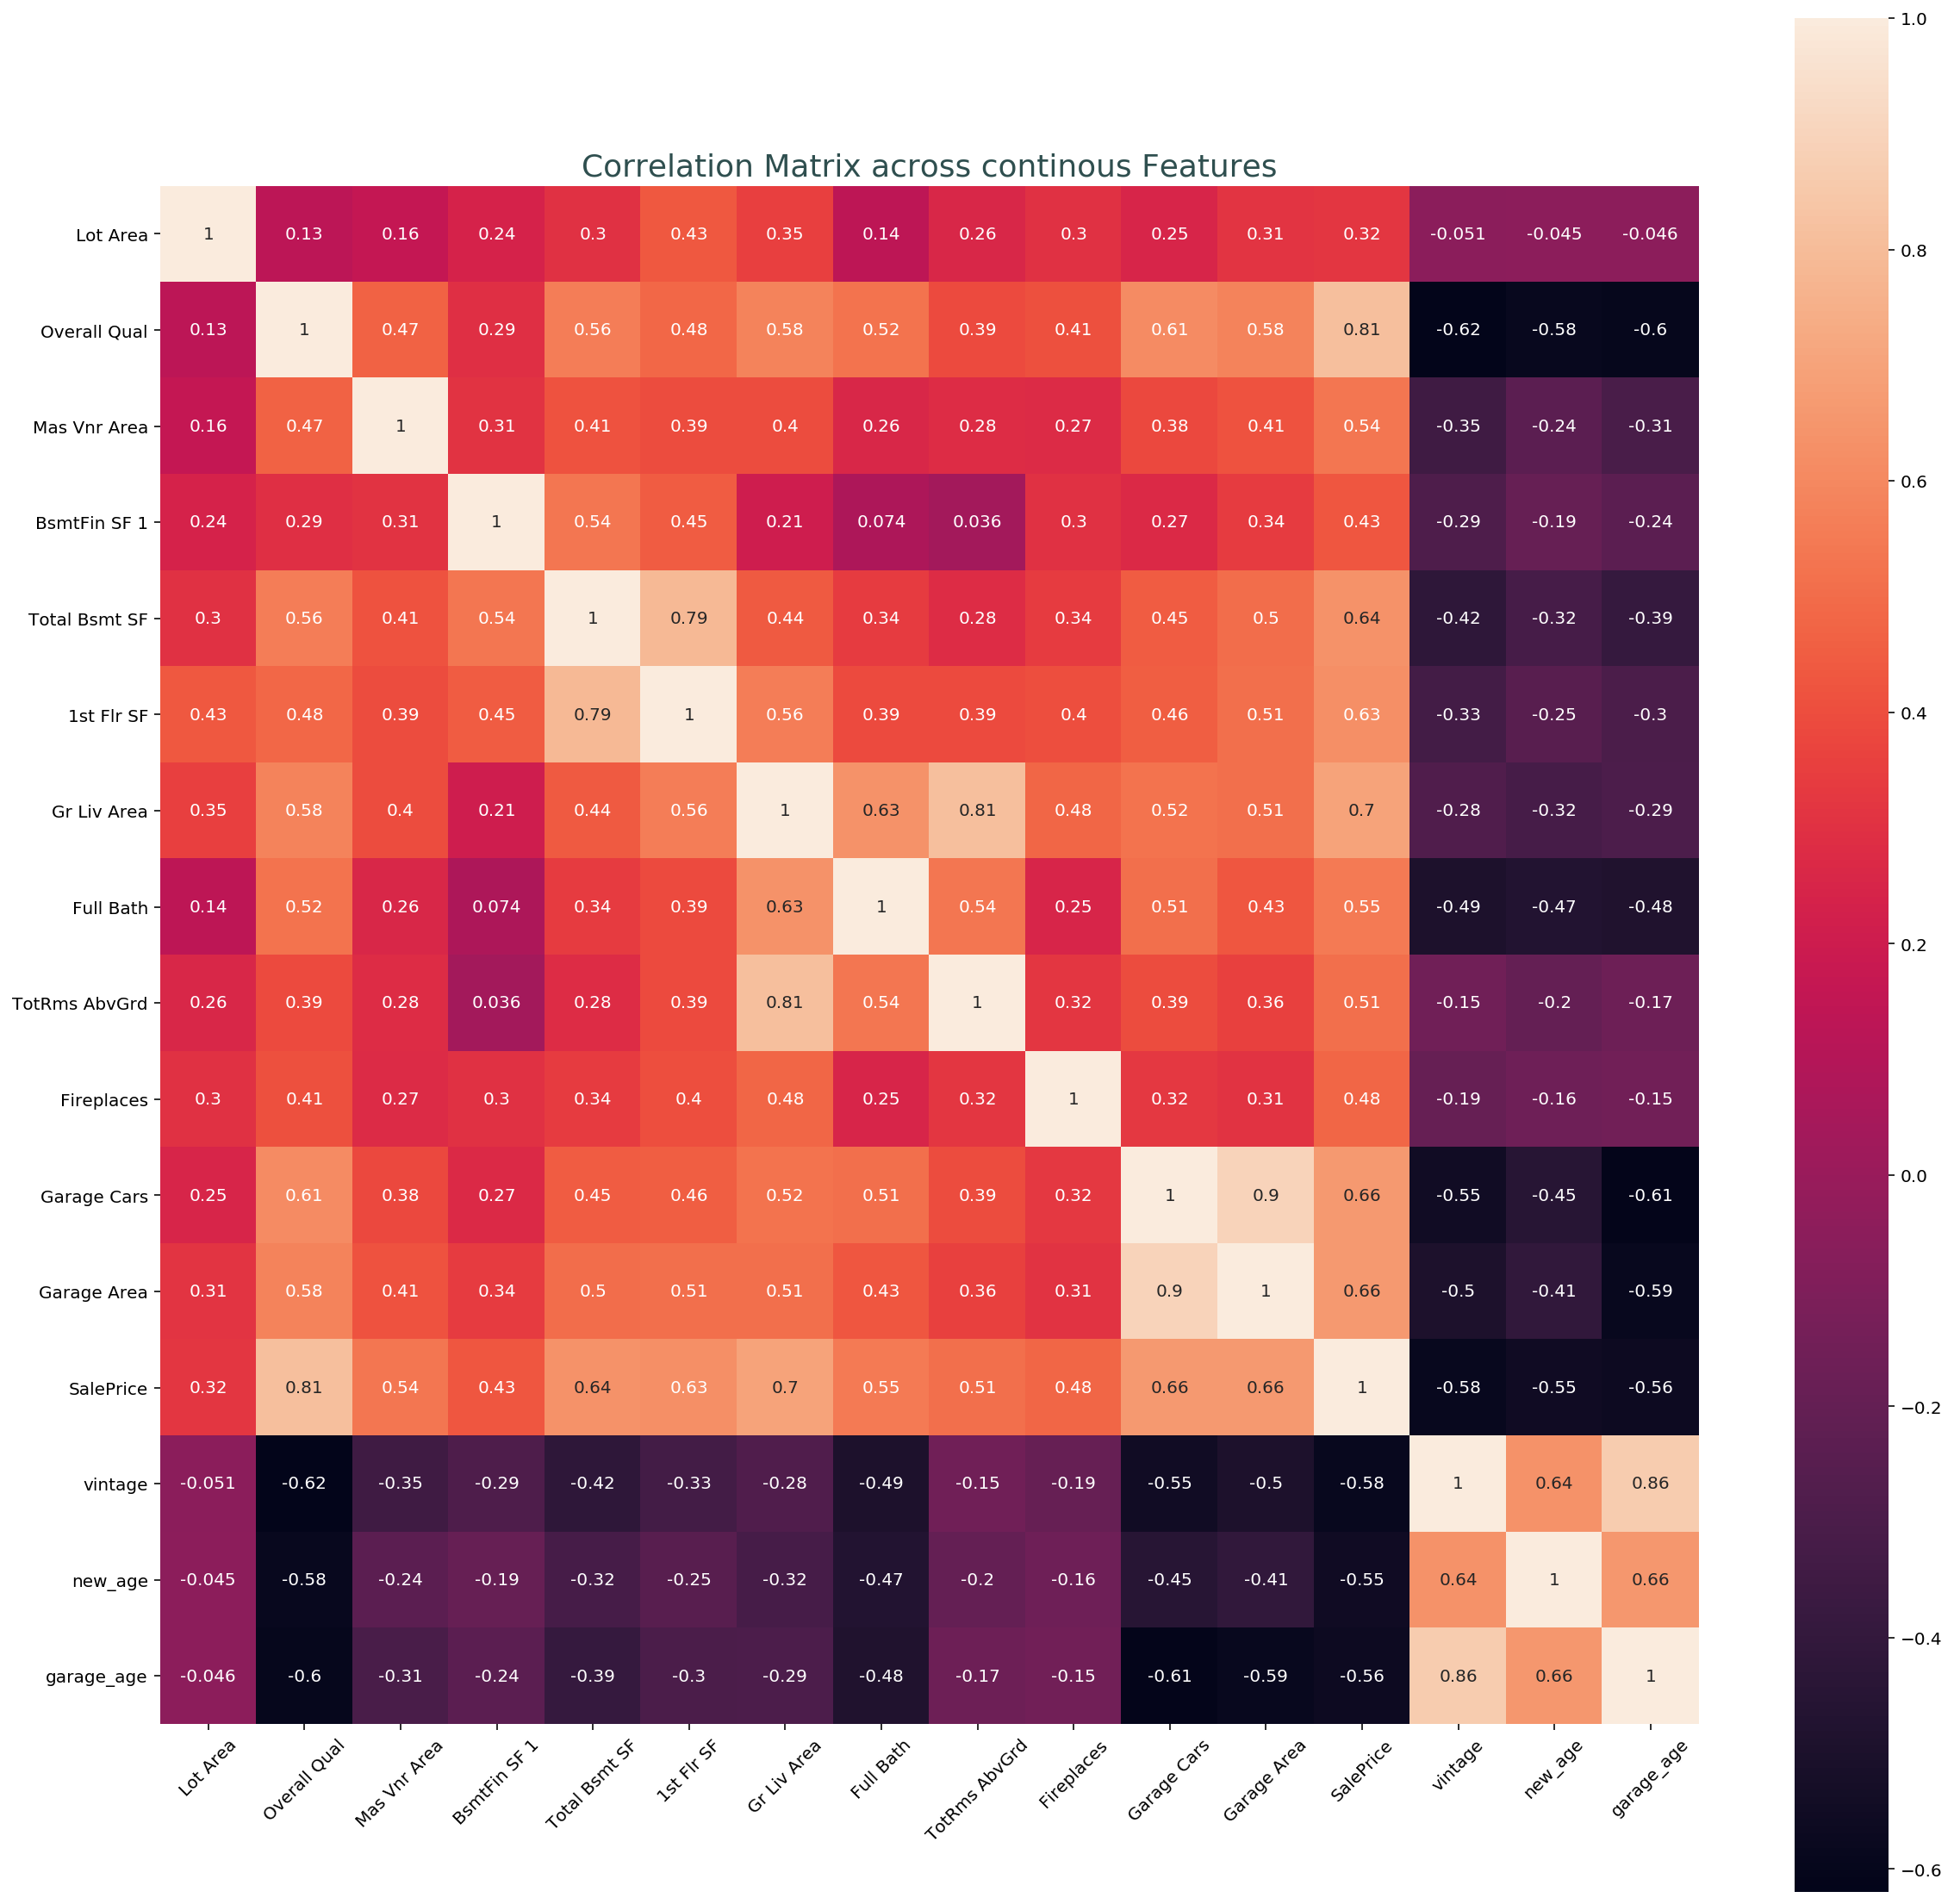

In [473]:
# create Seaborn heat map for cross columns correlation matrix stored within final_corr object.
fig, ax = plt.subplots(figsize=(20,20));
ax = sns.heatmap(final_corr, annot=True,square=True);
ax.set_title("Correlation Matrix across continous Features",color=my_title_col, fontsize = my_title_font);
plt.xticks(rotation=45);

**Observation: Many numerical features have high and medium correlation with SalePrice.**

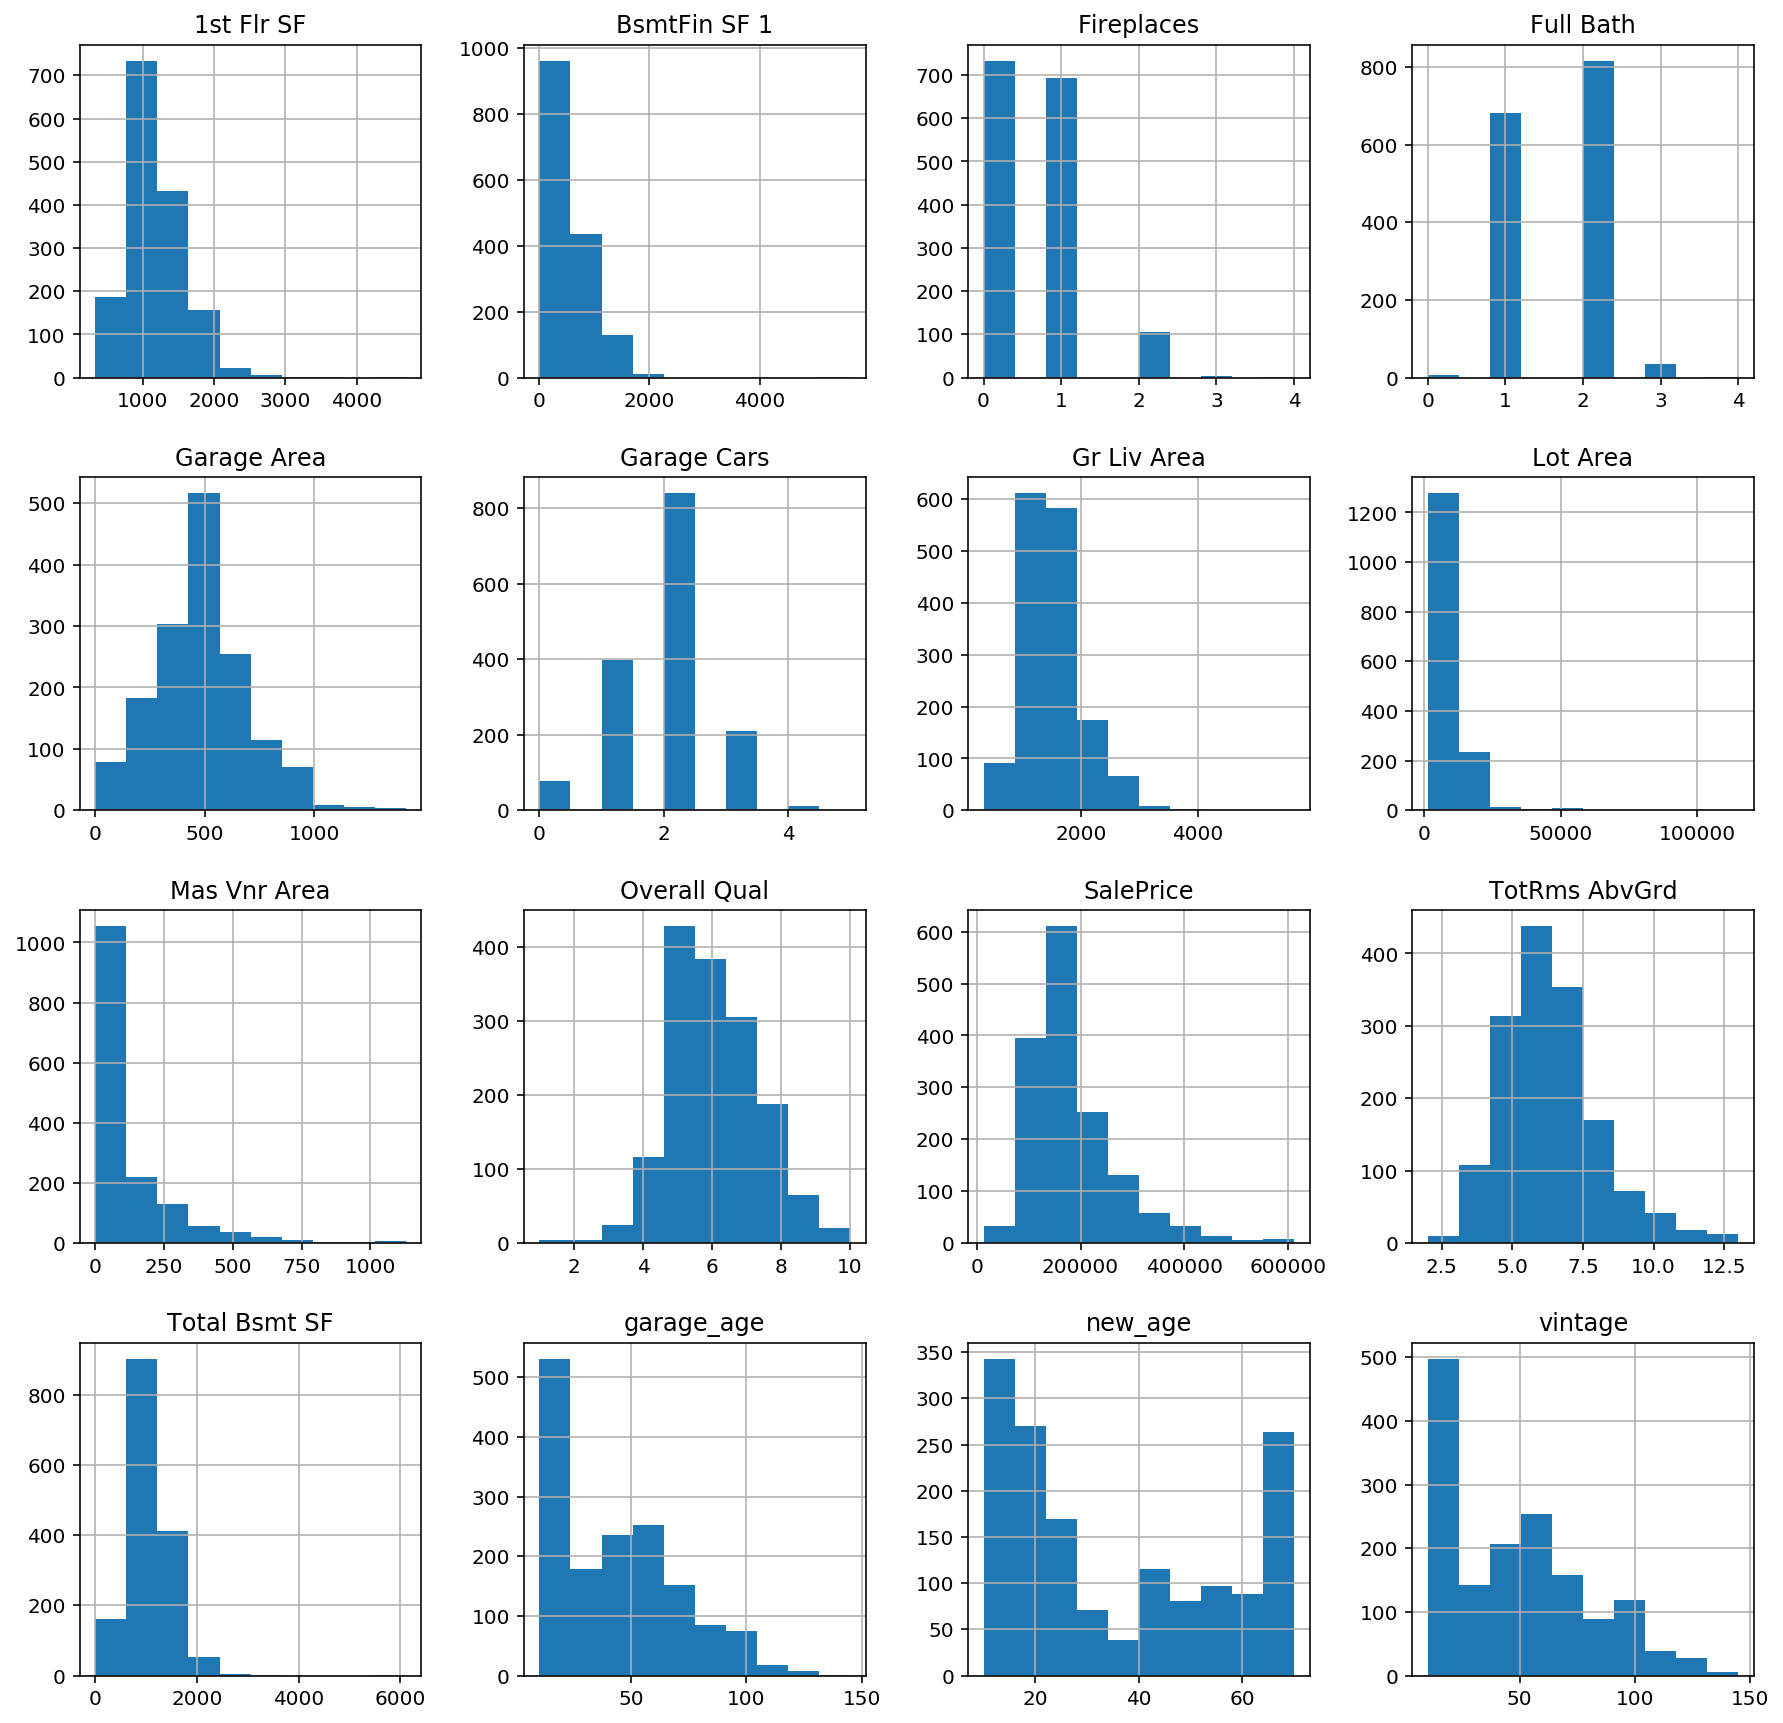

In [474]:
sel_nums_df.hist(figsize=(15,15));

In [475]:
df['Overall Qual'].value_counts()

5     428
6     384
7     305
8     187
4     116
9      59
3      24
10     15
2       4
1       4
Name: Overall Qual, dtype: int64

#### Observations from histograms:
- There seems to be a negative premium on Sale Price due to Vintage factor, and new_age (Year of last upgrade) does not seem to have a clear effect on the sale price of the houses.
- Garage Age has the same effect on the sale price as vintage.
- Overall Qual ranges on the scale from 1 to 10, and number 5 score has maximum number of expensive house.

## Categorical Features

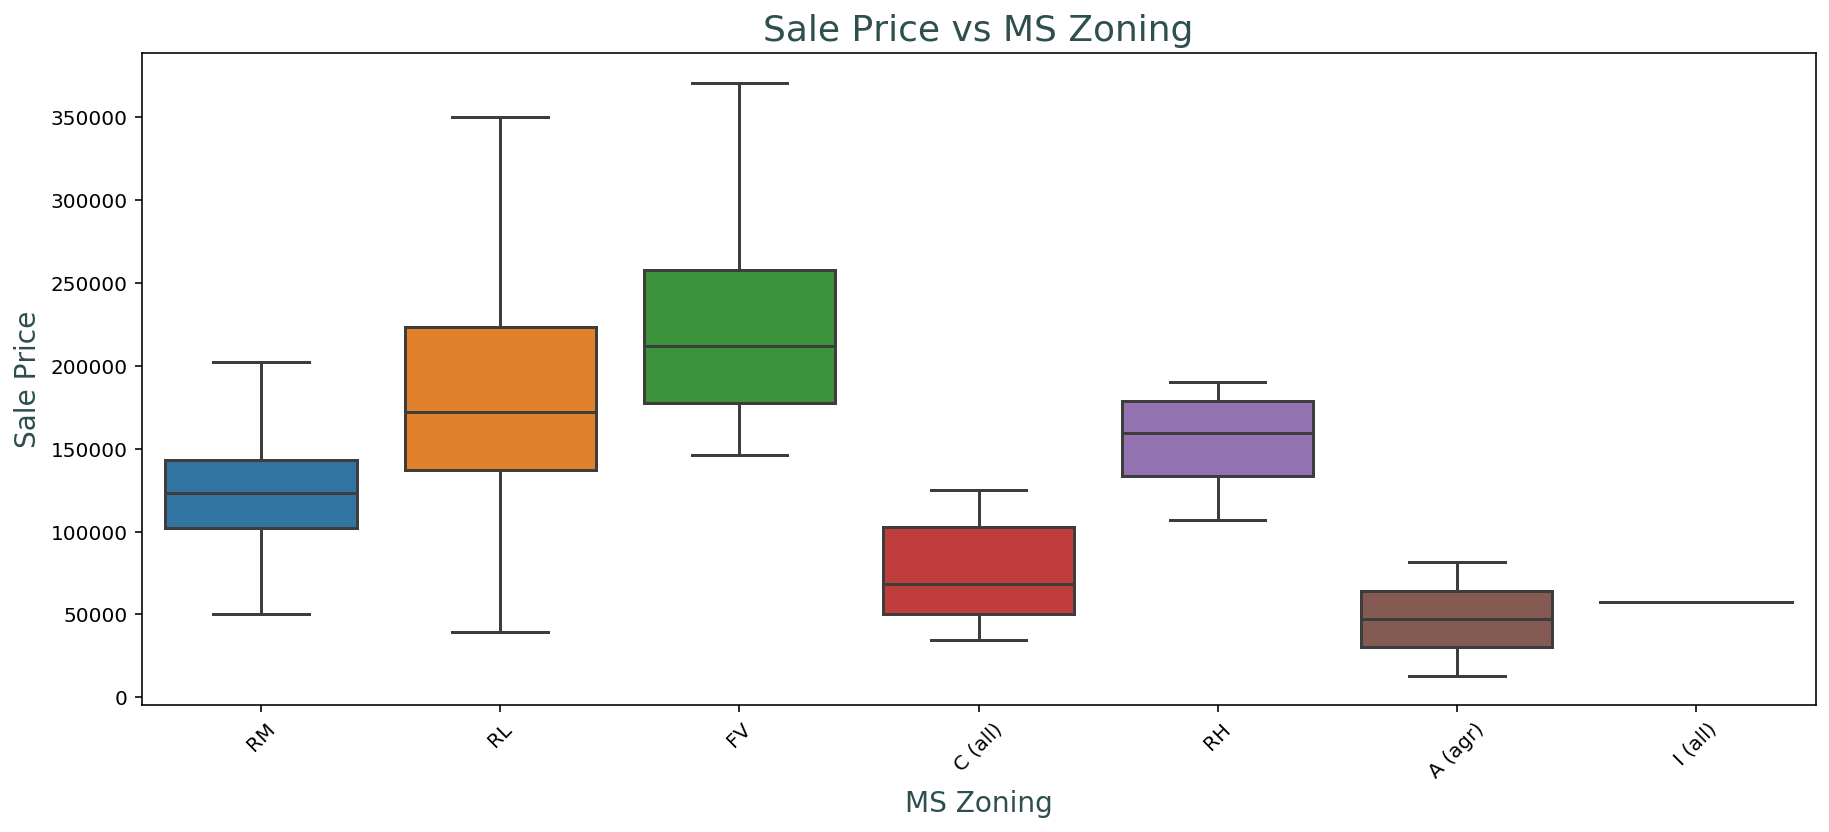

In [476]:
xf=df['MS Zoning']
yf=df['SalePrice']
xlabel='MS Zoning'
ylabel='Sale Price'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);
plt.xticks(rotation=45);

In [477]:
df['MS Zoning'].value_counts(normalize=True)

RL         0.780472
RM         0.152687
FV         0.046527
C (all)    0.011140
RH         0.007208
A (agr)    0.001311
I (all)    0.000655
Name: MS Zoning, dtype: float64

**'MS Zoning' has 'RL' class with 77% of observations. So will be dropped**

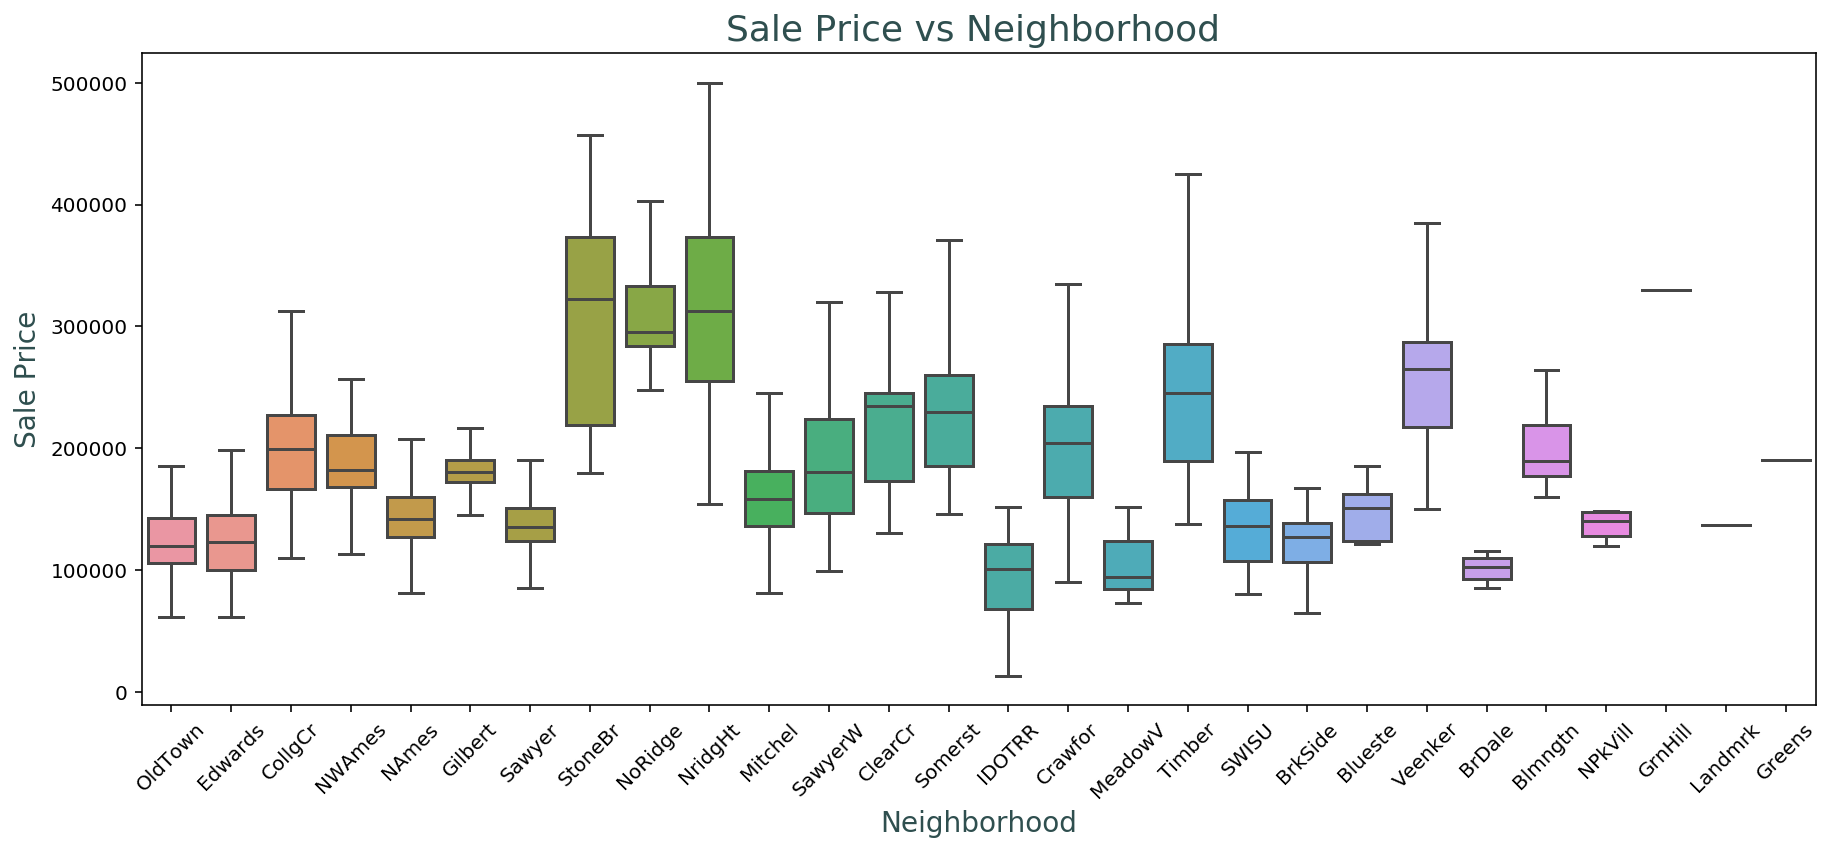

In [478]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=df['Neighborhood'],y=df['SalePrice'],showfliers=False);
ax.set_title("Sale Price vs Neighborhood ",color=my_title_col, fontsize = my_title_font);
ax.set_xlabel('Neighborhood',color=my_label_col, fontsize = my_label_font);
ax.set_ylabel('Sale Price',color=my_label_col, fontsize = my_label_font);
plt.xticks(rotation=45);

**'Neighborhood' feature has quite a variation of Sale price among different classes**

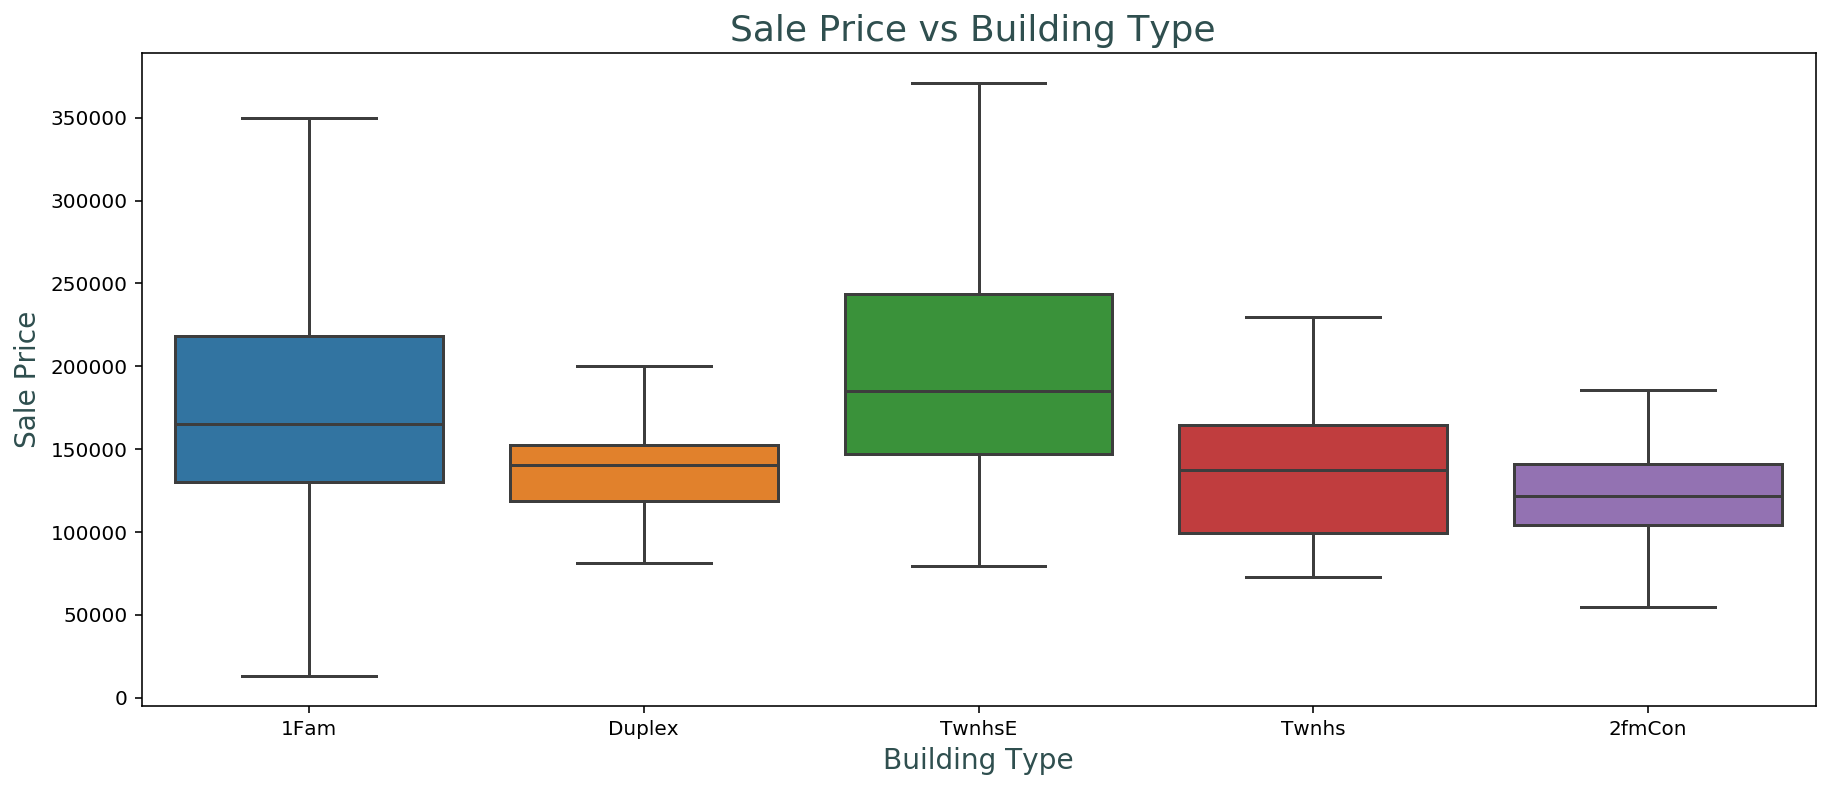

In [479]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=df['Bldg Type'],y=df['SalePrice'],showfliers=False);
ax.set_title("Sale Price vs Building Type ",color=my_title_col, fontsize = my_title_font);
ax.set_xlabel('Building Type',color=my_label_col, fontsize = my_label_font);
ax.set_ylabel('Sale Price',color=my_label_col, fontsize = my_label_font);

In [480]:
df['Bldg Type'].value_counts(normalize=True)

1Fam      0.828965
TwnhsE    0.077982
Duplex    0.038008
Twnhs     0.031455
2fmCon    0.023591
Name: Bldg Type, dtype: float64

**Buiding Type has '1Fam' class with 84% of observations. So will be dropped**

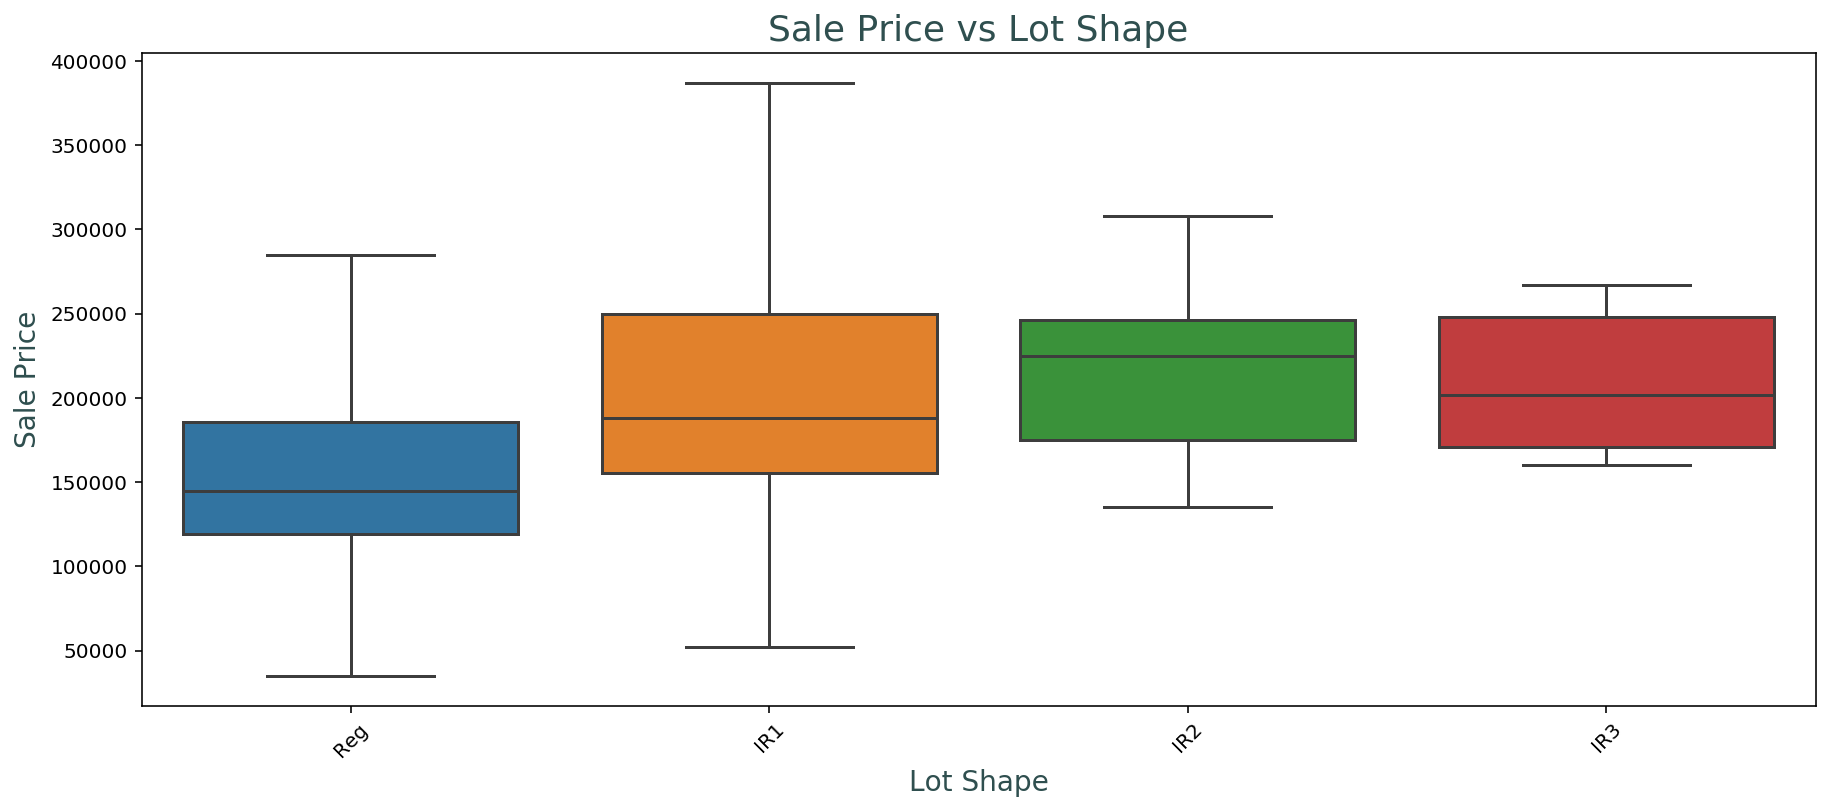

In [481]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=df['Lot Shape'],y=df['SalePrice'],showfliers=False);
ax.set_title("Sale Price vs Lot Shape",color=my_title_col, fontsize = my_title_font);
ax.set_xlabel('Lot Shape',color=my_label_col, fontsize = my_label_font);
ax.set_ylabel('Sale Price',color=my_label_col, fontsize = my_label_font);
plt.xticks(rotation=45);

In [482]:
df['Lot Shape'].value_counts(normalize=True)

Reg    0.631062
IR1    0.342071
IR2    0.022936
IR3    0.003932
Name: Lot Shape, dtype: float64

**Lot Shape has some variation in regards to the Sale Price**

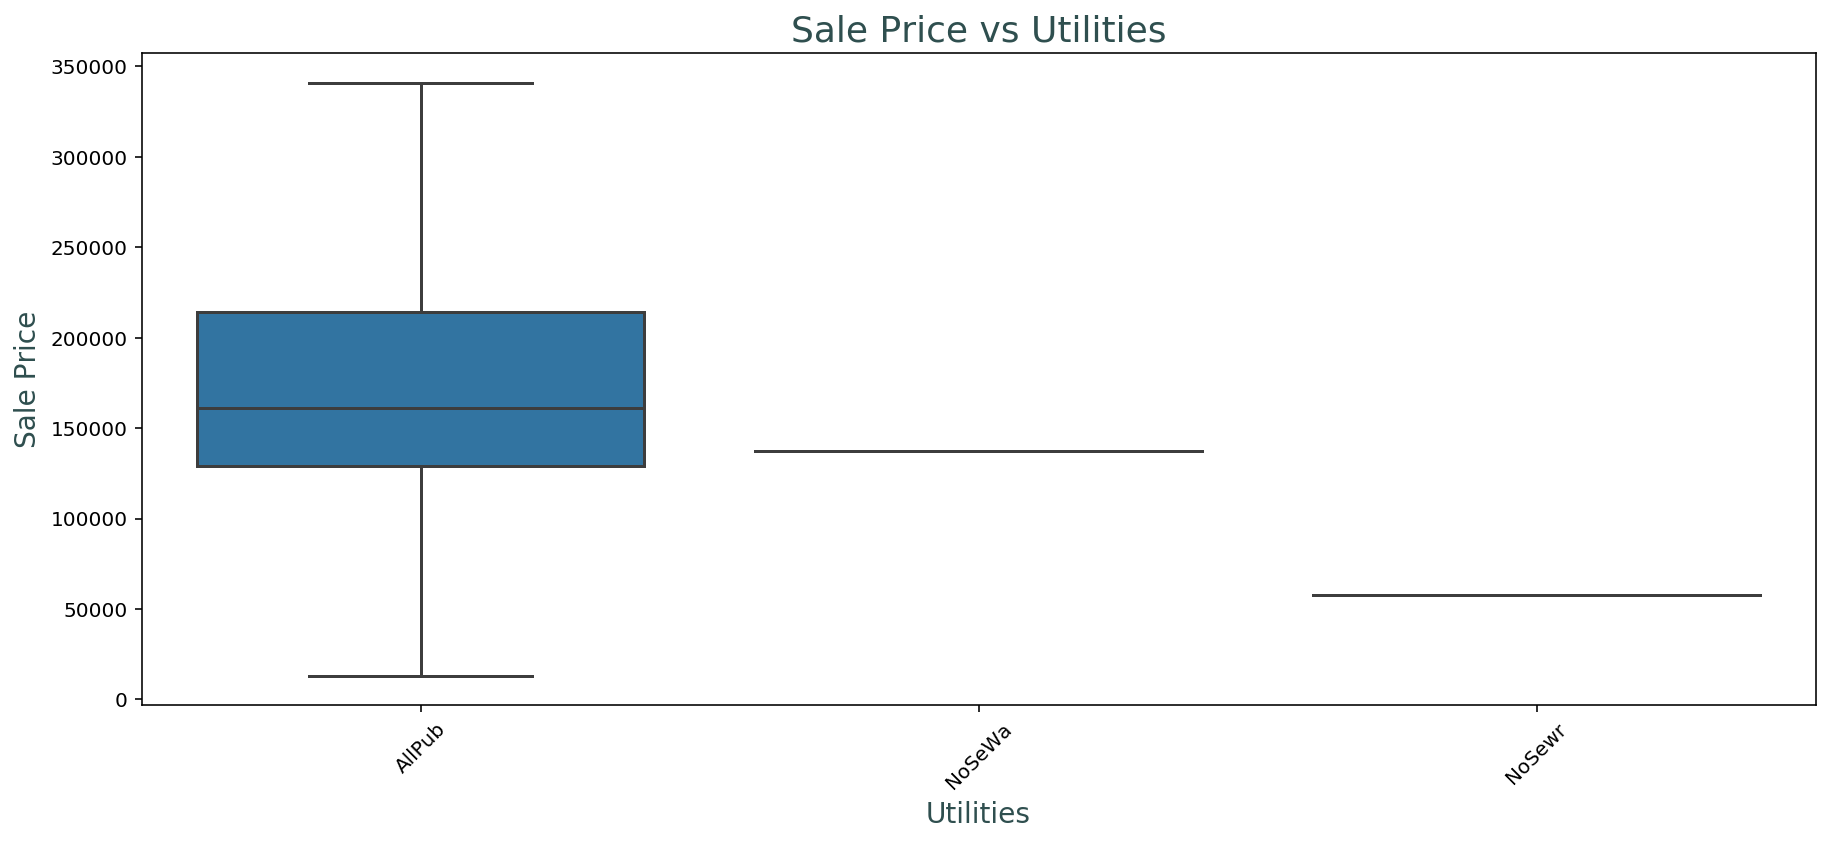

In [483]:
xf=df['Utilities']
yf=df['SalePrice']
xlabel='Utilities'
ylabel='Sale Price'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);
plt.xticks(rotation=45);

**Utilities has 'AllPub' value in most rows so this feature will be dropped**

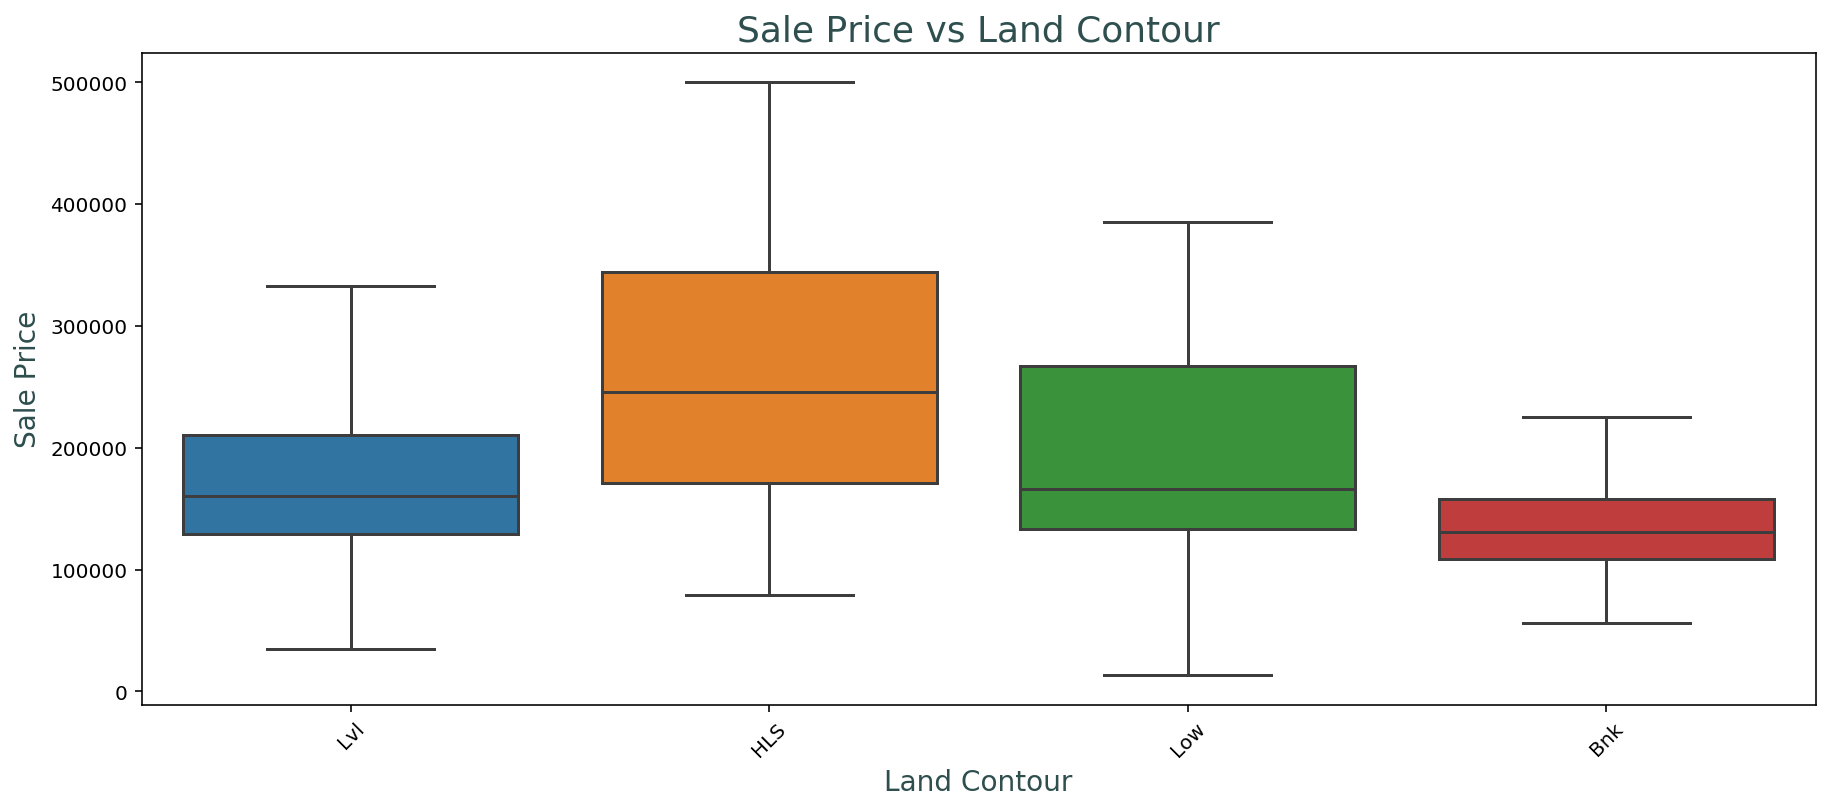

In [484]:
xf=df['Land Contour']
yf=df['SalePrice']
xlabel='Land Contour'
ylabel='Sale Price'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);
plt.xticks(rotation=45);

In [485]:
df['Land Contour'].value_counts(normalize=True)

Lvl    0.901048
HLS    0.043906
Bnk    0.035387
Low    0.019659
Name: Land Contour, dtype: float64

**'Land Contour has 'Lvl' class in 89% of observations so this feature will be dropped**

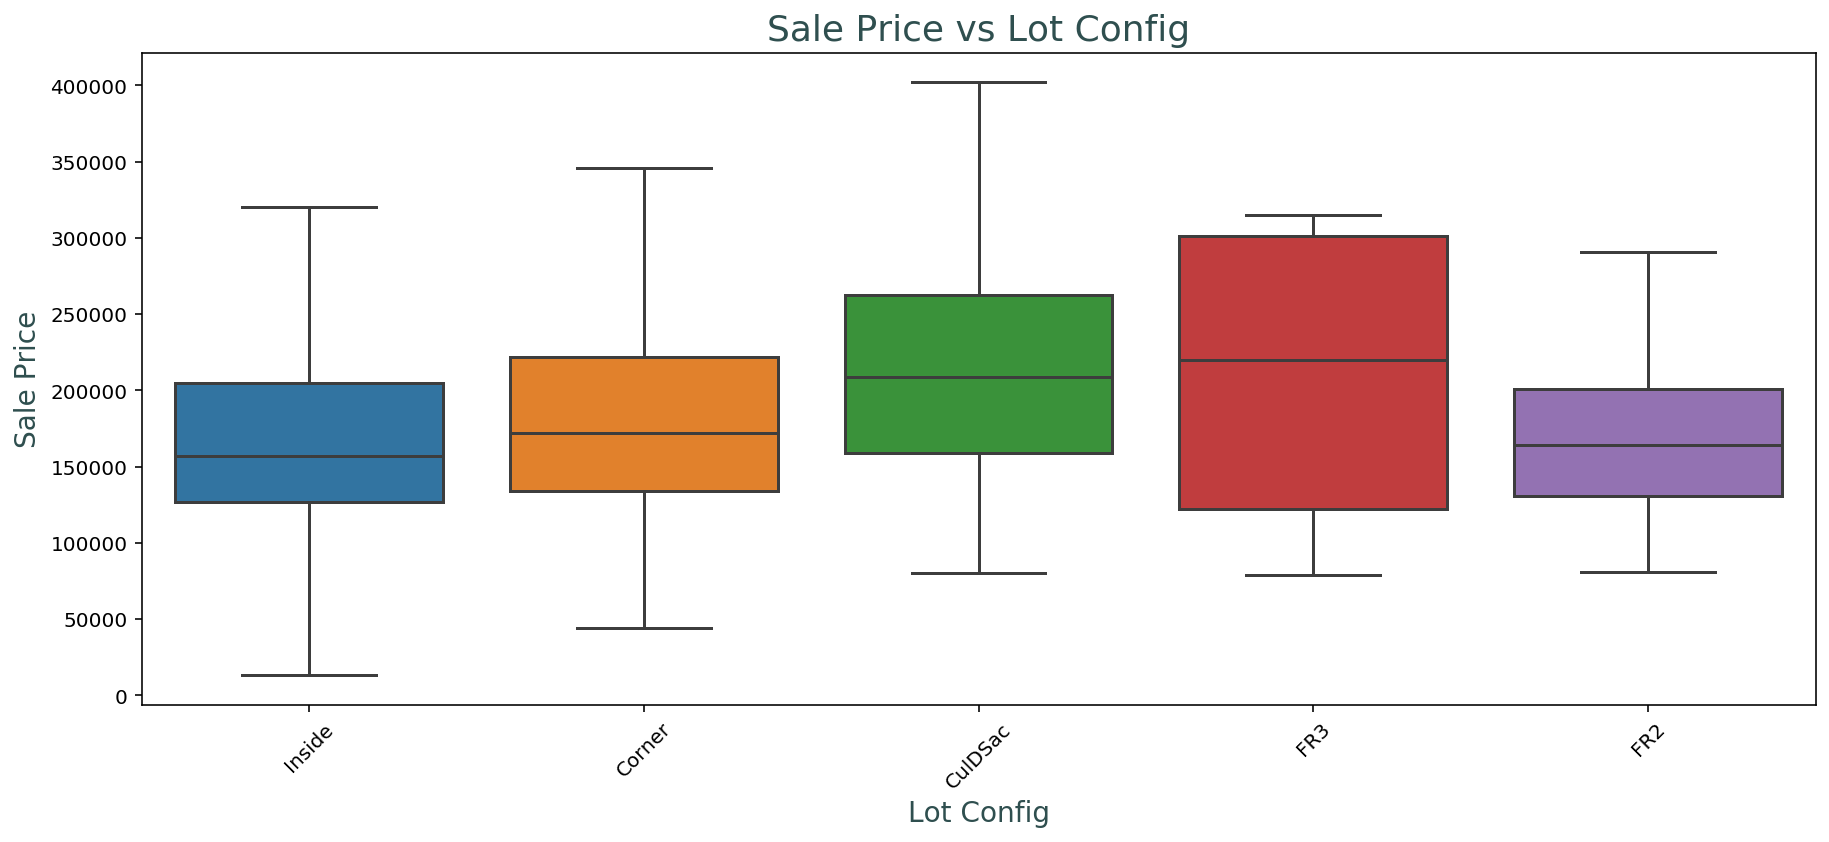

In [486]:
xf=df['Lot Config']
yf=df['SalePrice']
xlabel='Lot Config'
ylabel='Sale Price'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);
plt.xticks(rotation=45);

In [487]:
df['Lot Config'].value_counts(normalize=True)

Inside     0.730013
Corner     0.171691
CulDSac    0.062910
FR2        0.030799
FR3        0.004587
Name: Lot Config, dtype: float64

**'Lot Config' feature does not have significant variation of Sale price among its classes and 'Inside' class dominates with 77% of the observaitons. So 'Lot Config' will be dropped.** 

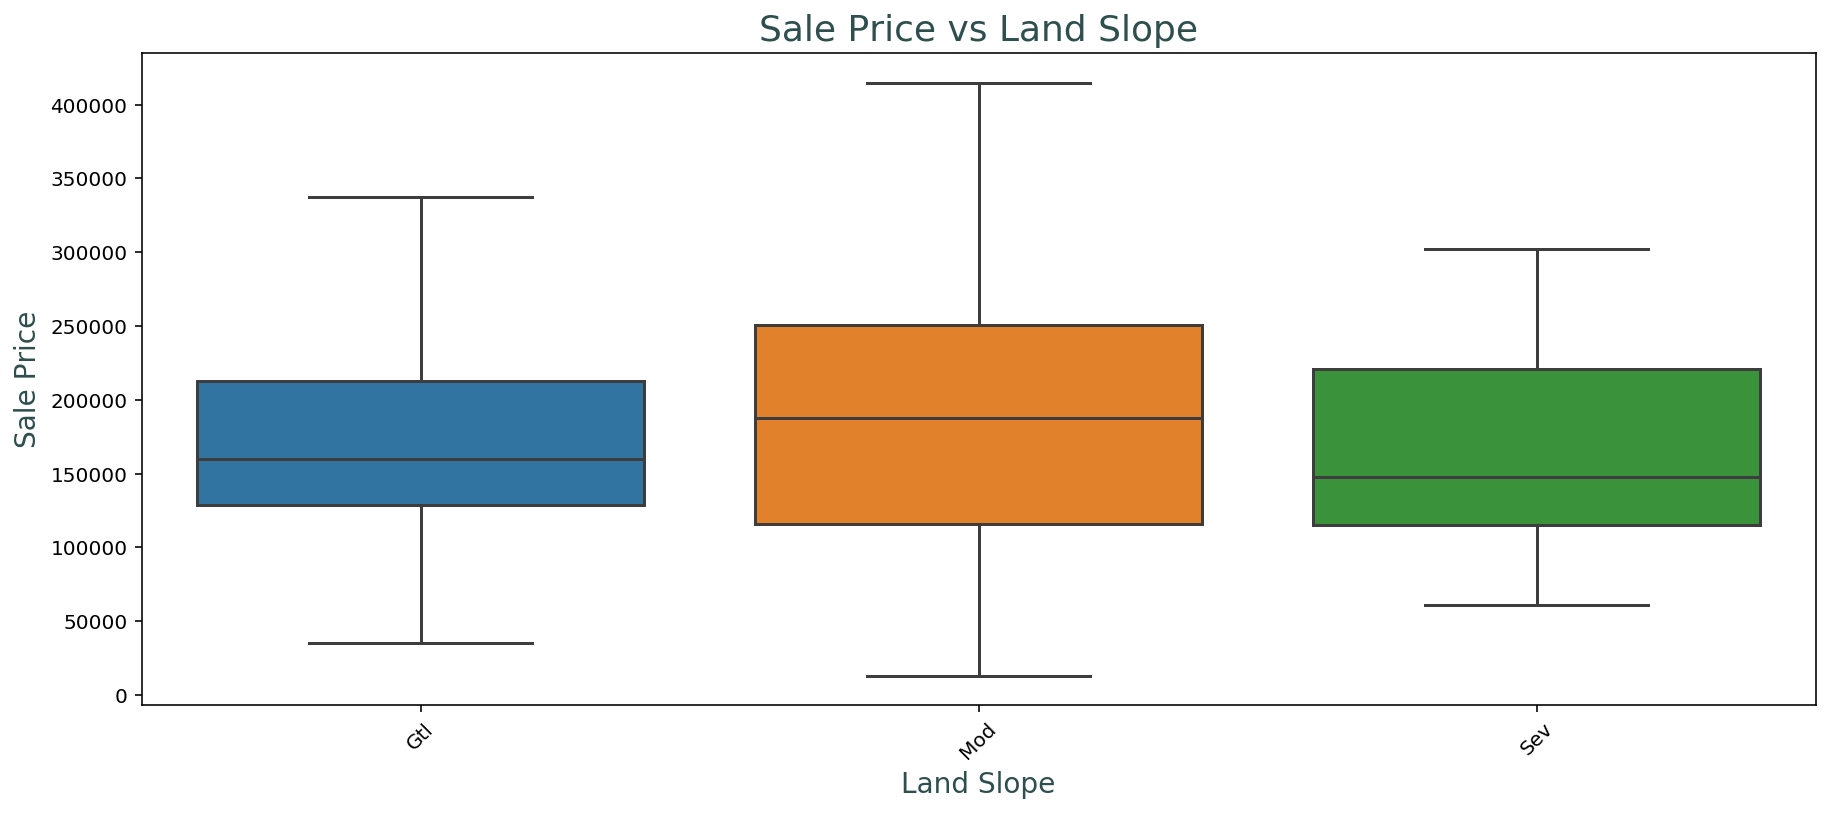

In [488]:
xf=df['Land Slope']
yf=df['SalePrice']
xlabel='Land Slope'
ylabel='Sale Price'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);
plt.xticks(rotation=45);

In [489]:
df['Land Slope'].value_counts(normalize=True)

Gtl    0.950197
Mod    0.045872
Sev    0.003932
Name: Land Slope, dtype: float64

**'Land Slope' has 95% of observation with class 'Gtl' and there is not enough variations of Sale price among the classes of Land Slope. So will be dropped**

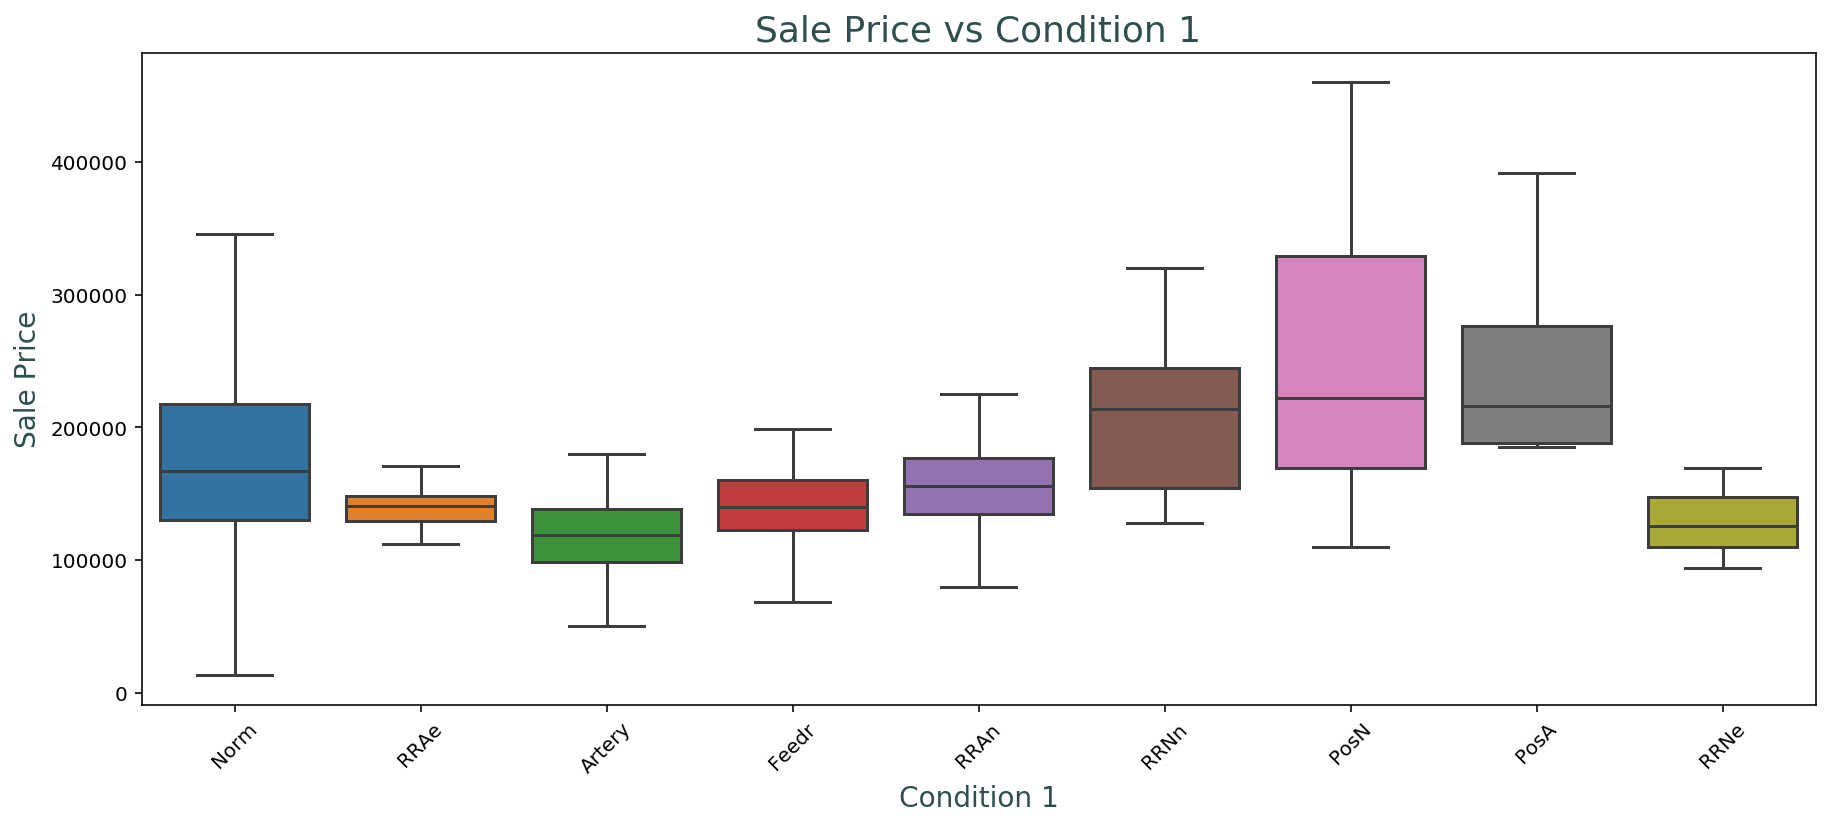

In [490]:
xf=df['Condition 1']
yf=df['SalePrice']
xlabel='Condition 1'
ylabel='Sale Price'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);
plt.xticks(rotation=45);

In [491]:
df['Condition 1'].value_counts(normalize=True)

Norm      0.862385
Feedr     0.049803
Artery    0.035387
RRAn      0.018349
RRAe      0.011796
PosN      0.009174
PosA      0.007864
RRNn      0.003277
RRNe      0.001966
Name: Condition 1, dtype: float64

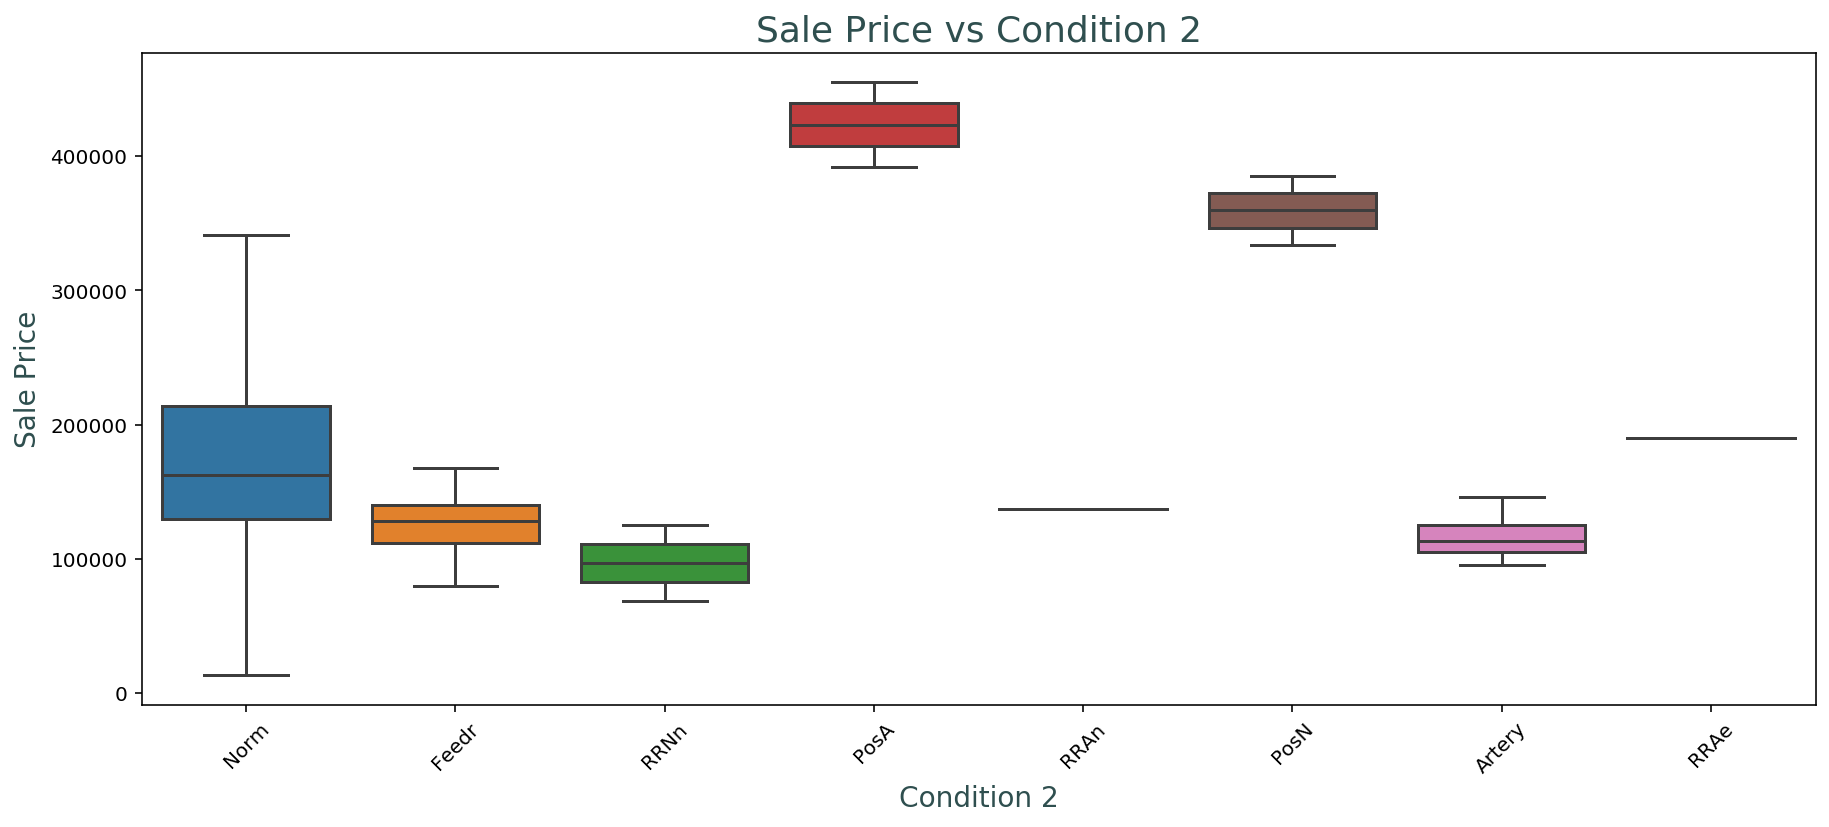

In [492]:
xf=df['Condition 2']
yf=df['SalePrice']
xlabel='Condition 2'
ylabel='Sale Price'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);
plt.xticks(rotation=45);

In [493]:
df['Condition 2'].value_counts(normalize=True)

Norm      0.986239
Feedr     0.005898
Artery    0.002621
PosN      0.001311
PosA      0.001311
RRNn      0.001311
RRAe      0.000655
RRAn      0.000655
Name: Condition 2, dtype: float64

**Condition 1 and Condition 2 features seem to have variation of Sales Price among their classes however 'Norm' classes dominate with 85% of observations. So both these features will be dropped**

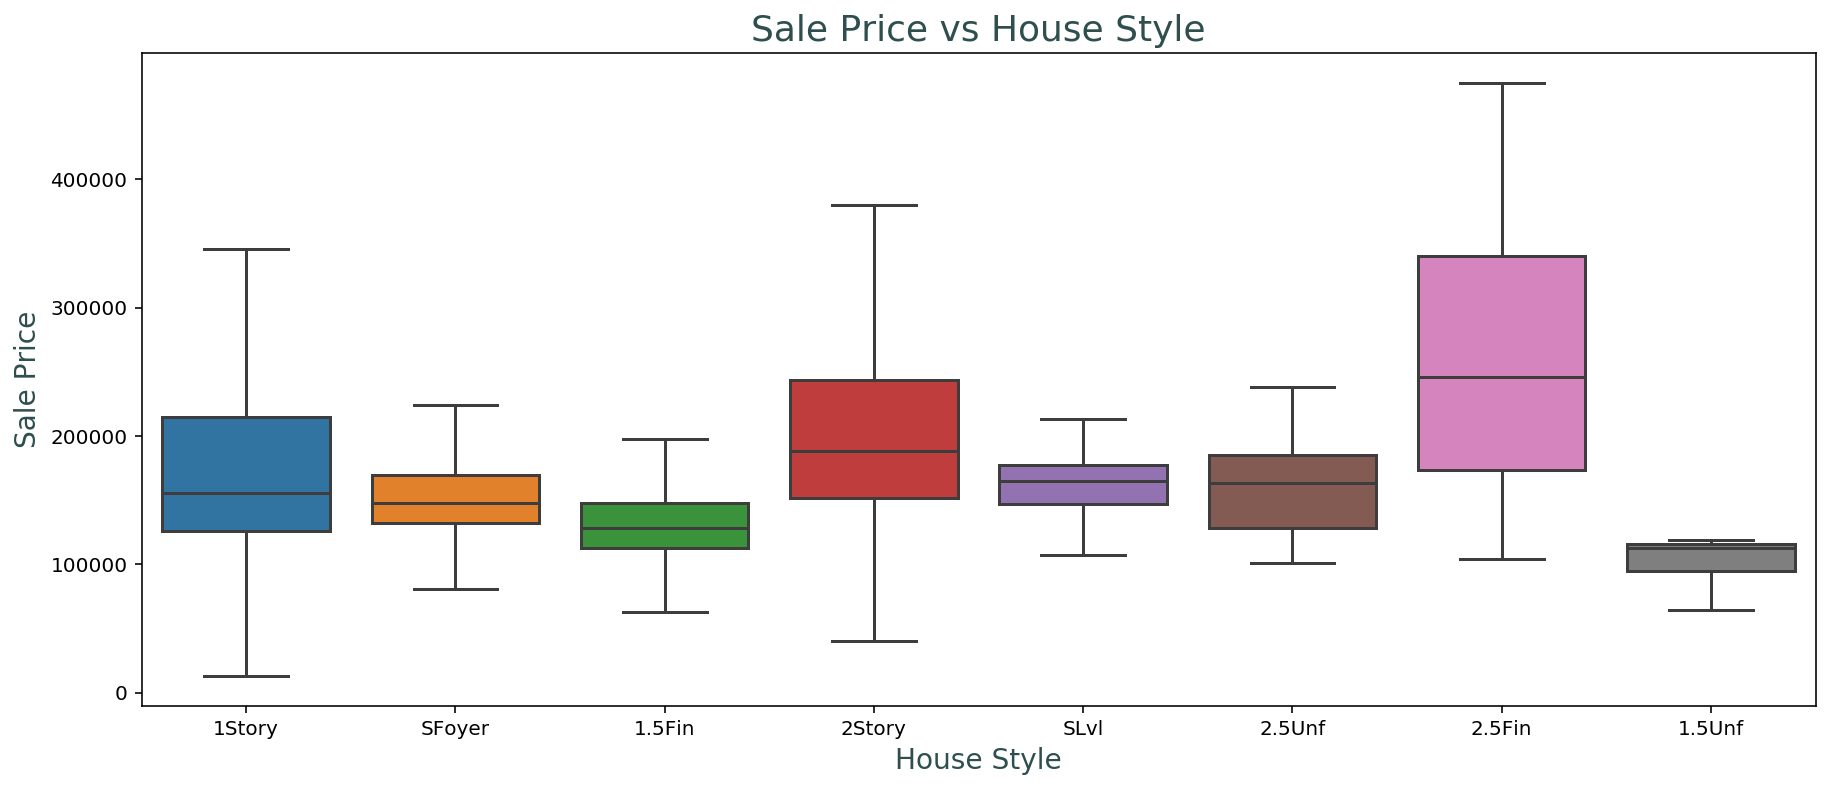

In [494]:
xf=df['House Style']
yf=df['SalePrice']
xlabel='House Style'
ylabel='Sale Price'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [495]:
df['House Style'].value_counts(normalize=True)

1Story    0.526868
2Story    0.286370
1.5Fin    0.100917
SLvl      0.045216
SFoyer    0.027523
2.5Unf    0.005898
1.5Unf    0.004587
2.5Fin    0.002621
Name: House Style, dtype: float64

**'House Style' feature has two majority classes and there is high overlap of Sale Price range among the two classes. So will be dropped.**

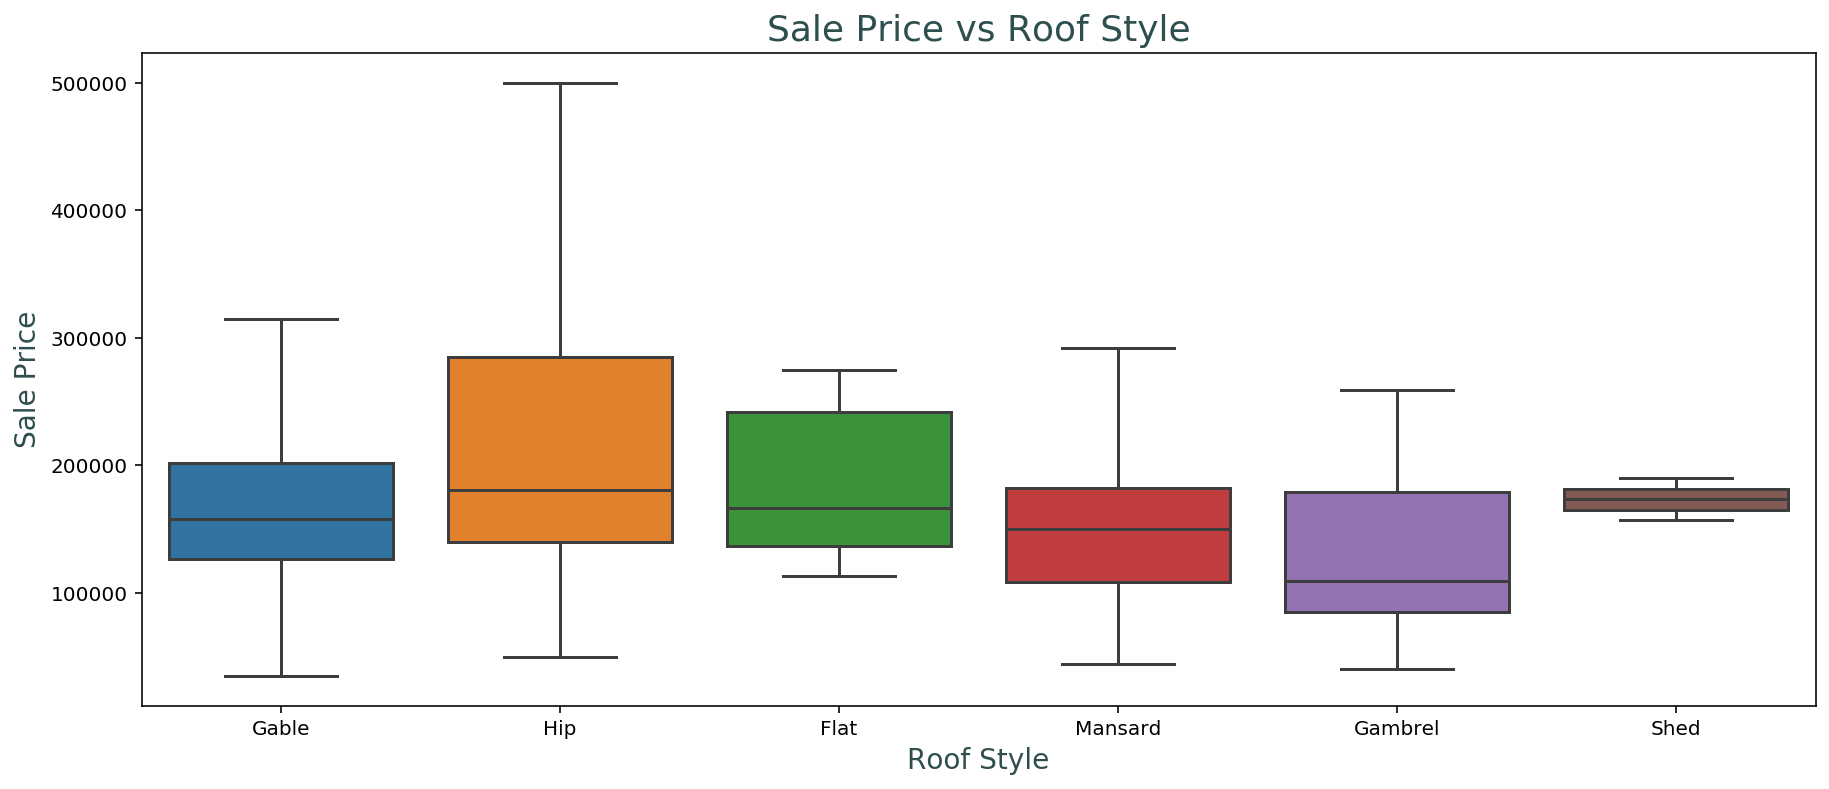

In [496]:
xf=df['Roof Style']
yf=df['SalePrice']
xlabel='Roof Style'
ylabel='Sale Price'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [497]:
df['Roof Style'].value_counts(normalize=True)

Gable      0.793578
Hip        0.188073
Flat       0.007208
Gambrel    0.005242
Mansard    0.004587
Shed       0.001311
Name: Roof Style, dtype: float64

**'Roof Style' feature has 'Gable' class present in 79% of the observations. So will be dropped**

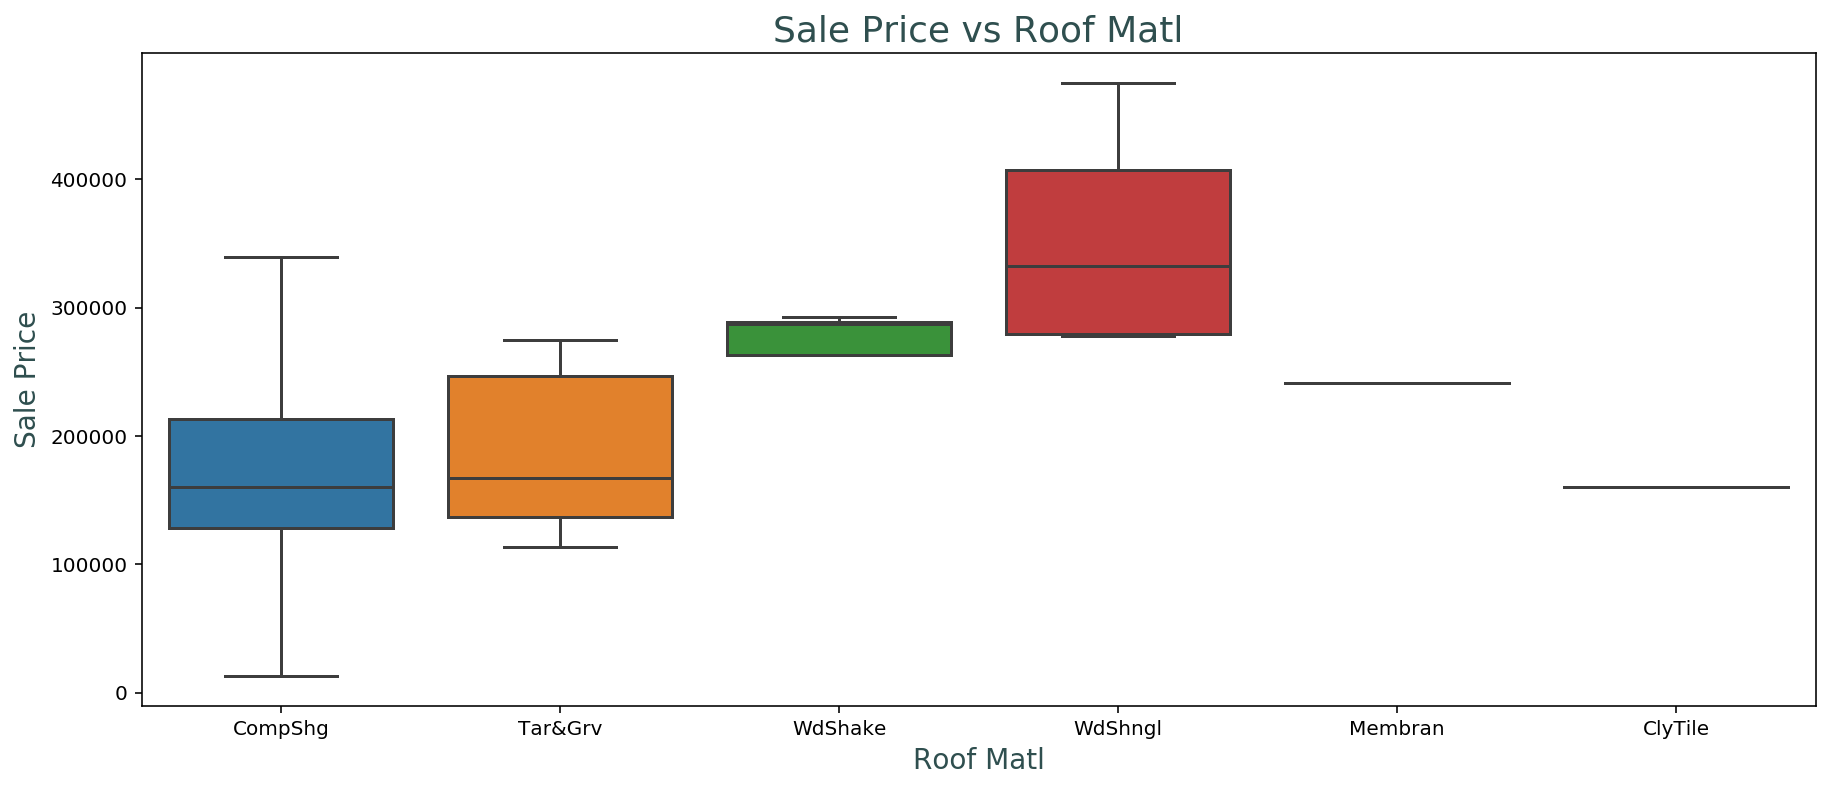

In [498]:
xf=df['Roof Matl']
yf=df['SalePrice']
xlabel='Roof Matl'
ylabel='Sale Price'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [499]:
df['Roof Matl'].value_counts(normalize=True)

CompShg    0.986239
Tar&Grv    0.007208
WdShake    0.002621
WdShngl    0.002621
Membran    0.000655
ClyTile    0.000655
Name: Roof Matl, dtype: float64

**'Roof Matl' feature has 'CompShg'class present in 98% of the observations. So will be dropped**

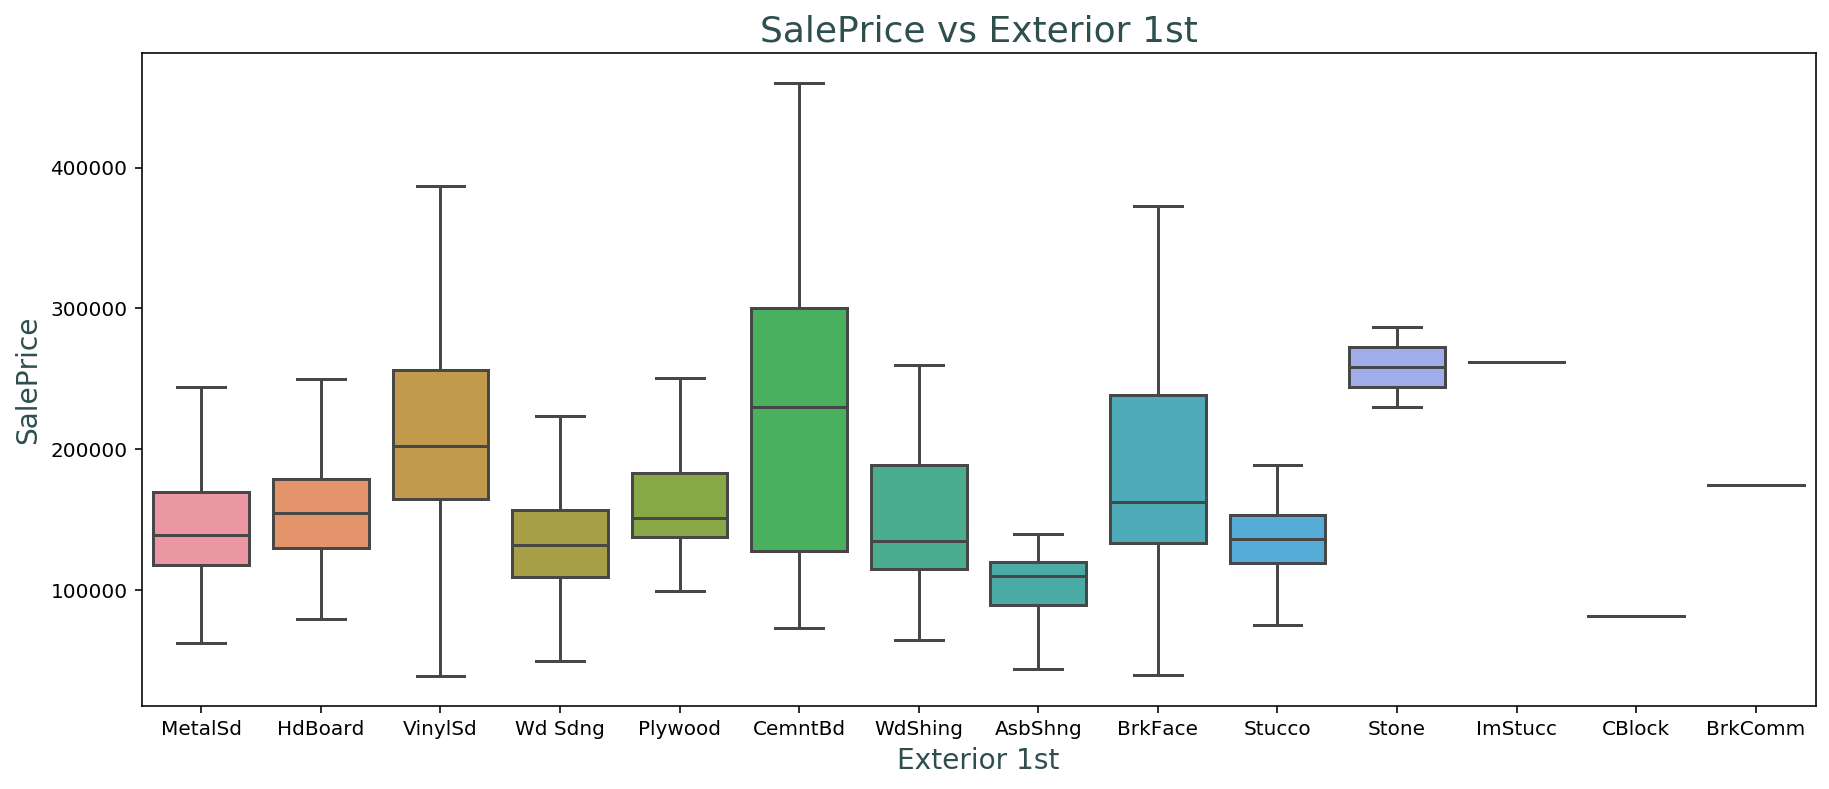

In [500]:
xf=df['Exterior 1st']
yf=df['SalePrice']
xlabel='Exterior 1st'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

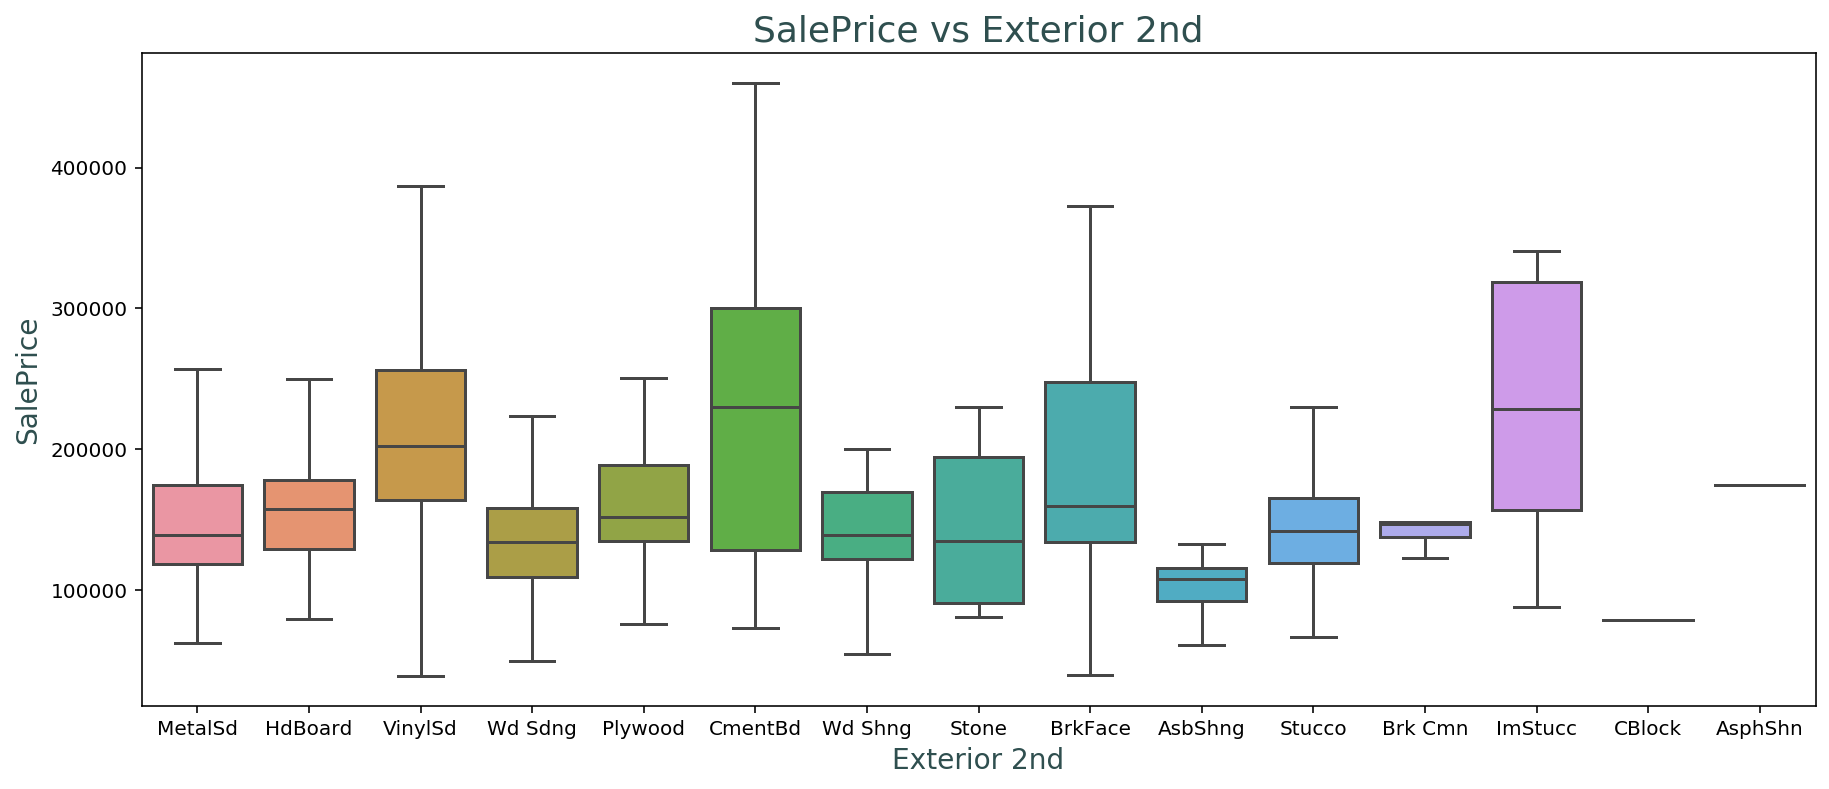

In [501]:
xf=df['Exterior 2nd']
yf=df['SalePrice']
xlabel='Exterior 2nd'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

**Exterior 1st and Exterior 2nd do not have much variation in Sale price among their classes. So will be dropped**

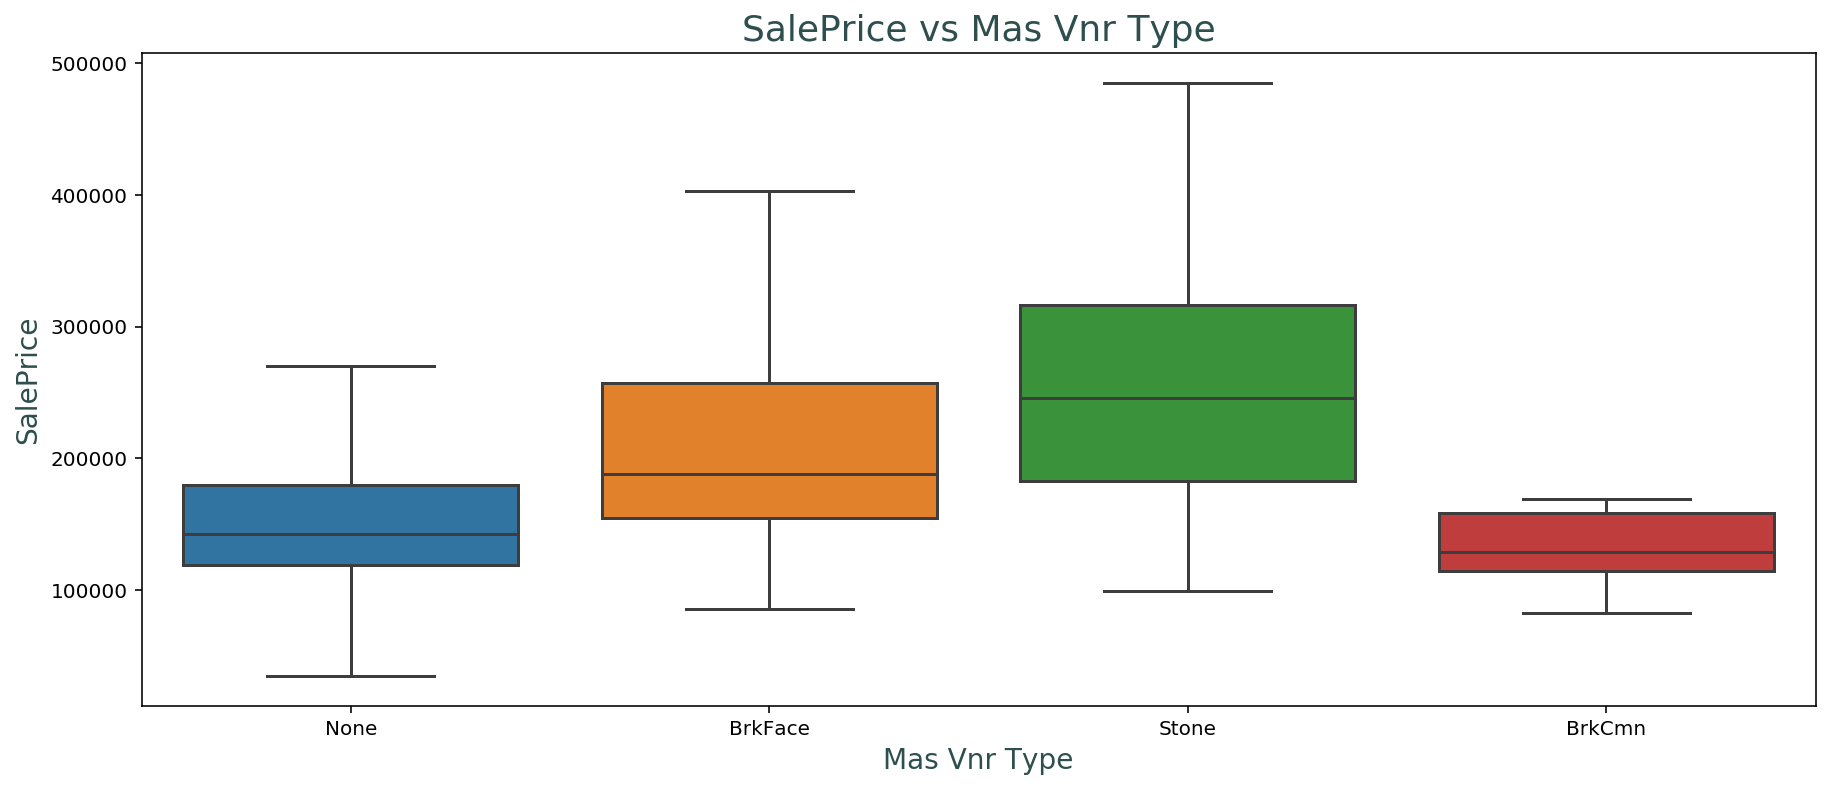

In [502]:
xf=df['Mas Vnr Type']
yf=df['SalePrice']
xlabel='Mas Vnr Type'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [503]:
df['Mas Vnr Type'].value_counts(normalize=True)

None       0.602386
BrkFace    0.308151
Stone      0.082174
BrkCmn     0.007290
Name: Mas Vnr Type, dtype: float64

**'Mas Vnr Type' feature does not have significant variation in Sale price among its classes. So will be dropped**

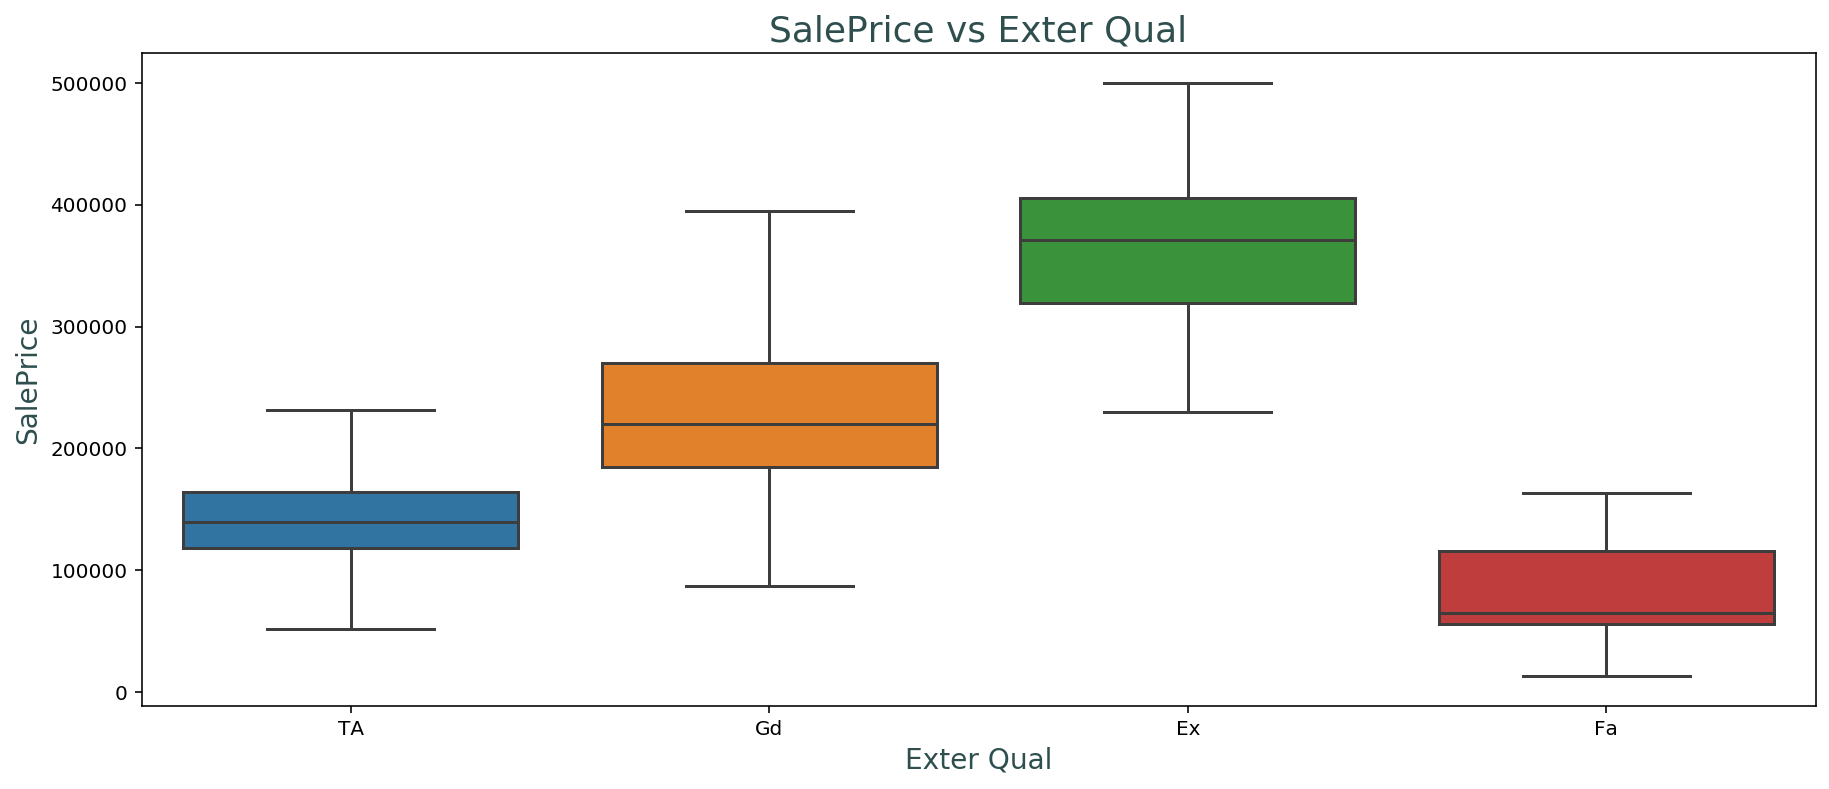

In [504]:
xf=df['Exter Qual']
yf=df['SalePrice']
xlabel='Exter Qual'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [505]:
df['Exter Qual'].value_counts(normalize=True)

TA    0.615990
Gd    0.334862
Ex    0.036697
Fa    0.012451
Name: Exter Qual, dtype: float64

**'Exer Qual' is feature with classes in order so will converted to numerical ordered classes.**

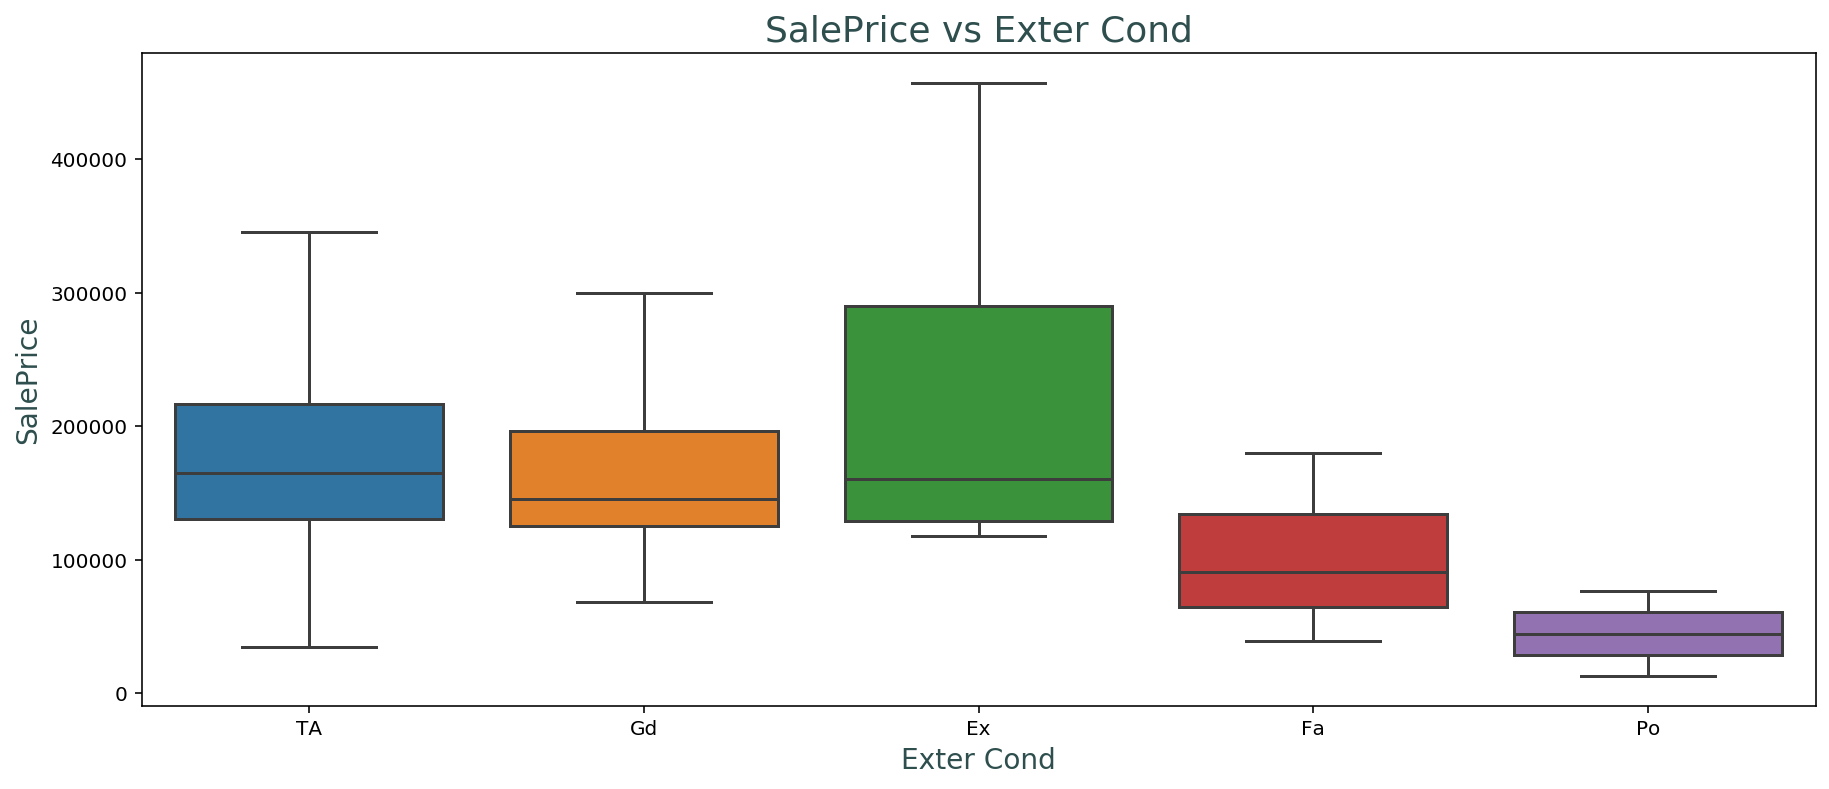

In [506]:
xf=df['Exter Cond']
yf=df['SalePrice']
xlabel='Exter Cond'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [507]:
df['Exter Cond'].value_counts(normalize=True)

TA    0.867628
Gd    0.104194
Fa    0.023591
Ex    0.003277
Po    0.001311
Name: Exter Cond, dtype: float64

**'Exer Cond'feature has 'TA'class present in 86% of the observations. So will be dropped**

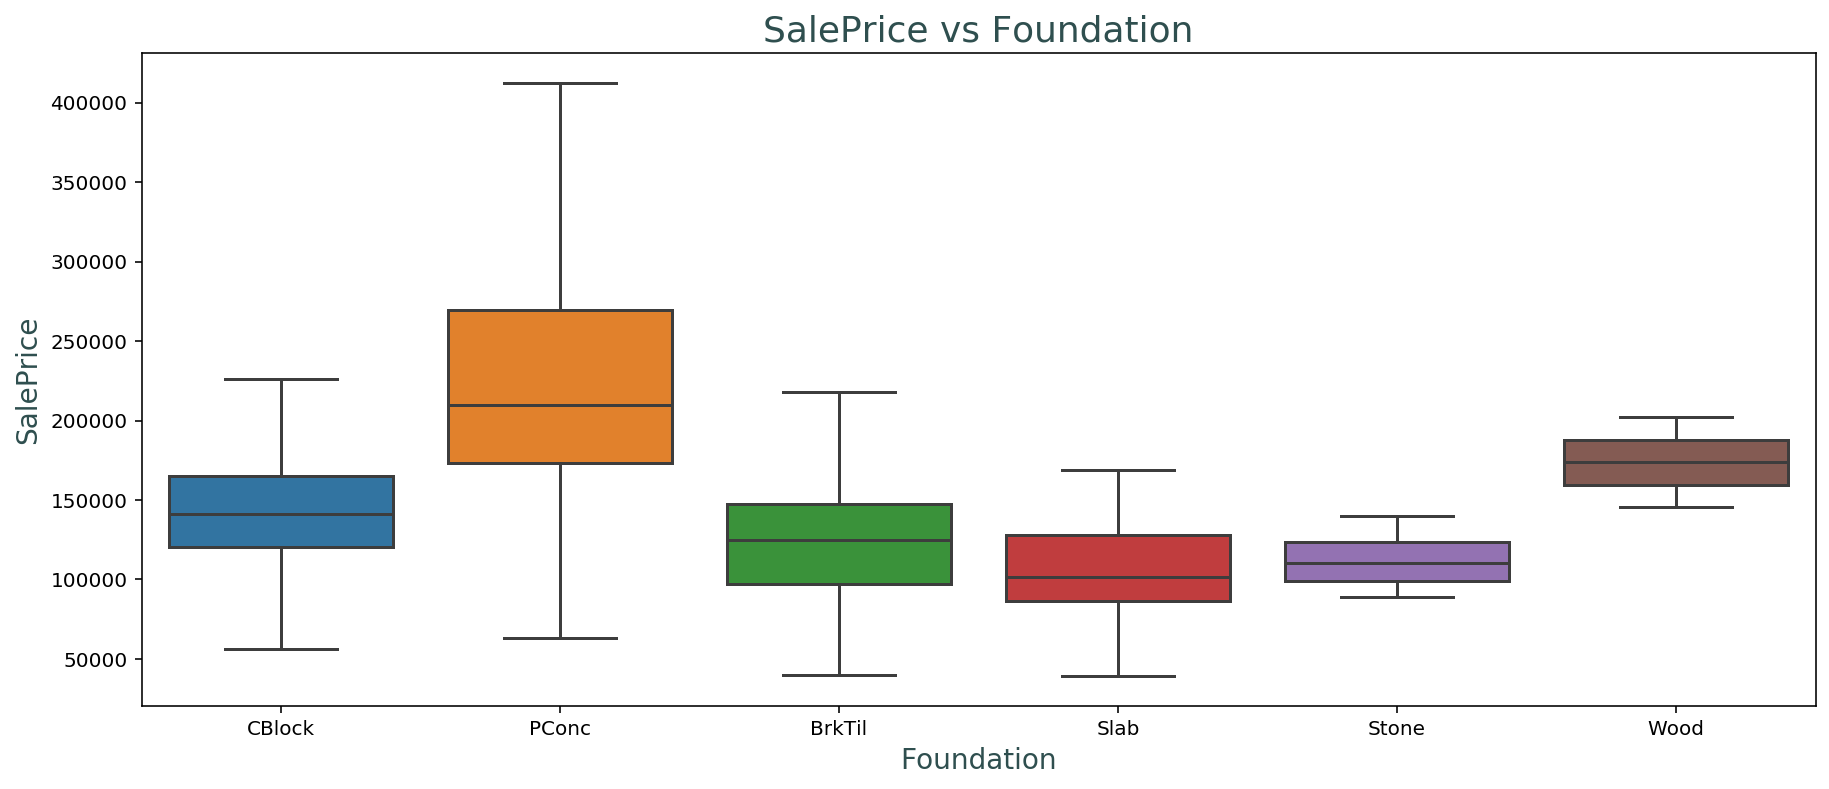

In [508]:
xf=df['Foundation']
yf=df['SalePrice']
xlabel='Foundation'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [509]:
df['Foundation'].value_counts(normalize=True)

PConc     0.452163
CBlock    0.418087
BrkTil    0.105505
Slab      0.020315
Stone     0.002621
Wood      0.001311
Name: Foundation, dtype: float64

**'Foundation' feature does have significant variation in Sale price among its classes.**

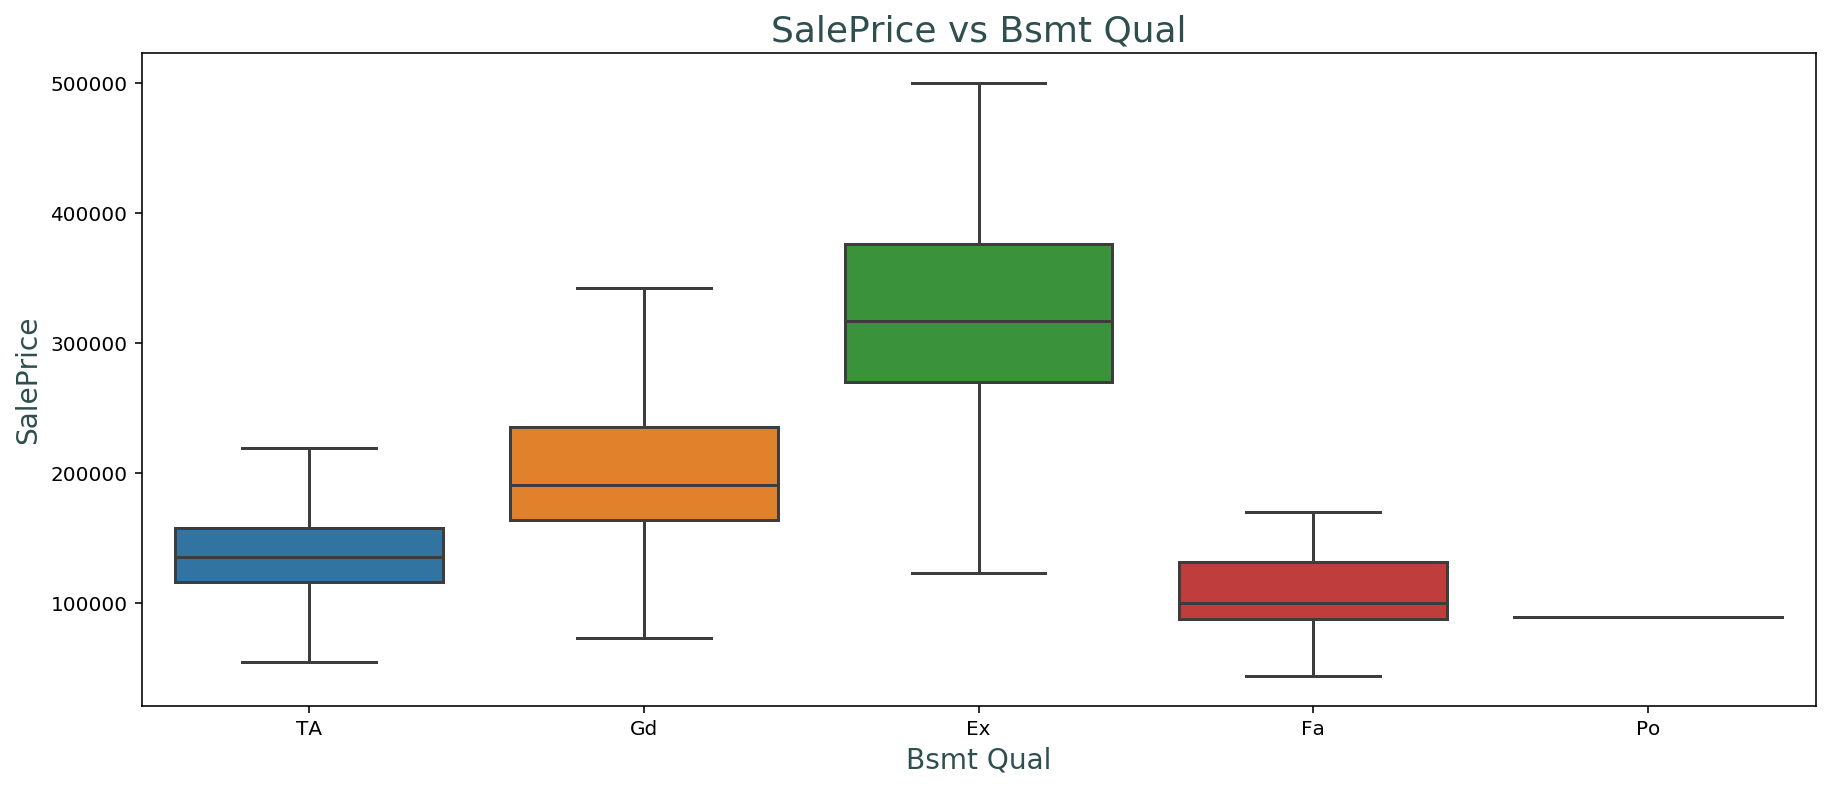

In [510]:
xf=df['Bsmt Qual']
yf=df['SalePrice']
xlabel='Bsmt Qual'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [511]:
df['Bsmt Qual'].value_counts(normalize=True)

TA    0.443396
Gd    0.432615
Ex    0.091644
Fa    0.031671
Po    0.000674
Name: Bsmt Qual, dtype: float64

**'Bsmt Qual' feature does have significant variation in Sale price among its classes.**

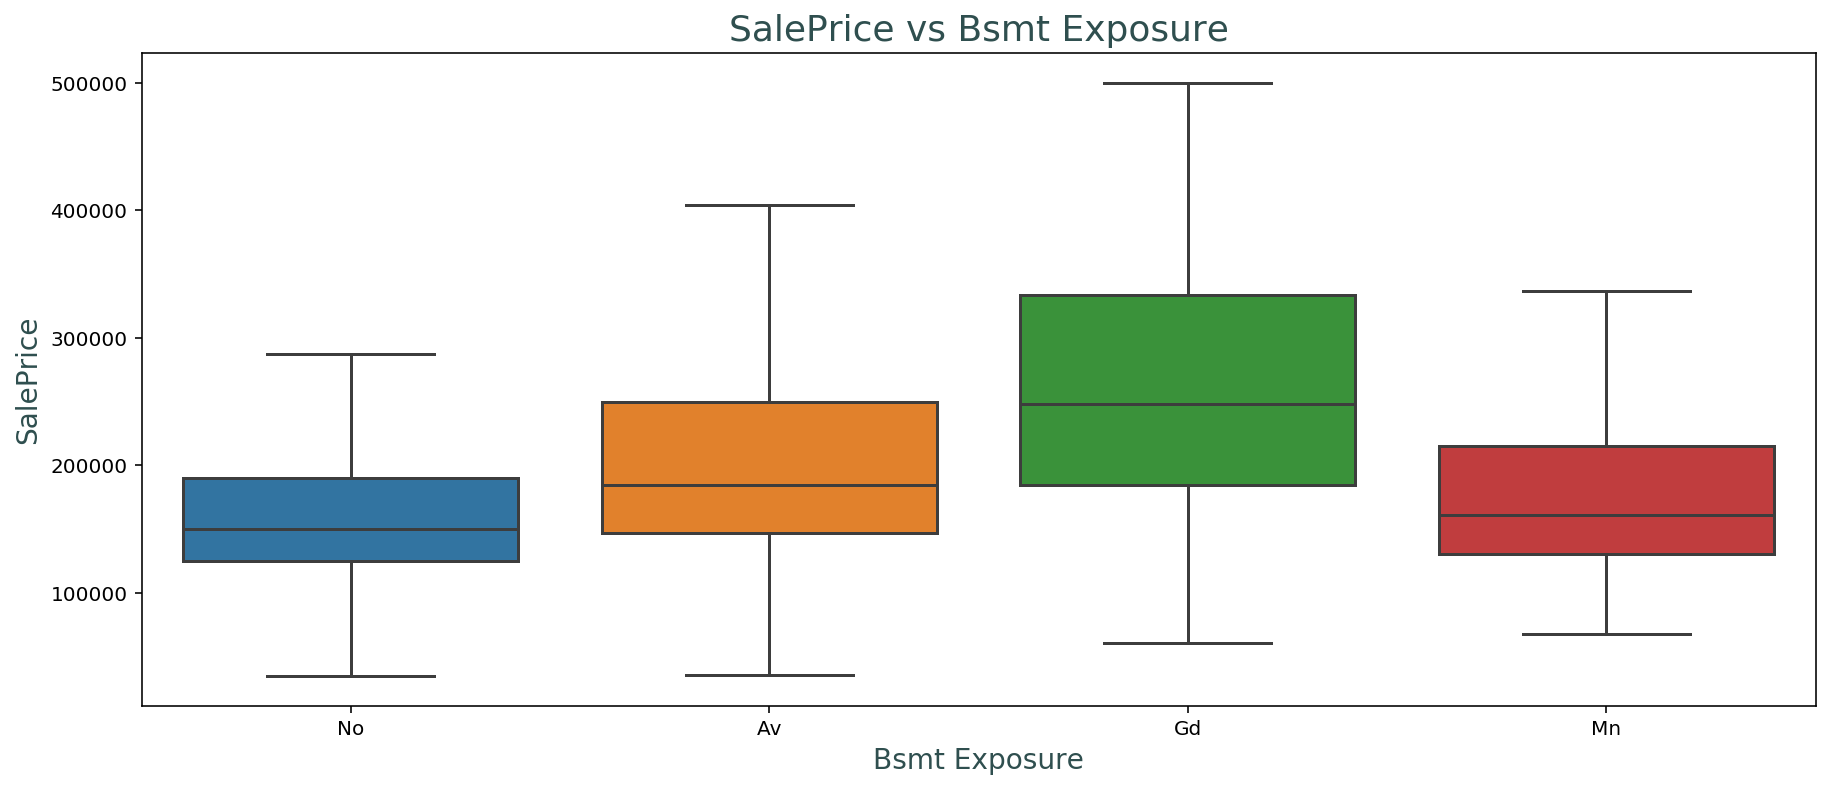

In [512]:
xf=df['Bsmt Exposure']
yf=df['SalePrice']
xlabel='Bsmt Exposure'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [513]:
df['Bsmt Exposure'].value_counts(normalize=True)

No    0.661715
Av    0.149899
Gd    0.102633
Mn    0.085753
Name: Bsmt Exposure, dtype: float64

**'Bsmt Exposure' feature does not have significant variation in Sale price among its classes. So will be dropped.**

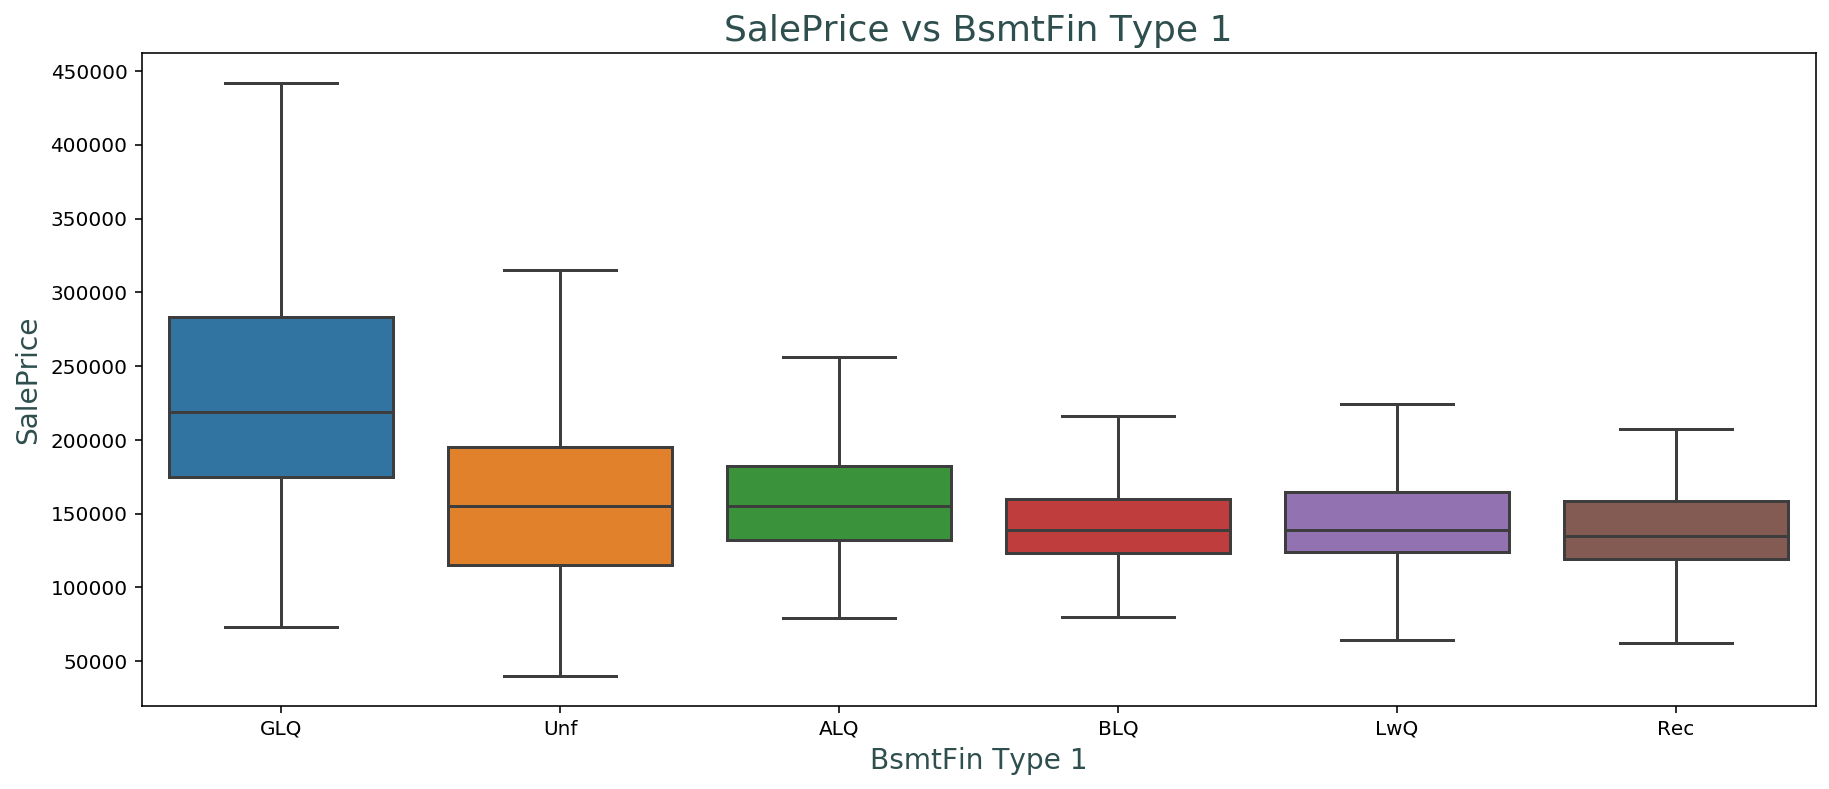

In [514]:
xf=df['BsmtFin Type 1']
yf=df['SalePrice']
xlabel='BsmtFin Type 1'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [515]:
df['BsmtFin Type 1'].value_counts(normalize=True)

GLQ    0.309973
Unf    0.293801
ALQ    0.150270
BLQ    0.102426
Rec    0.093666
LwQ    0.049865
Name: BsmtFin Type 1, dtype: float64

**'BsmtFin Type 1' feature does have significant variation in Sale price among its classes.**

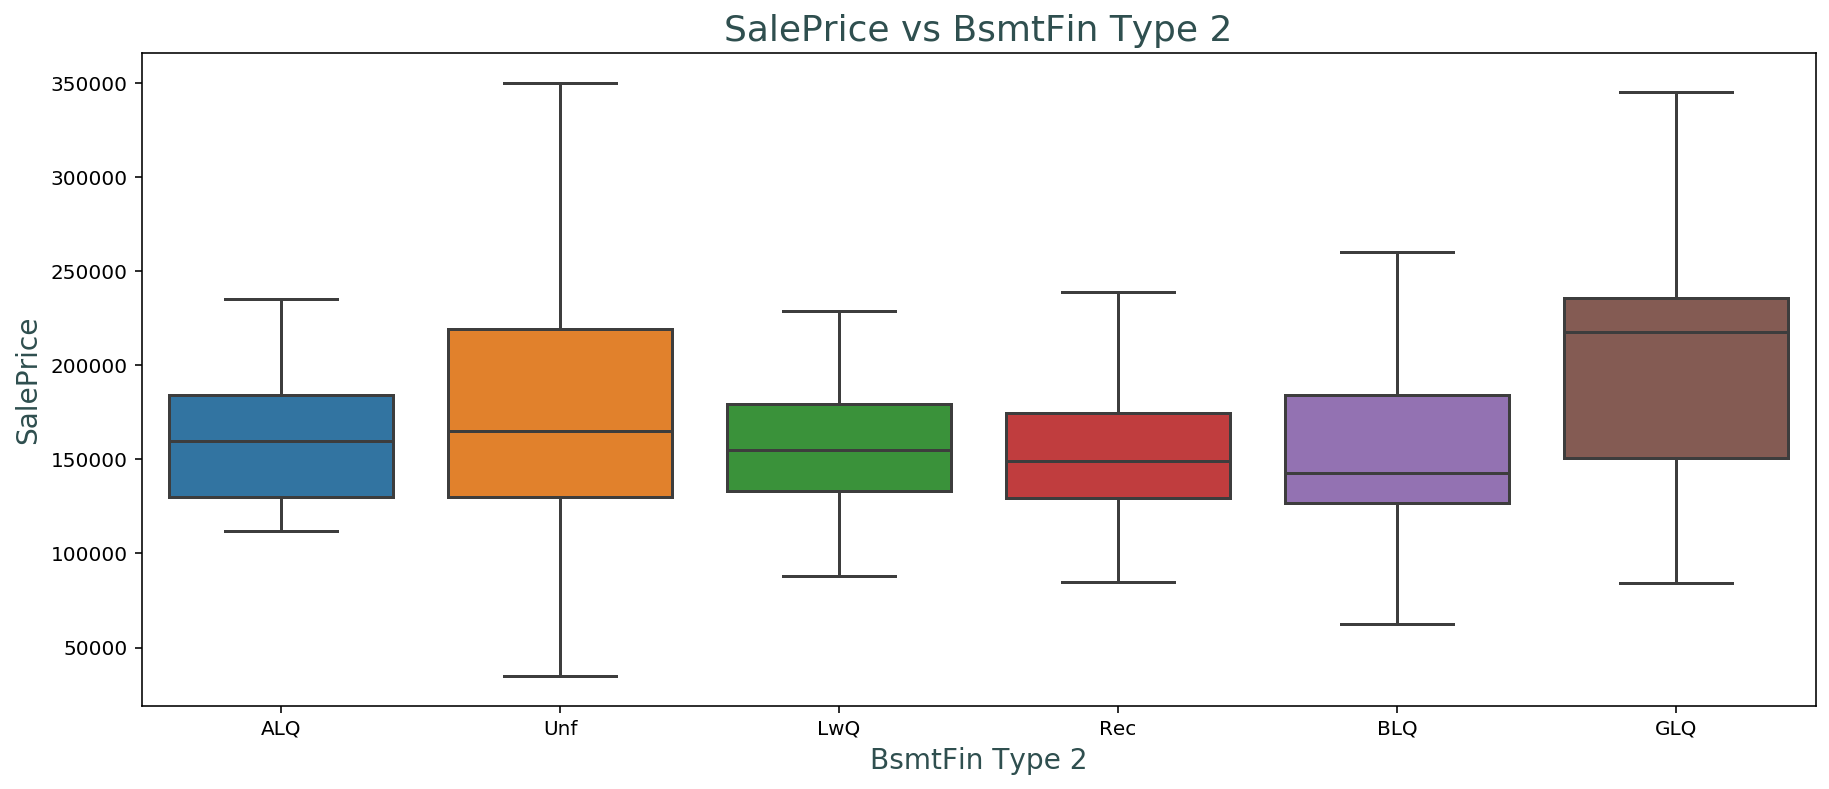

In [516]:
xf=df['BsmtFin Type 2']
yf=df['SalePrice']
xlabel='BsmtFin Type 2'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [517]:
df['BsmtFin Type 2'].value_counts(normalize=True)

Unf    0.879299
Rec    0.036413
LwQ    0.028995
BLQ    0.024949
ALQ    0.017532
GLQ    0.012812
Name: BsmtFin Type 2, dtype: float64

**'BsmtFin Type 2' feature has 'Unf'class present in 87% of the observations. So will be dropped**

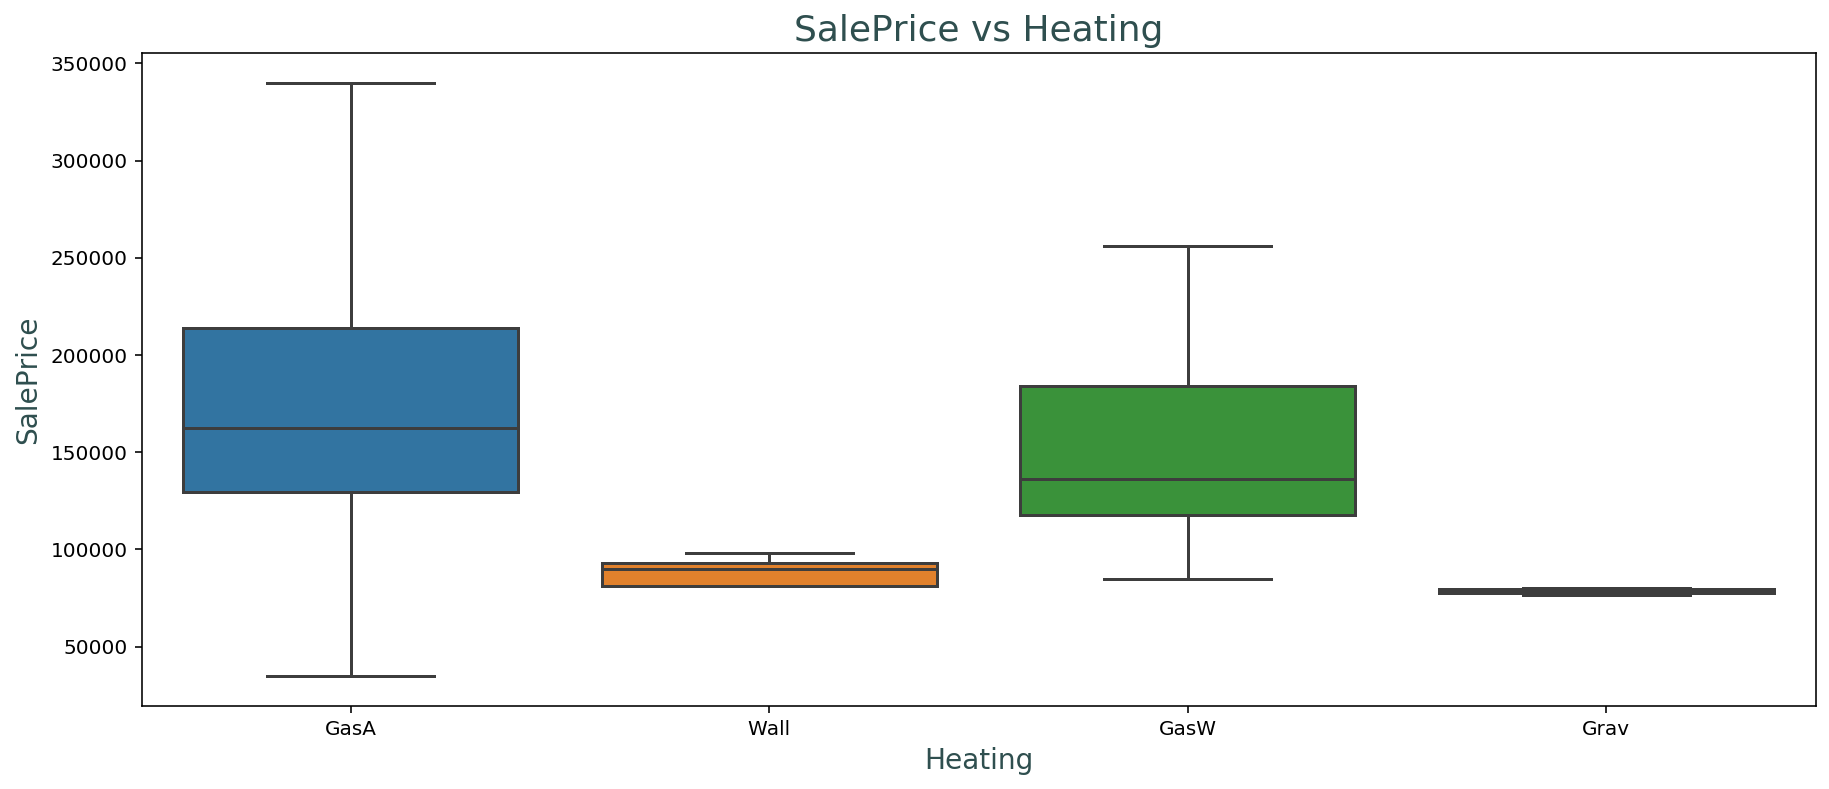

In [518]:
xf=df['Heating']
yf=df['SalePrice']
xlabel='Heating'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [519]:
df['Heating'].value_counts(normalize=True)

GasA    0.983617
GasW    0.011140
Wall    0.003277
Grav    0.001966
Name: Heating, dtype: float64

**'Heating' feature has 'GasA'class present in 98% of the observations. So will be dropped**

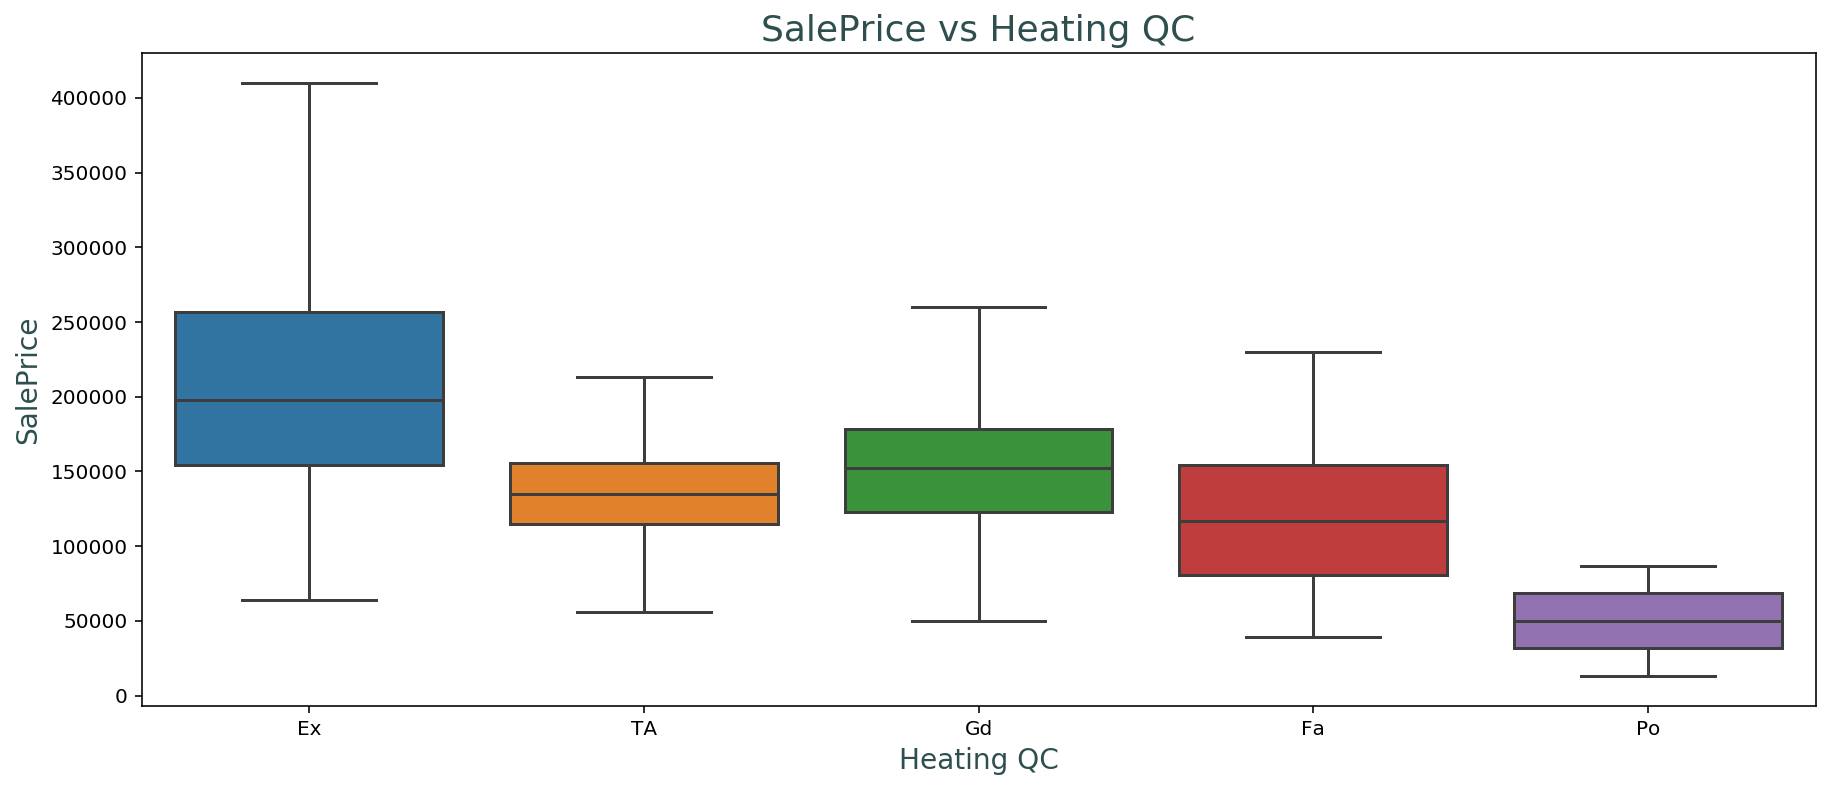

In [520]:
xf=df['Heating QC']
yf=df['SalePrice']
xlabel='Heating QC'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [521]:
df['Heating QC'].value_counts(normalize=True)

Ex    0.514417
TA    0.292267
Gd    0.156619
Fa    0.035387
Po    0.001311
Name: Heating QC, dtype: float64

**'Heating QC' feature has significant variation of Sale price across its classes**

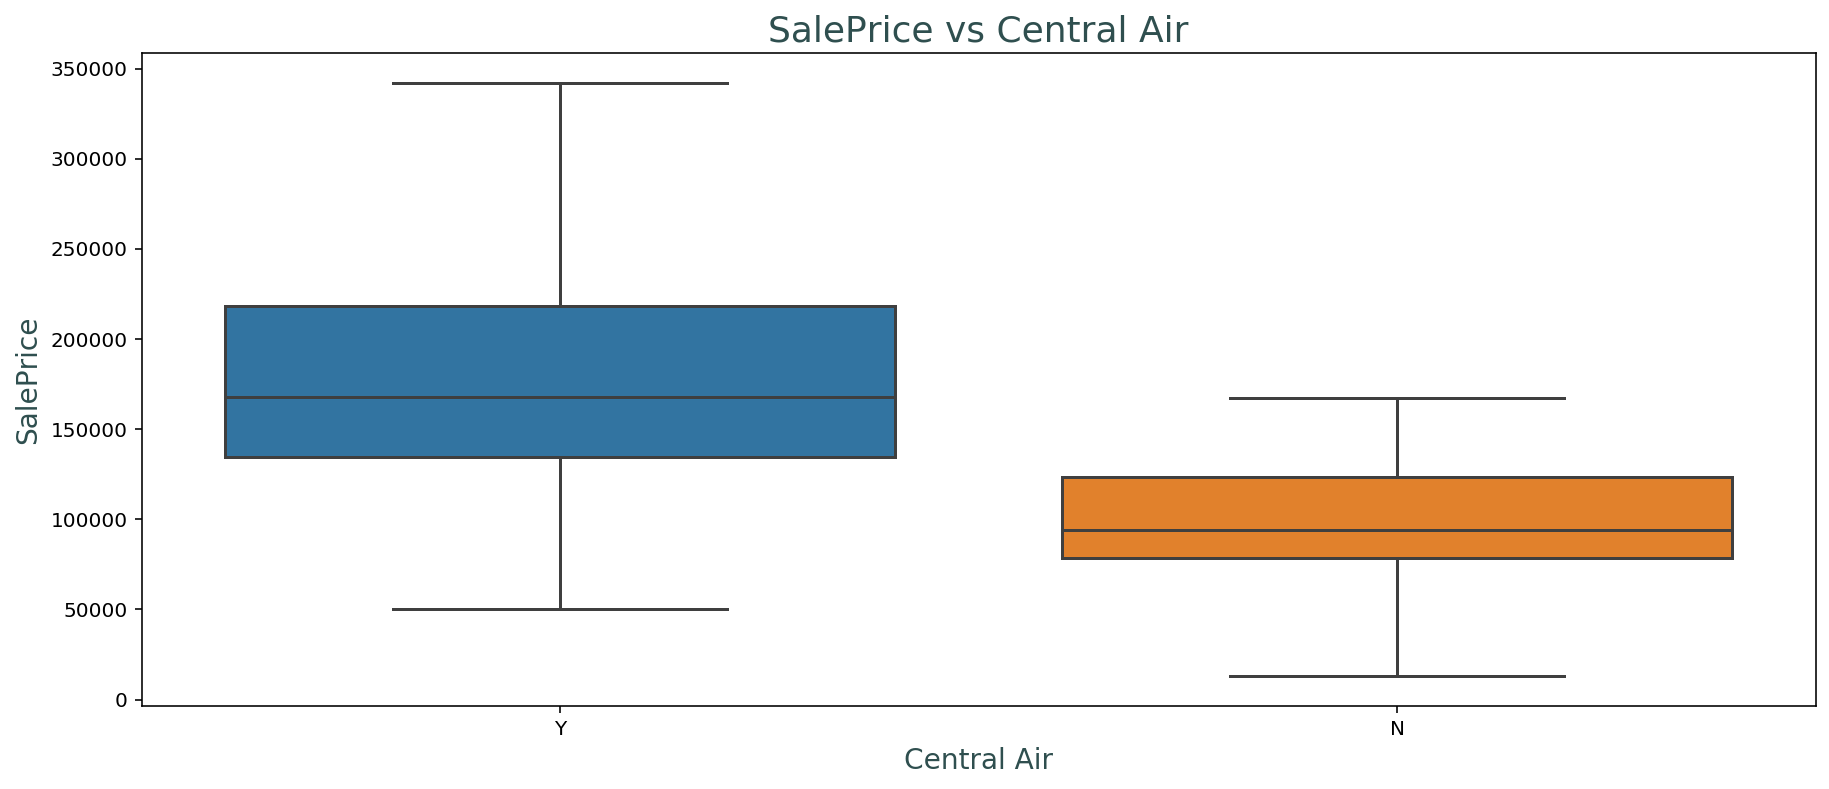

In [522]:
xf=df['Central Air']
yf=df['SalePrice']
xlabel='Central Air'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [523]:
df['Central Air'].value_counts(normalize=True)

Y    0.932503
N    0.067497
Name: Central Air, dtype: float64

**'Central Air' feature - even though has 'Y'class present in 93% of the observations, there is a very difference in the sale price range between the two classes**

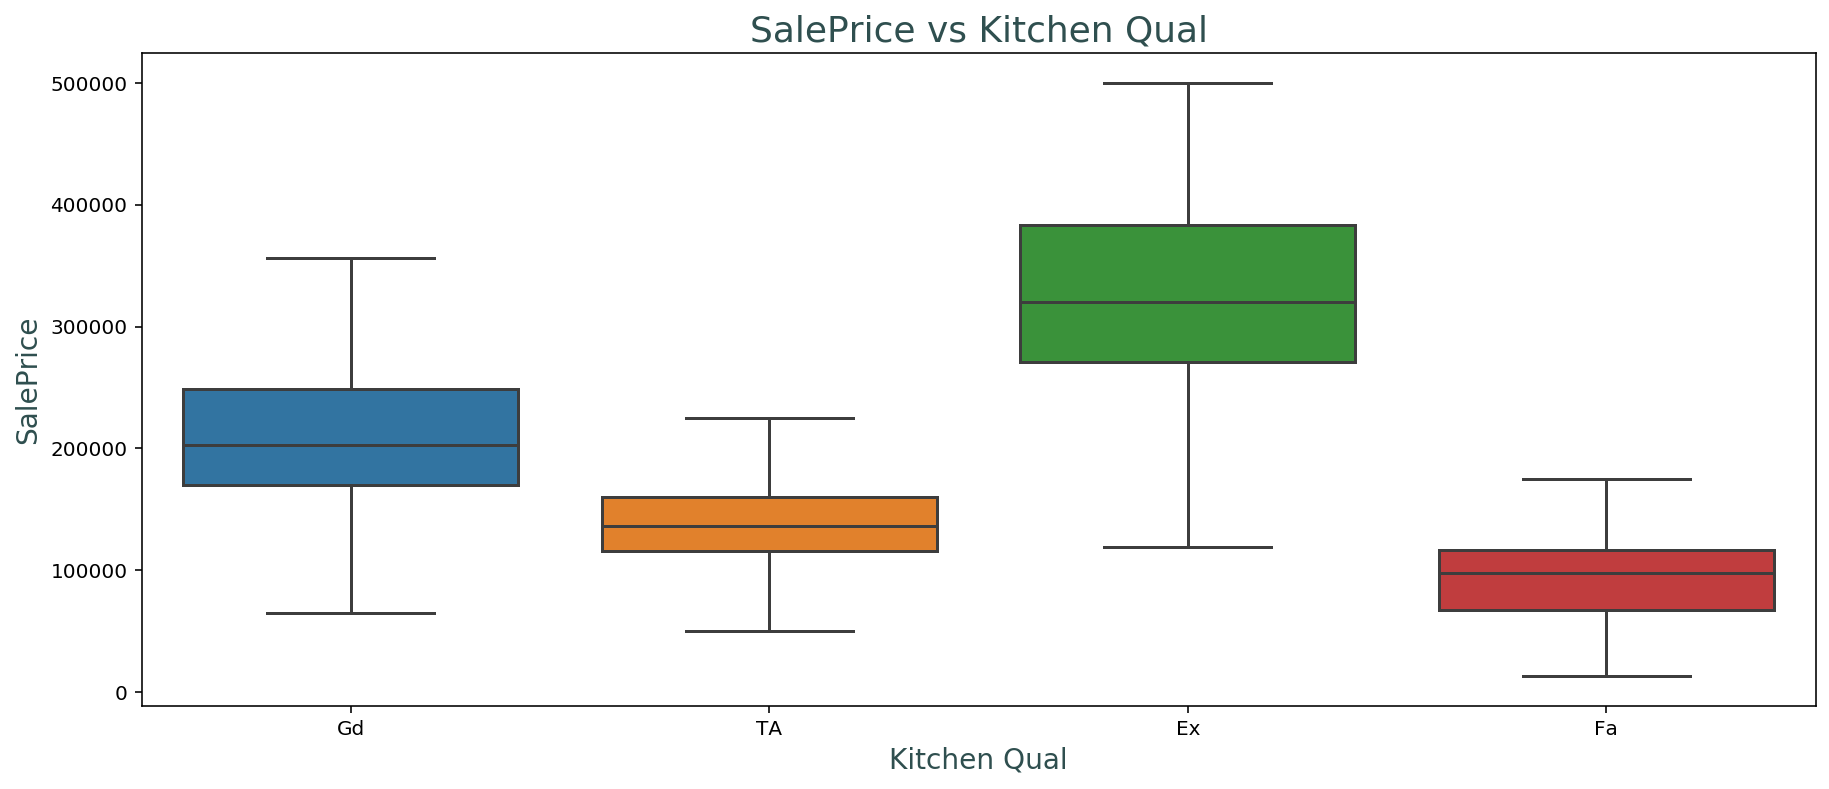

In [524]:
xf=df['Kitchen Qual']
yf=df['SalePrice']
xlabel='Kitchen Qual'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [525]:
df['Kitchen Qual'].value_counts(normalize=True)

TA    0.515727
Gd    0.385976
Ex    0.074705
Fa    0.023591
Name: Kitchen Qual, dtype: float64

**'Kitchen Qual' feature has significant variation of Sale price across its classes**

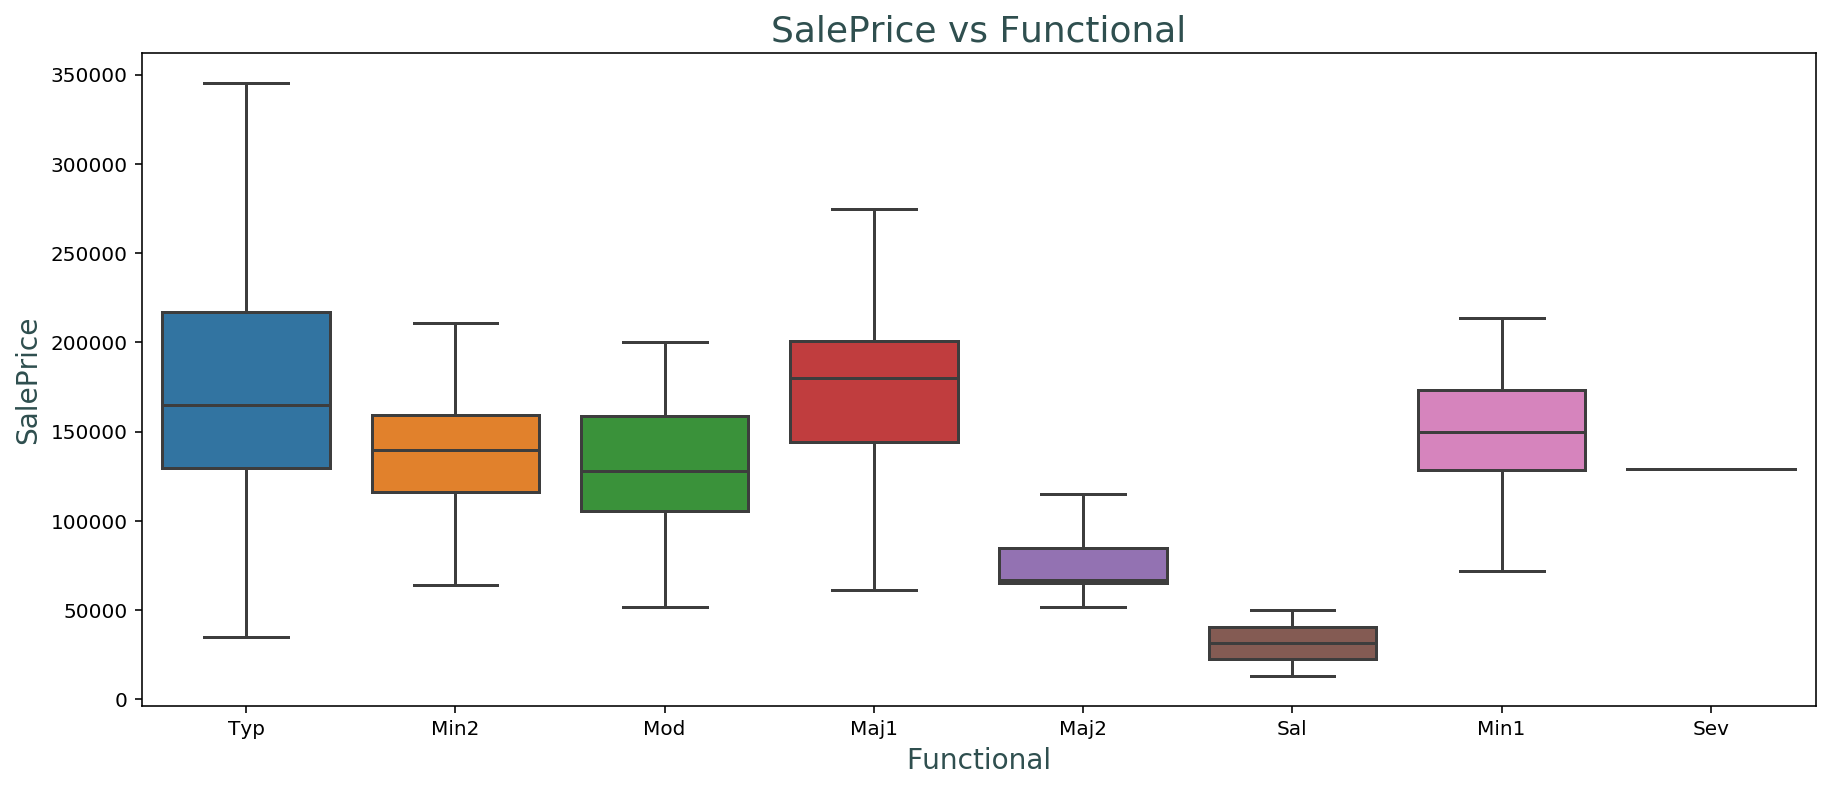

In [526]:
xf=df['Functional']
yf=df['SalePrice']
xlabel='Functional'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [527]:
df['Functional'].value_counts(normalize=True)

Typ     0.931193
Min2    0.022936
Min1    0.020315
Mod     0.014417
Maj1    0.005898
Maj2    0.003277
Sal     0.001311
Sev     0.000655
Name: Functional, dtype: float64

**'Functional' feature has 'Typ'class present in 93% of the observations. So will be dropped**

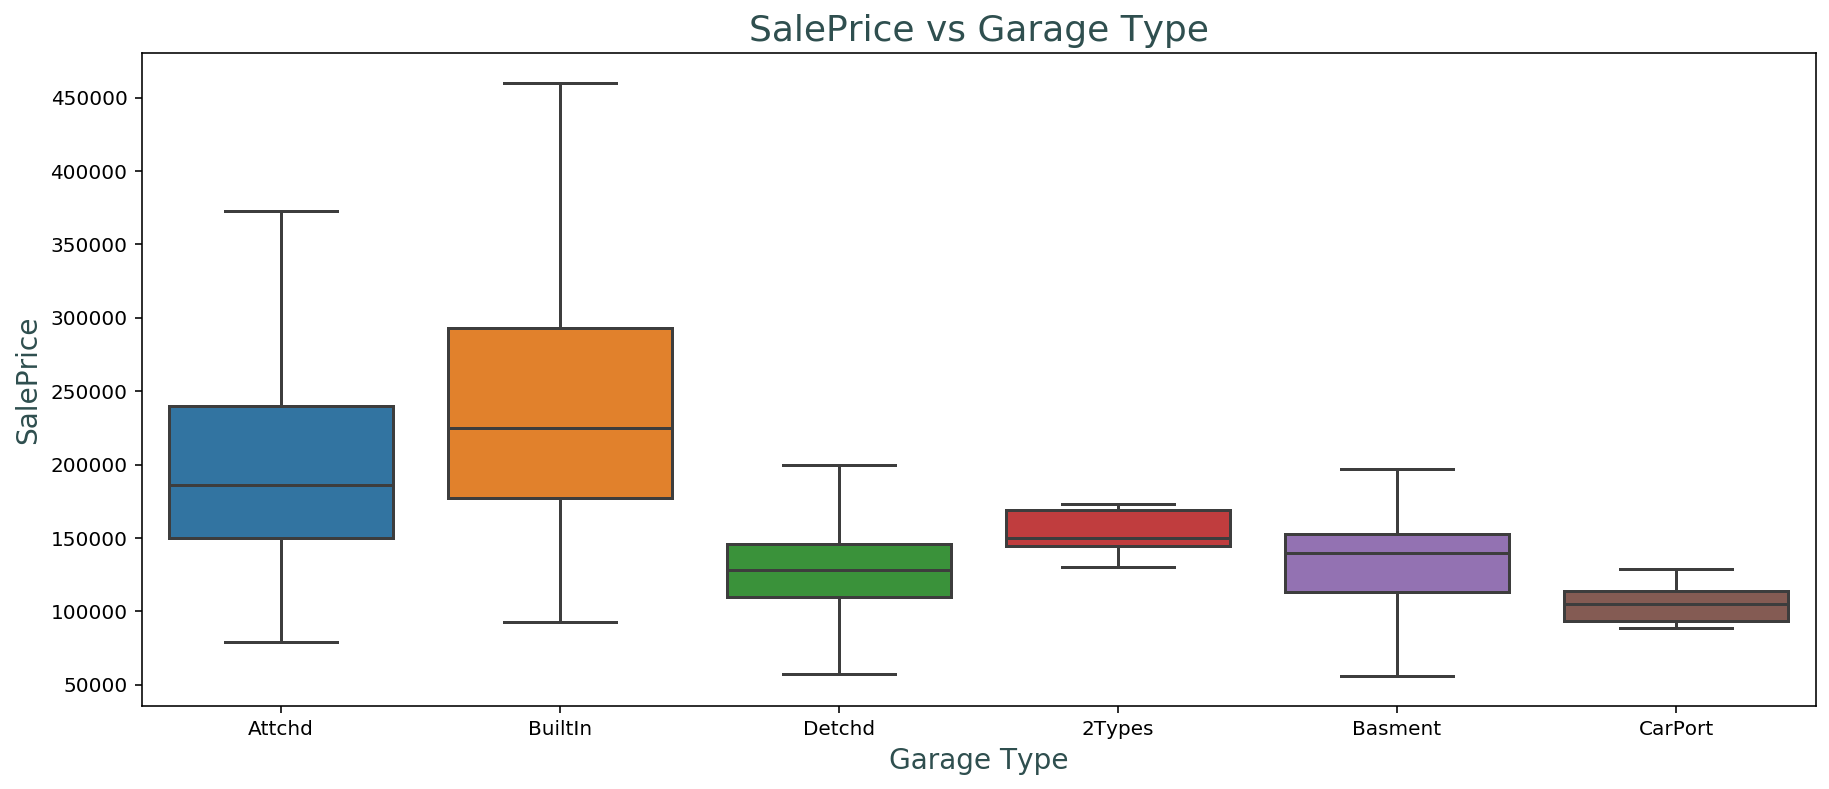

In [528]:
xf=df['Garage Type']
yf=df['SalePrice']
xlabel='Garage Type'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [529]:
df['Garage Type'].value_counts(normalize=True)

Attchd     0.620856
Detchd     0.279696
BuiltIn    0.069061
Basment    0.014503
2Types     0.010359
CarPort    0.005525
Name: Garage Type, dtype: float64

**'Garage Type' Feature has two majority classes covering over 89% and there is very big overlap of ranges between the two. So will be dropped.**

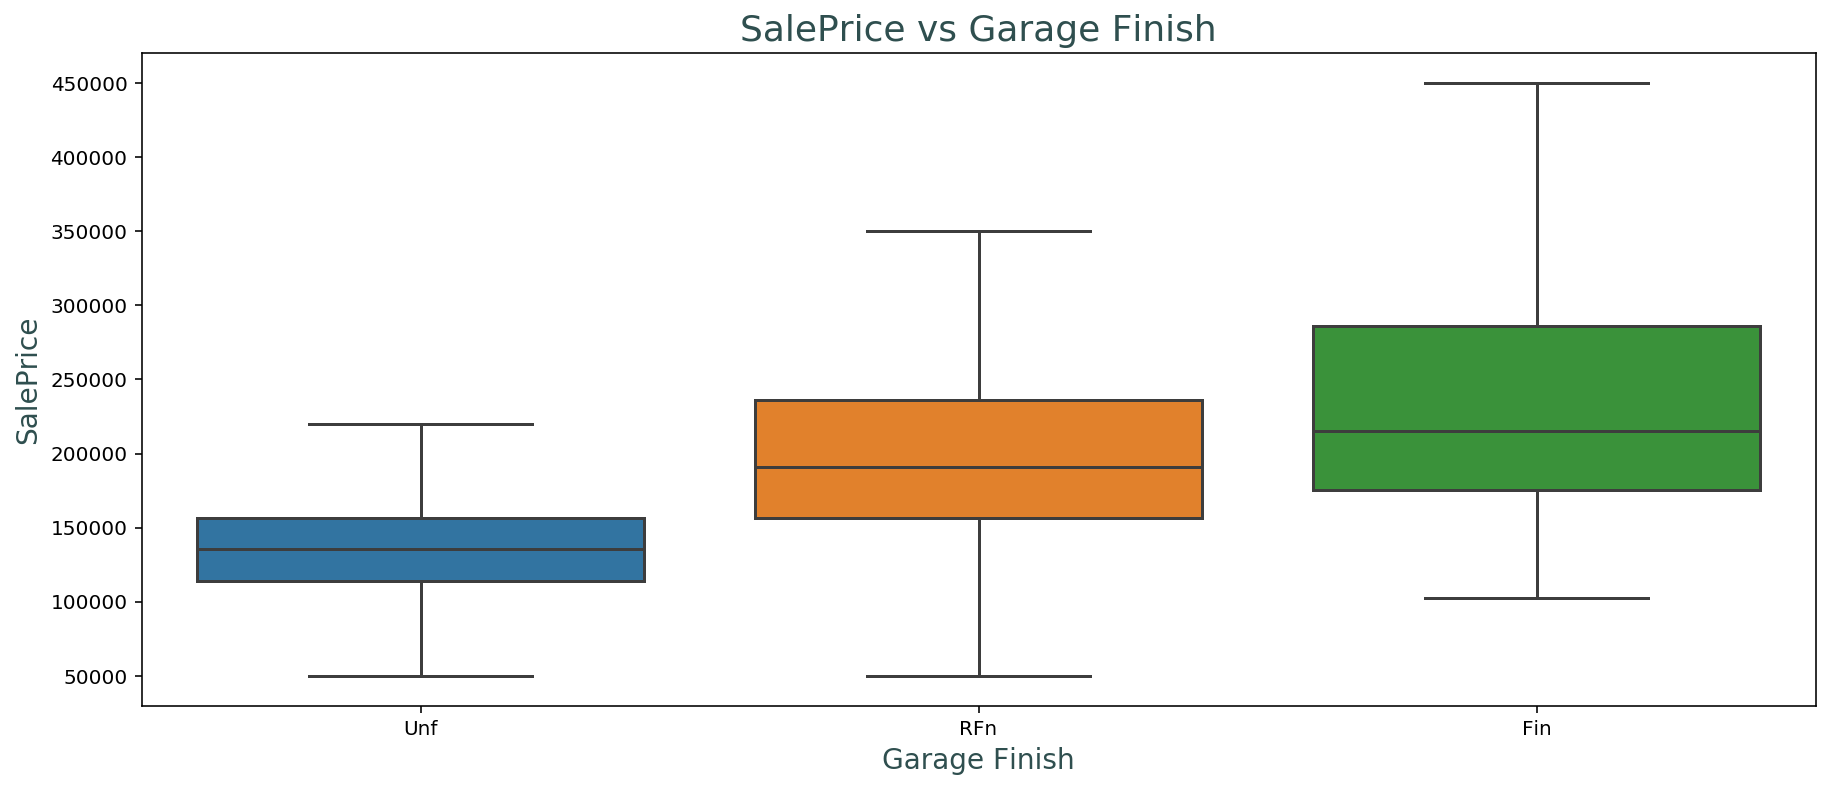

In [530]:
xf=df['Garage Finish']
yf=df['SalePrice']
xlabel='Garage Finish'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [531]:
df['Garage Finish'].value_counts(normalize=True)

Unf    0.446441
RFn    0.295093
Fin    0.258466
Name: Garage Finish, dtype: float64

**'Garage Finish' Feature has very big overlap of Sale Price ranges among its three classes. So will be dropped.**

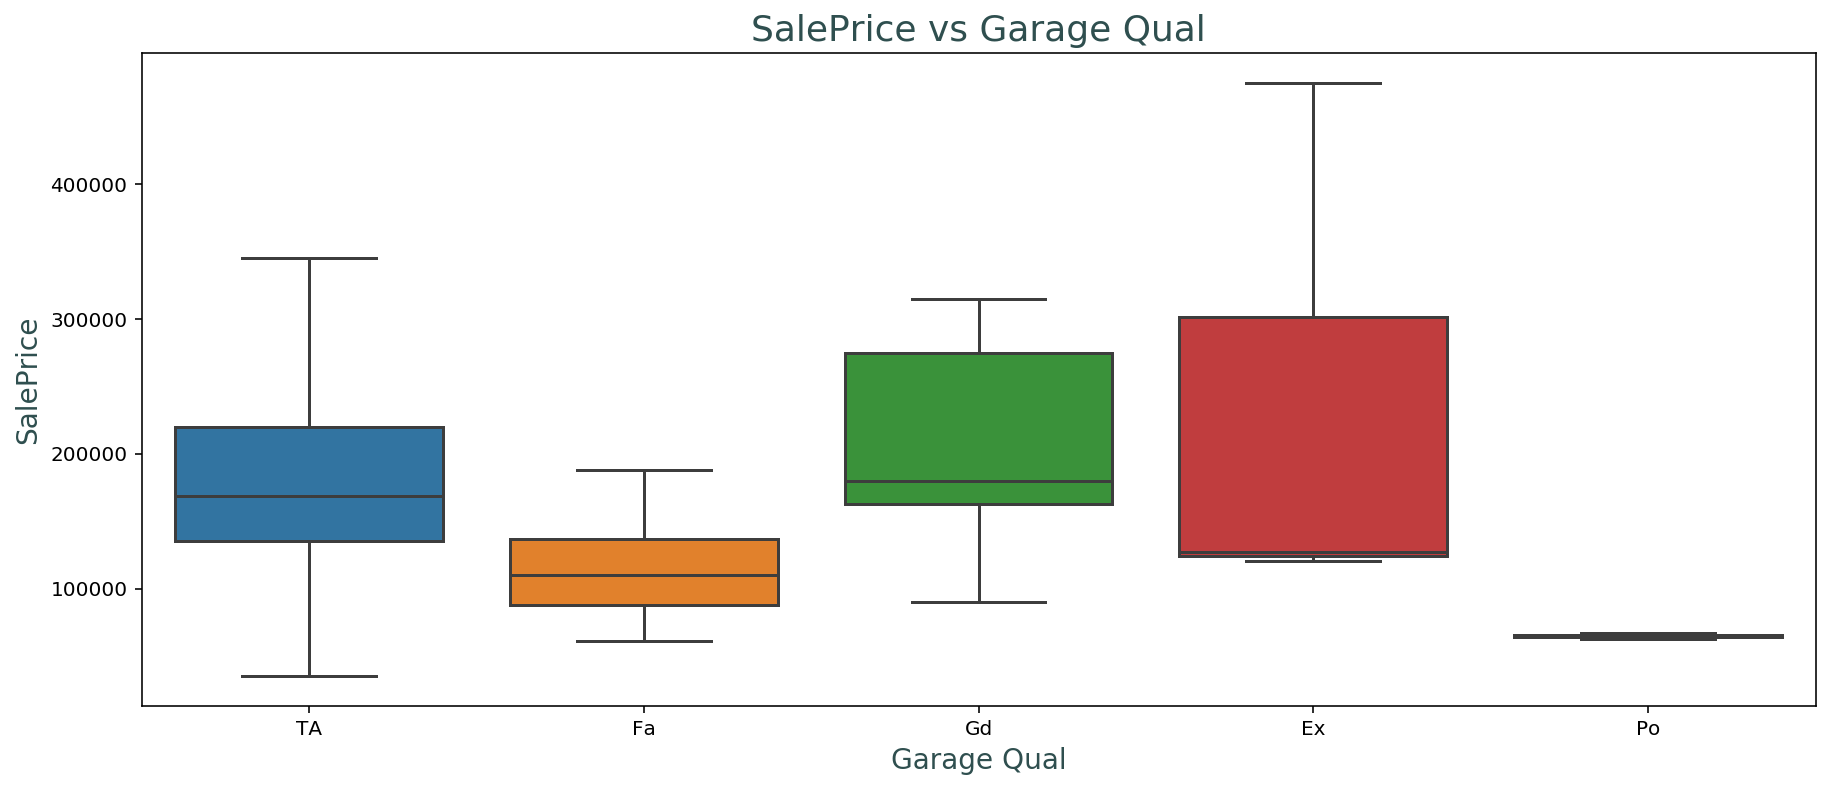

In [532]:
xf=df['Garage Qual']
yf=df['SalePrice']
xlabel='Garage Qual'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [533]:
df['Garage Qual'].value_counts(normalize=True)

TA    0.946786
Fa    0.040774
Gd    0.008984
Ex    0.002073
Po    0.001382
Name: Garage Qual, dtype: float64

**'Garage Qual' feature has 'Typ'class present in 94% of the observations. So will be dropped**

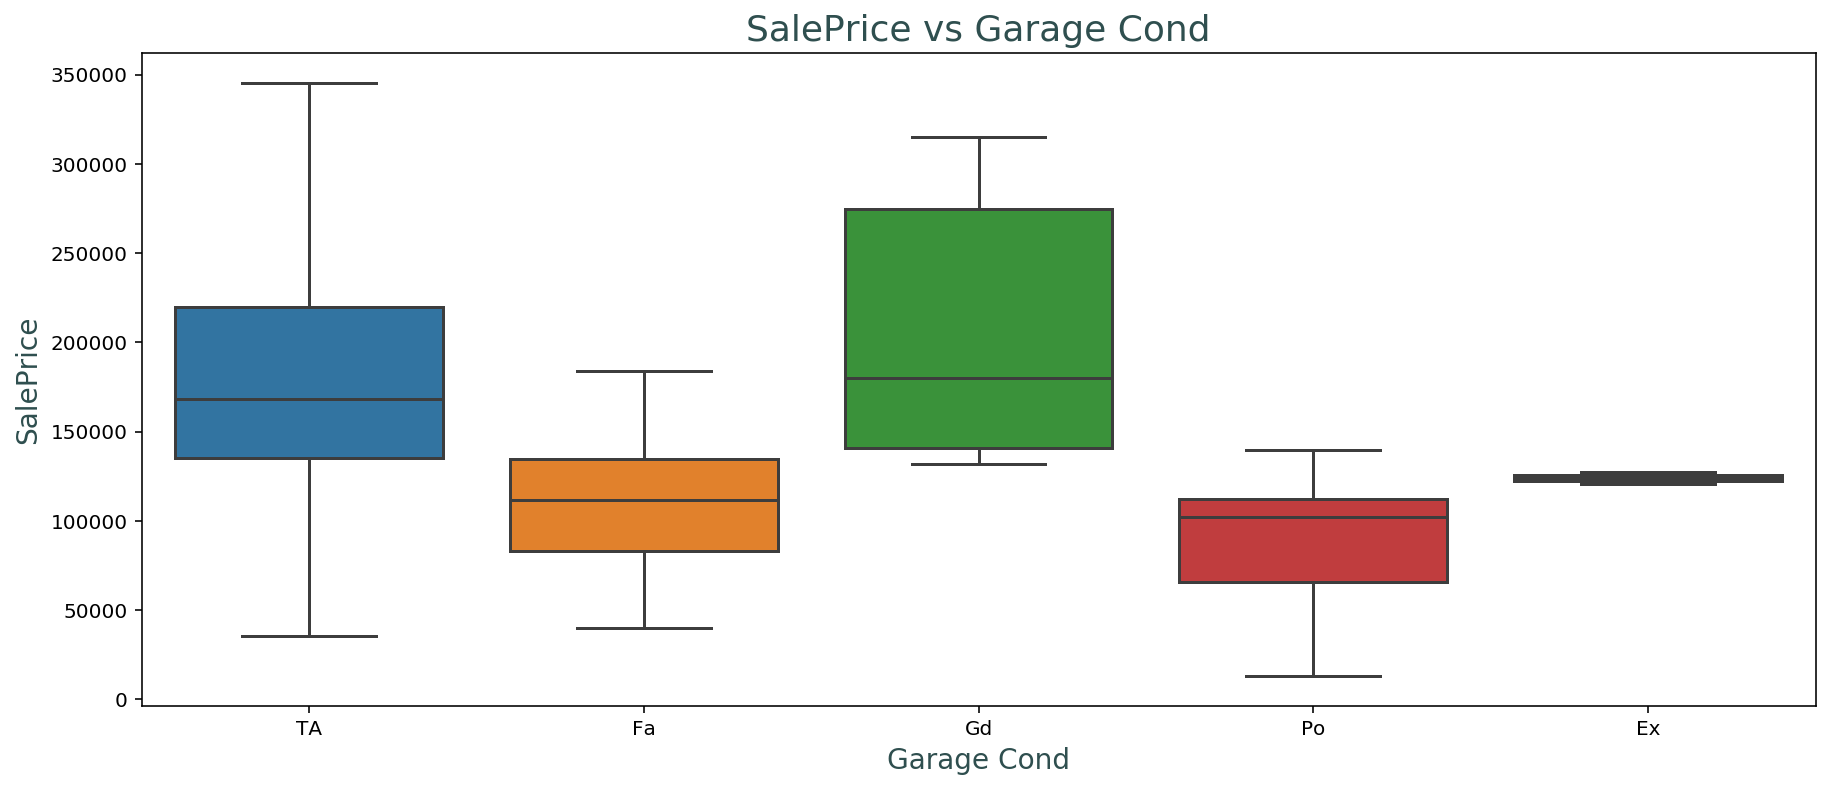

In [534]:
xf=df['Garage Cond']
yf=df['SalePrice']
xlabel='Garage Cond'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [535]:
df['Garage Cond'].value_counts(normalize=True)

TA    0.963372
Fa    0.023497
Gd    0.006220
Po    0.005529
Ex    0.001382
Name: Garage Cond, dtype: float64

**'Garage Cond' feature has 'TA'class present in 96% of the observations. So will be dropped**

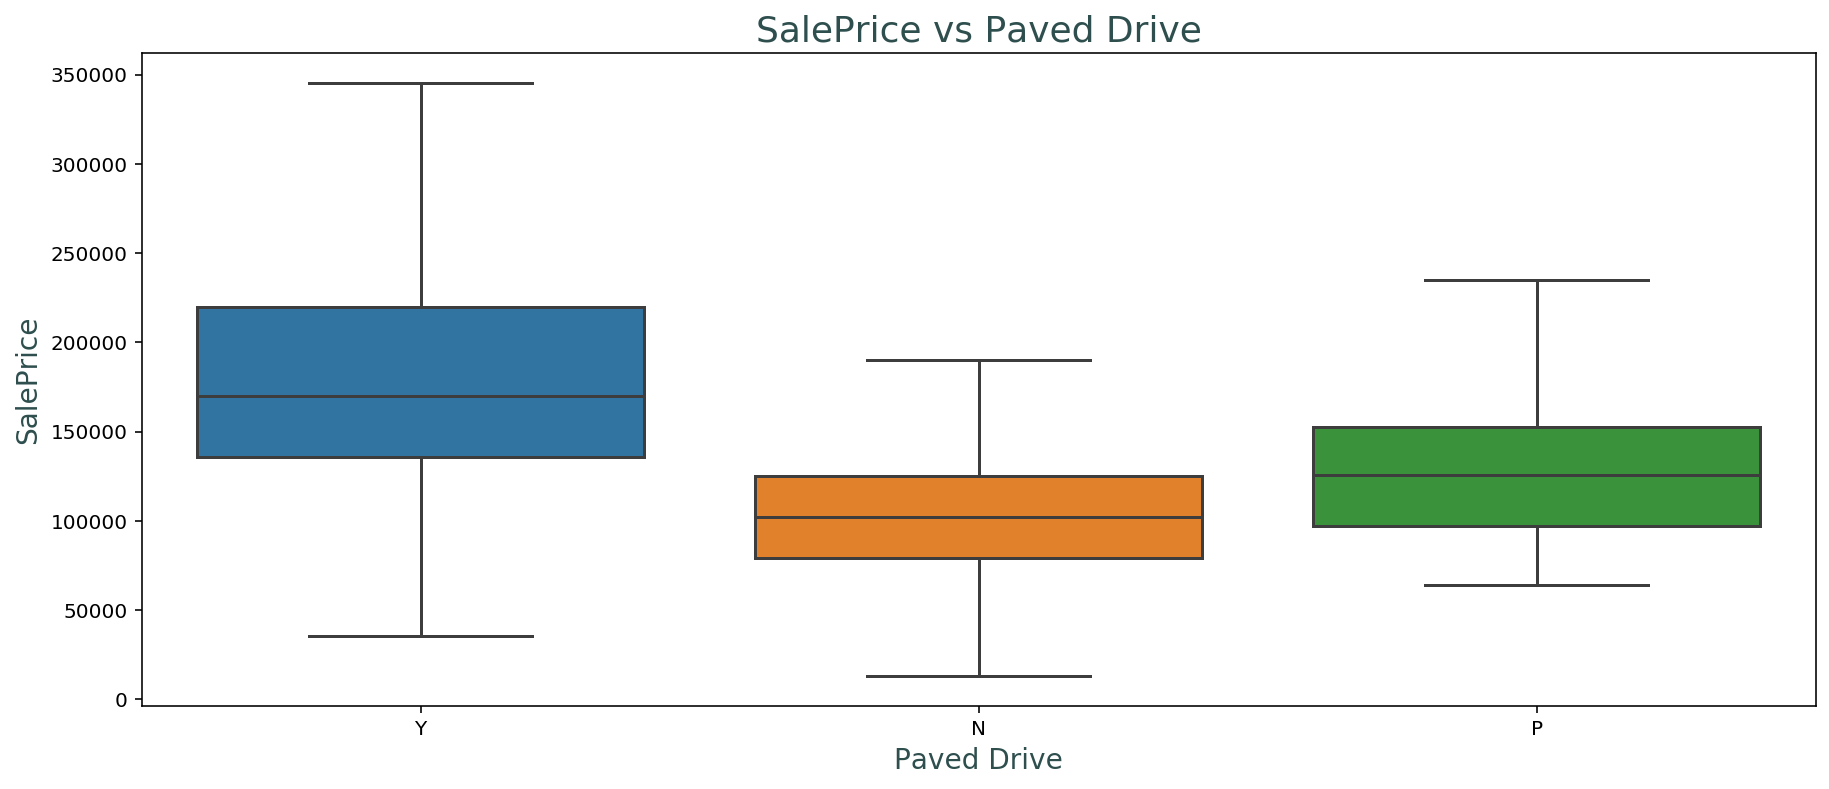

In [536]:
xf=df['Paved Drive']
yf=df['SalePrice']
xlabel='Paved Drive'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [537]:
df['Paved Drive'].value_counts(normalize=True)

Y    0.903014
N    0.077326
P    0.019659
Name: Paved Drive, dtype: float64

**'Paved Drive' feature has 'Y'class present in 90% of the observations. So will be dropped**

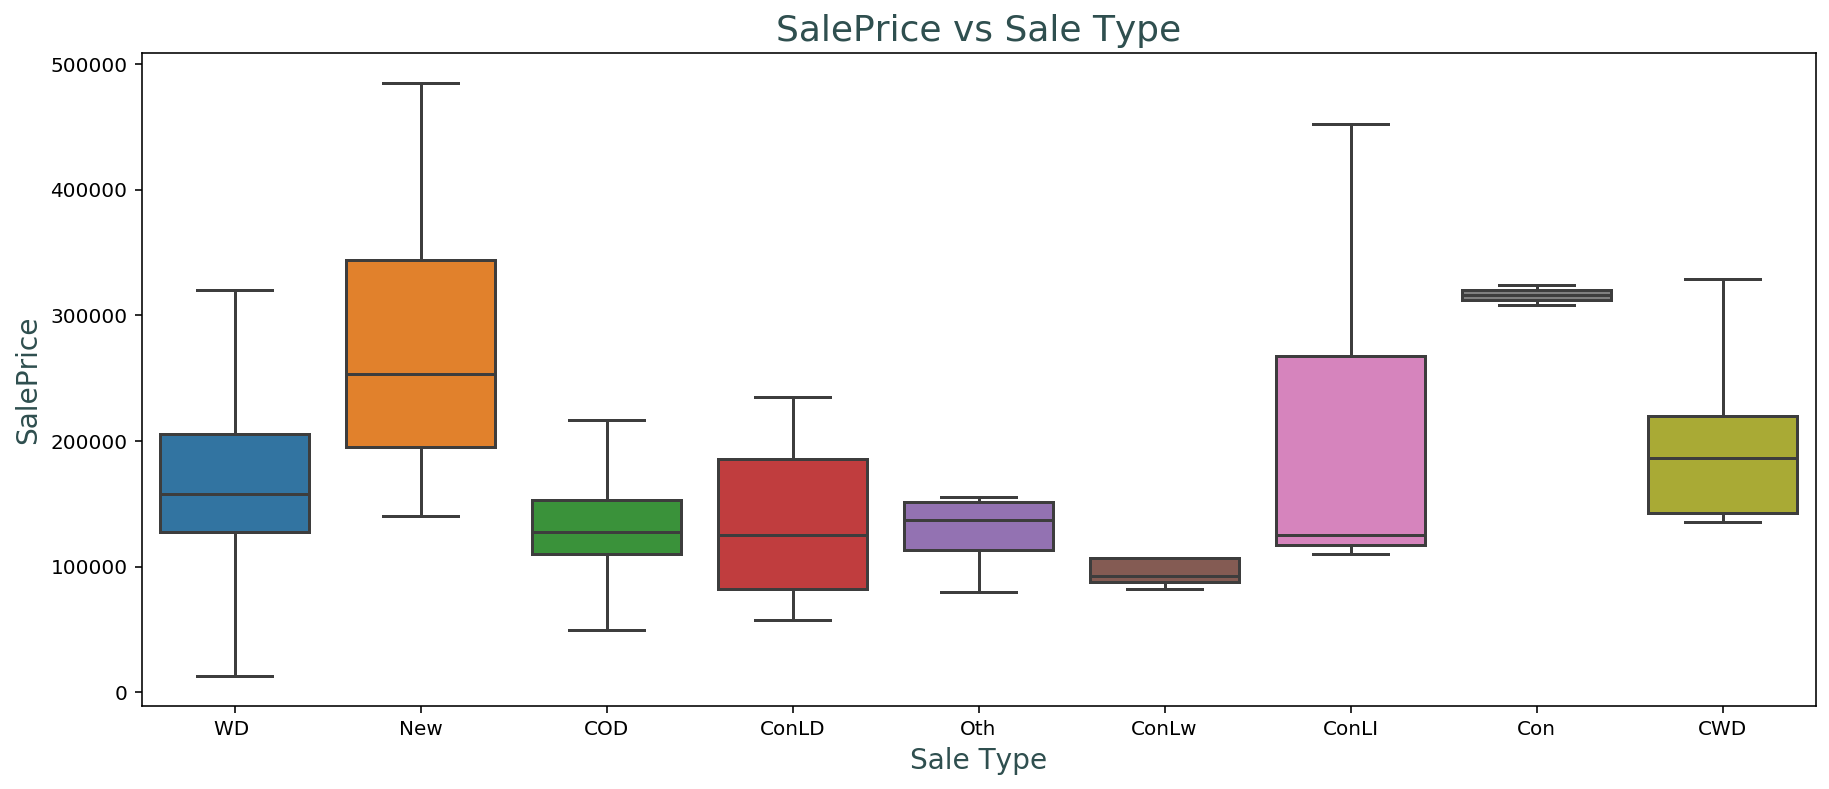

In [538]:
xf=df['Sale Type']
yf=df['SalePrice']
xlabel='Sale Type'
ylabel='SalePrice'
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x=xf,y=yf,showfliers=False);
ax.set_title(ylabel + ' vs ' +  xlabel ,color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

In [539]:
df['Sale Type'].value_counts(normalize=True)

WD       0.870249
New      0.073394
COD      0.032765
ConLD    0.007208
CWD      0.005242
ConLI    0.004587
ConLw    0.002621
Oth      0.002621
Con      0.001311
Name: Sale Type, dtype: float64

**'Sale Type' feature has 'WD'class present in 87% of the observations. So will be dropped**

### Phase 1 Dropped Categorical Columns Summary
- 'MS Zoning' has 'RL' class with 77% of observations. So will be dropped
- 'Land Contour has 'Lvl' class in 89% of observations so this feature will be dropped
- 'Utilities' has 'AllPub' value in most rows so this feature will be dropped 
- 'Land Slope' : There is not enough variations of Sale price among the classes of 'Land Slope'. So will be dropped
- 'Lot Config' feature does not have significant variation of Sale price among its classes and 'Inside' class dominates with 99% of the observaitons. So 'Lot Config' will be dropped. 
- Condition 1 and Condition 2 features seem to have variation of Sales Price among their classes however 'Norm' classes dominate with 85% of observations. So both these features will be dropped
- 'Exterior 1st' and 'Exterior 2nd' do not have much variation in Sale price among their classes. So will be dropped
- 'Lot Config' feature does not have significant variation of Sale price among its classes. So will be dropped.
- Buiding Type has '1Fam' class with 84% of observations. So will be dropped
- 'House Style' feature has two majority classes and there is high overlap of Sale Price range among the two classes. So will be dropped.
- 'Roof Style' feature has 'Gable' class present in 79% of the observations. So will be dropped
- 'Roof Matl' feature has 'CompShg'class present in 98% of the observations. So will be dropped
- 'Mas Vnr Type' feature does not have significant variation in Sale price among its classes. So will be dropped.
- 'Exer Cond'feature has 'TA'class present in 86% of the observations. So will be dropped
- 'Bsmt Exposure' feature does not have significant variation in Sale price among its classes. So will be dropped.
- 'BsmtFin Type 2'feature has 'TA'class present in 87% of the observations. So will be dropped
- 'Heating' feature has 'GasA'class present in 98% of the observations. So will be dropped
- 'Electrical' feature has 'SBrkr'class present in 91% of the observations. So will be dropped
- 'Functional' feature has 'Typ'class present in 93% of the observations. So will be dropped.
- 'Garage Type' Feature has two majority classes covering over 89% and there is very big overlap of ranges between the two. So will be dropped.
- 'Garage Finish' Feature has very big overlap of Sale Price ranges among its three classes. So will be dropped.
- 'Garage Qual' feature has 'Typ'class present in 94% of the observations. So will be dropped.
- 'Garage Cond' feature has 'TA'class present in 96% of the observations. So will be dropped
- 'Paved Drive' feature has 'Y'class present in 90% of the observations. So will be dropped
- 'Sale Type' feature has 'WD'class present in 87% of the observations. So will be dropped
- 'Street' since it has only only one value 'Pave' in 99% of the rows
- Drop PoolQC, Misc Feature, Alley and Fence and Fireplace QU features which have greater that 40 percent of rows with missing values 

In [540]:
print (df.shape,df_test.shape,test.shape)
df.drop(['MS Zoning','Land Contour','Utilities','Land Slope','Land Slope', \
         'Exterior 1st','Exterior 2nd','Lot Config','Condition 1','Condition 2', \
         'Exterior 1st','Exterior 2nd','Bldg Type','House Style','Roof Style', \
         'Roof Matl','Mas Vnr Type','Exter Cond','Bsmt Exposure','BsmtFin Type 2', \
         'Heating','Electrical','Functional','Garage Type', \
         'Garage Finish','Garage Qual','Garage Cond','Paved Drive','Sale Type'] \
         ,axis=1,inplace=True)

df_test.drop(['MS Zoning','Land Contour','Utilities','Land Slope','Land Slope', \
         'Exterior 1st','Exterior 2nd','Lot Config','Condition 1','Condition 2', \
         'Exterior 1st','Exterior 2nd','Bldg Type','House Style','Roof Style', \
         'Roof Matl','Mas Vnr Type','Exter Cond','Bsmt Exposure','BsmtFin Type 2', \
         'Heating','Electrical','Functional','Garage Type', \
         'Garage Finish','Garage Qual','Garage Cond','Paved Drive','Sale Type'] \
         ,axis=1,inplace=True)


test.drop(['MS Zoning','Land Contour','Utilities','Land Slope','Land Slope', \
         'Exterior 1st','Exterior 2nd','Lot Config','Condition 1','Condition 2', \
         'Exterior 1st','Exterior 2nd','Bldg Type','House Style','Roof Style', \
         'Roof Matl','Mas Vnr Type','Exter Cond','Bsmt Exposure','BsmtFin Type 2', \
         'Heating','Electrical','Functional','Garage Type', \
         'Garage Finish','Garage Qual','Garage Cond','Paved Drive','Sale Type'] \
         ,axis=1,inplace=True)

# Dropping Street since it has only only one value 'Pave' in 99% of the rows
df.drop(['Street'],axis=1,inplace=True)
df_test.drop(['Street'],axis=1,inplace=True)
test.drop(['Street'],axis=1,inplace=True)

#Drop PoolQC, Misc Feature, Alley and Fence and Fireplace QU features which have greater that 40 
# percent with missing value 
df.drop(['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu'],axis=1,inplace=True)
df_test.drop(['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu'],axis=1,inplace=True)
test.drop(['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu'],axis=1,inplace=True)

print (df.shape,df_test.shape,test.shape)

(1526, 58) (513, 58) (879, 57)
(1526, 26) (513, 26) (879, 25)


### Data Cleaning &  Feature Engineering of selected categorical predictors

In [541]:
df['Bsmt Qual'].isnull().sum()

42

In [542]:
df['Bsmt Cond'].isnull().sum()

42

In [543]:
# Replacing missing values of 'Bsmt Qual' and Bsmt Cond' with 'Missing' since
# very few observations have missing values for these two feature

In [544]:
df['Bsmt Qual'].fillna('NA', inplace = True) 
df['Bsmt Cond'].fillna('NA', inplace = True)
df['BsmtFin Type 1'].fillna('NA', inplace = True)

df_test['Bsmt Qual'].fillna('NA', inplace = True) 
df_test['Bsmt Cond'].fillna('NA', inplace = True)
df_test['BsmtFin Type 1'].fillna('NA', inplace = True)

test['Bsmt Qual'].fillna('NA', inplace = True) 
test['Bsmt Cond'].fillna('NA', inplace = True)
test['BsmtFin Type 1'].fillna('NA', inplace = True)


In [545]:
df['Bsmt Qual'].isnull().sum()

0

In [546]:
df['Bsmt Cond'].isnull().sum()

0

In [547]:
# using get_dummies for the selected nominal categorical features

print (df.shape,df_test.shape,test.shape)

df = pd.get_dummies(df, columns=['Neighborhood'],drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Neighborhood'],drop_first=True)
test = pd.get_dummies(test, columns=['Neighborhood'],drop_first=True)

df = pd.get_dummies(df, columns=['Foundation'],drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Foundation'],drop_first=True)
test = pd.get_dummies(test, columns=['Foundation'],drop_first=True)

print (df.shape,df_test.shape,test.shape)

(1526, 26) (513, 26) (879, 25)
(1526, 56) (513, 54) (879, 53)


In [548]:
set(df.columns).difference(set(test.columns))

{'Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'SalePrice'}

In [549]:
# the three columns which are not in 
set(df.columns).difference(set(df_test.columns))

{'Foundation_Wood', 'Neighborhood_Landmrk'}

In [550]:
# the three columns which are not in 
set(df_test.columns).difference(set(test.columns))

{'Neighborhood_GrnHill', 'SalePrice'}

In [551]:
# Dropping  columns in df, df_test and test to to match the number of columns across the three datasets
print (df.shape,df_test.shape,test.shape)

# Drop 'Neighborhood_Landmrk','Neighborhood_GrnHill' & 'Foundation_Wood' features from df and 
#'Neighborhood_GrnHill' from df_test and 
# 'Foundation_Wood' from test   
df.drop(['Neighborhood_Landmrk','Neighborhood_GrnHill','Foundation_Wood'],axis=1,inplace=True)
df_test.drop(['Neighborhood_GrnHill'],axis=1,inplace=True)
test.drop(['Foundation_Wood'],axis=1,inplace=True)

print (df.shape,df_test.shape,test.shape)

(1526, 56) (513, 54) (879, 53)
(1526, 53) (513, 53) (879, 52)


In [552]:
# map numerical order to ordinal features
# Lot Shape    - ordinal
# Exter Qual   - ordinal
# Bsmt Qual    - ordinal
# Bsmt Cond    - ordinal
# BsmtFin Type 1 - ordinal
# Heating QC   - ordinal
# Central Air  - ordinal
# Kitchen Qual - ordinal

df['Lot Shape'] = df['Lot Shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
df['Exter Qual'] = df['Exter Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['Bsmt Qual'] = df['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})
df['Bsmt Cond'] = df['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
df['Heating QC'] = df['Heating QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})
df['Central Air'] = df['Central Air'].map({'Y':1,'N':0})
df['Kitchen Qual'] = df['Kitchen Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})

df_test['Lot Shape'] = df_test['Lot Shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
df_test['Exter Qual'] = df_test['Exter Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df_test['Bsmt Qual'] = df_test['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})
df_test['Bsmt Cond'] = df_test['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})
df_test['BsmtFin Type 1'] = df_test['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
df_test['Heating QC'] = df_test['Heating QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})
df_test['Central Air'] = df_test['Central Air'].map({'Y':1,'N':0})
df_test['Kitchen Qual'] = df_test['Kitchen Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})

test['Lot Shape'] = test['Lot Shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
test['Exter Qual'] = test['Exter Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test['Bsmt Qual'] = test['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})
test['Bsmt Cond'] = test['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
test['Heating QC'] = test['Heating QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})
test['Central Air'] = test['Central Air'].map({'Y':1,'N':0})
test['Kitchen Qual'] = test['Kitchen Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})

print (df.shape,df_test.shape,test.shape)

(1526, 53) (513, 53) (879, 52)


In [553]:
# phase 1 saving cleaned, transformed and selected feature set for modelling
df.to_csv('../datasets/x_train_for_mod.csv',index=False)
df_test.to_csv('../datasets/x_test_for_mod.csv',index=False)
y_train.to_csv('../datasets/y_train_for_mod.csv',index=False)
y_test.to_csv('../datasets/y_test_for_mod.csv',index=False)
test.to_csv('../datasets/test_for_mod.csv',index=False)


In [554]:
df.isnull().sum()

Lot Area                0
Lot Shape               0
Overall Qual            0
Mas Vnr Area            0
Exter Qual              0
Bsmt Qual               0
Bsmt Cond               0
BsmtFin Type 1          0
BsmtFin SF 1            0
Total Bsmt SF           0
Heating QC              0
Central Air             0
1st Flr SF              0
Gr Liv Area             0
Full Bath               0
Kitchen Qual            0
TotRms AbvGrd           0
Fireplaces              0
Garage Cars             0
Garage Area             0
SalePrice               0
vintage                 0
new_age                 0
garage_age              0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_Greens     0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood


## Phase 1 Modeling

## Summary of selected features for phase 1 modeling 
### Continous
- Overall Qual    
- Gr Liv Area.  
- Garage Area     
- Garage Cars  - dropped in phase 2  
- Total Bsmt SF   

- 1st Flr SF      
- Year Built.    
- Year Remod/Add  
- Full Bath       
- Mas Vnr Area    

- TotRms AbvGrd  - dopped in phase 2 
- Fireplaces      
- BsmtFIn SF 1    
- vintage
- new_age
- garage_age
- Lot Area        - less than .4, so exception, however intutively lot area should have high influence on sales price. So will be interesting to see how 'Lot Area' fairs though lassoCV modeling.

### Categorical
- Neighborhood - nominal  (Converted into one-hot-encoded)
- Foundation   - nominal  (Converted into one-hot-encoded) 

- Lot Shape    - ordinal
- Exter Qual   - ordinal
- Bsmt Qual    - ordinal
- Bsmt Cond    - ordinal
- BsmtFin Type 1 - ordinal
- Heating QC   - ordinal
- Central Air  - ordinal
- Kitchen Qual - ordinal

### Model # lr1 

In [555]:
# Buiding first LR1 model with most correlated feature 'Overall Qual' for sample submission to Kaggle

In [556]:
# Define predictors and target for linear regression model lr1 using original train dataset.
X = orig_train[['Overall Qual']]
y = orig_train['SalePrice']
test =  orig_test[['Overall Qual']]

In [557]:
# Create instance lr1 of LinearRegression() and fit lr1 for X_train & y_train
#lr1 = LinearRegression()
lr1 = LinearRegression()
lr1.fit(X,y)
y_preds = lr1.predict(X)

In [558]:
# Run the lr1 model on X_test data
y_test_preds = lr1.predict(test)

In [559]:
submission = pd.DataFrame({
        "Id": orig_test["Id"],
        "SalePrice": y_test_preds})

submission.to_csv('../datasets/submission.csv', index=False)

## Phase 1 of  modeling thru Phase1_Modeling_Project_2_VK.ipynb
**Important Note : Phase 1 modeling notebook will use datasets created with suffix '_mod.csv'

## Phase 2 EDA and Feature Engineering 

### Load data again from the .csv files before phase 1 modeling

In [560]:
orig_test = pd.read_csv('../datasets/test.csv')
test = pd.read_csv('../datasets/test_for_mod.csv')
df = pd.read_csv('../datasets/x_train_for_mod.csv')
df_test = pd.read_csv('../datasets/x_test_for_mod.csv')
y_train = pd.read_csv('../datasets/y_train_for_mod.csv')
y_test = pd.read_csv('../datasets/y_test_for_mod.csv')

### Approach
- Drop all features with zero coef from phase 1 LassoCV model.
- Further refine outliers for SalePrice.
- Analyze collinearity among the new set is features to drop features with high collinearity.

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lot Area              1526 non-null   int64  
 1   Lot Shape             1526 non-null   int64  
 2   Overall Qual          1526 non-null   int64  
 3   Mas Vnr Area          1526 non-null   float64
 4   Exter Qual            1526 non-null   int64  
 5   Bsmt Qual             1526 non-null   int64  
 6   Bsmt Cond             1526 non-null   int64  
 7   BsmtFin Type 1        1526 non-null   int64  
 8   BsmtFin SF 1          1526 non-null   float64
 9   Total Bsmt SF         1526 non-null   float64
 10  Heating QC            1526 non-null   int64  
 11  Central Air           1526 non-null   int64  
 12  1st Flr SF            1526 non-null   int64  
 13  Gr Liv Area           1526 non-null   int64  
 14  Full Bath             1526 non-null   int64  
 15  Kitchen Qual         

### Dropping Features with zero coef from phase 1 of lassoCV model

In [562]:
print(df.shape,df_test.shape,test.shape)

(1526, 53) (513, 53) (879, 52)


In [563]:
df.drop(['Lot Shape', 'Bsmt Cond', 'Total Bsmt SF', 'Central Air', 'Full Bath',
       'garage_age', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Foundation_CBlock', 'Foundation_Stone'],axis=1,inplace=True)

In [564]:
df_test.drop(['Lot Shape', 'Bsmt Cond', 'Total Bsmt SF', 'Central Air', 'Full Bath',
       'garage_age', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Foundation_CBlock', 'Foundation_Stone'],axis=1,inplace=True)

In [565]:
test.drop(['Lot Shape', 'Bsmt Cond', 'Total Bsmt SF', 'Central Air', 'Full Bath',
       'garage_age', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Foundation_CBlock', 'Foundation_Stone'],axis=1,inplace=True)

print(df.shape,df_test.shape,test.shape)

(1526, 36) (513, 36) (879, 35)


In [566]:
# review the correlation of new set of features with SalePrice.
details = rstr(df, 'SalePrice')
display(details.sort_values(by='corr SalePrice', ascending=False))

Data shape: (1526, 36)
___________________________
Data types:
 int64      32
float64     4
Name: types, dtype: int64
___________________________


types  counts  distincts  nulls  missing_ration                                            uniques   skewness    kurtosis  corr SalePrice
SalePrice               int64    1526        677      0             0.0  [[147000.0, 118500.0, 212999.0, 118000.0, 2290...   1.238915    1.772486        1.000000
Overall Qual            int64    1526         10      0             0.0  [[5.0, 6.0, 8.0, 7.0, 9.0, 4.0, 3.0, 10.0, 2.0...   0.159085    0.093331        0.819411
Exter Qual              int64    1526          4      0             0.0                             [[3.0, 4.0, 5.0, 2.0]]   0.782841    0.078282        0.725159
Kitchen Qual            int64    1526          4      0             0.0                             [[4.0, 3.0, 5.0, 2.0]]   0.471423   -0.252677        0.703550
Gr Liv Area             int64    1526        875      0             0.0  [[1122.0, 816.0, 1500.0, 698.0, 2183.0, 1041.0...   1.192272    4.188653        0.686131
Garage Cars           float64    1526          6      0             0.0                   [[2.0, 0.0, 3.0, 1.0, 4.0, 5.0]]  -0.179161    0.355452        0.669731
Garage Area           float64    1526        450      0             0.0  [[528.0, 0.0, 674.0, 786.0, 270.0, 427.0, 531....   0.230208    0.891713        0.658802
Bsmt Qual               int64    1526          6      0             0.0                   [[3.0, 4.0, 5.0, 2.0, 0.0, 1.0]]  -1.279671    4.023279        0.620966
1st Flr SF              int64    1526        791      0             0.0  [[1122.0, 816.0, 1500.0, 698.0, 1377.0, 1041.0...   1.384310    6.421271        0.609371
Foundation_PConc        int64    1526          2      0             0.0                                       [[0.0, 1.0]]   0.192421   -1.965552        0.555117
Mas Vnr Area          float64    1526        327      0             0.0  [[0.0, 104.0, 132.0, 178.0, 40.0, 108.0, 30.0,...   2.373936    7.307298        0.487903
Fireplaces              int64    1526          5      0             0.0                        [[0.0, 1.0, 2.0, 4.0, 3.0]]   0.708853    0.206816        0.482555
TotRms AbvGrd           int64    1526         12      0             0.0  [[6.0, 5.0, 7.0, 4.0, 9.0, 11.0, 8.0, 10.0, 3....   0.760642    1.074440        0.481112
Heating QC              int64    1526          5      0             0.0                        [[5.0, 3.0, 4.0, 2.0, 1.0]]  -0.566721   -1.114570        0.469565
Neighborhood_NridgHt    int64    1526          2      0             0.0                                       [[0.0, 1.0]]   3.698378   11.693320        0.450931
BsmtFin SF 1          float64    1526        697      0             0.0  [[144.0, 816.0, 36.0, 0.0, 1002.0, 991.0, 990....   1.563136   10.231218        0.418633
BsmtFin Type 1          int64    1526          7      0             0.0              [[6.0, 1.0, 5.0, 4.0, 2.0, 3.0, 0.0]]  -0.196633   -1.582291        0.358605
Lot Area                int64    1526       1140      0             0.0  [[12000.0, 11841.0, 8760.0, 9405.0, 13837.0, 9...   6.534729   81.194117        0.282713
Neighborhood_NoRidge    int64    1526          2      0             0.0                                       [[0.0, 1.0]]   6.693054   42.853130        0.247320
Neighborhood_StoneBr    int64    1526          2      0             0.0                                       [[0.0, 1.0]]   7.471235   53.889981        0.224147
Neighborhood_Somerst    int64    1526          2      0             0.0                                       [[0.0, 1.0]]   3.558785   10.678943        0.180710
Neighborhood_Timber     int64    1526          2      0             0.0                                       [[0.0, 1.0]]   5.781638   31.468578        0.152467
Neighborhood_Veenker    int64    1526          2      0             0.0                                       [[0.0, 1.0]]  10.306213  104.354798        0.102563
Neighborhood_Crawfor    int64    1526          2      0             0.0                                       [[0.0, 1.0]]   5.141341   

### Reviewing outliers for SalePrice again.

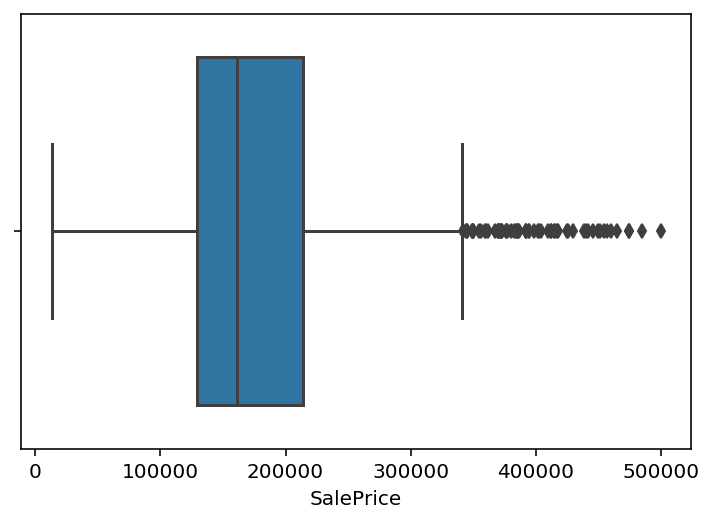

In [567]:
sns.boxplot(df['SalePrice']);

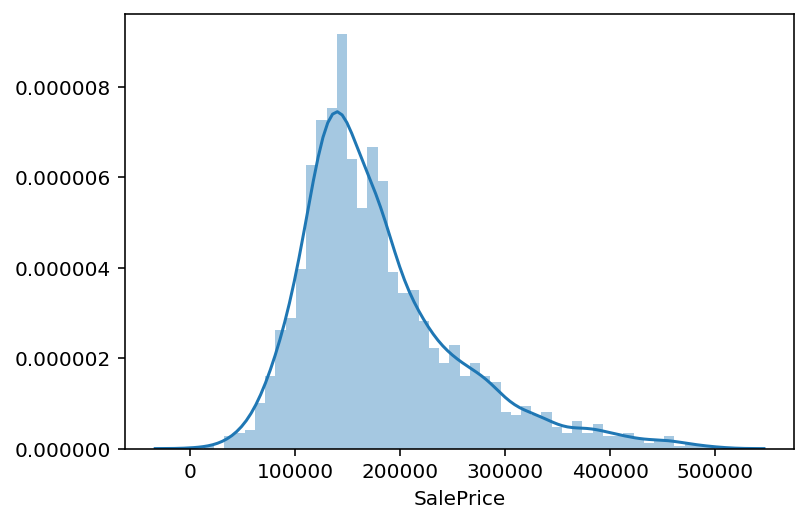

In [568]:
sns.distplot(df['SalePrice'],bins=50);

In [569]:
print(df.shape,y_train.shape)

#Phase Dropping rows with SalesPrice greater than $450,000 as tail of the outliers
df.drop(df[df['SalePrice'] > 450000].index,inplace=True)
y_train.drop(y_train[y_train['SalePrice'] > 450000].index,inplace=True)
df_test

print(df.shape,y_train.shape)

(1526, 36) (1526, 1)
(1517, 36) (1517, 1)


**9 observations with SalePrice above $450,000 were dropped** 

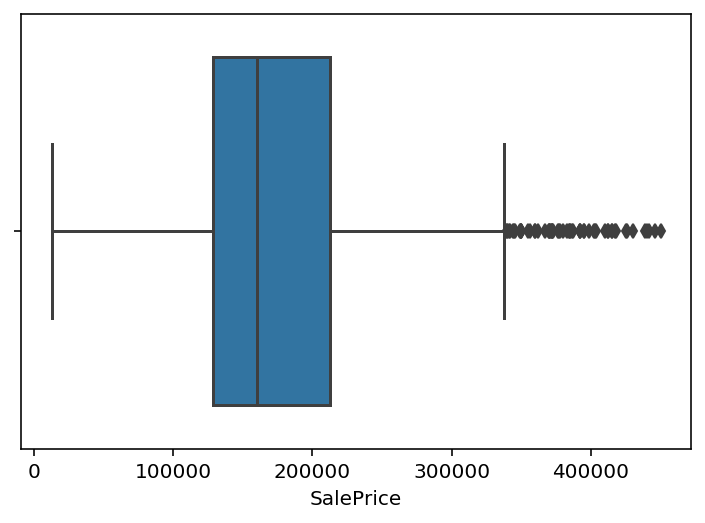

In [570]:
#Improved range for SalePrice after removal of outliers > $500,000
sns.boxplot(df['SalePrice']);

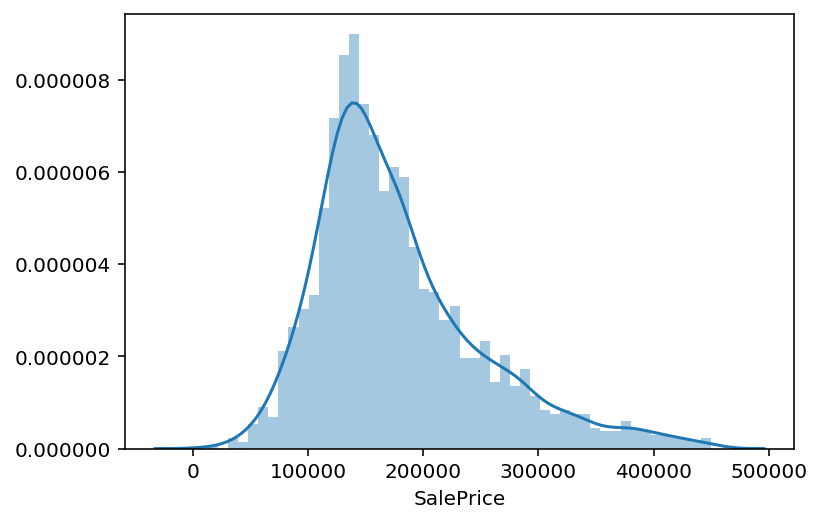

In [571]:
# Shorter tail on the right for distribution curve of SaleProce after removal of outliers > $500,000
sns.distplot(df['SalePrice'],bins=50);

In [572]:
# analysing df_test to see how many rows are with SalePrice above #450,000
df_test[df_test['SalePrice']>450000]

Lot Area  Overall Qual  Mas Vnr Area  Exter Qual  Bsmt Qual  BsmtFin Type 1  BsmtFin SF 1  Heating QC  1st Flr SF  Gr Liv Area  Kitchen Qual  TotRms AbvGrd  Fireplaces  Garage Cars  Garage Area  SalePrice  vintage  new_age  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_NPkVill  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Foundation_PConc  Foundation_Slab
188     11128             9         198.0           5          5               6        2158.0           5        2490         2490             5              9           2          3.0        795.0     468000       15       14                     0                    0                     0                     0                     0                    0                     0                     0                     0                     0                     0                     0                     1                     0                    0                     0                 1                0
256     11400            10         705.0           5          5               6        1282.0           5        2633         2633             5              8           2          3.0        804.0     466500       19       18                     0                    0                     0                     0                     0                    0                     0                     0                     1                     0                     0                     0                     0                     0                    0                     0                 1                0

**Only two rows have SalePrice greater than $450,000 in df_test dataframe.**

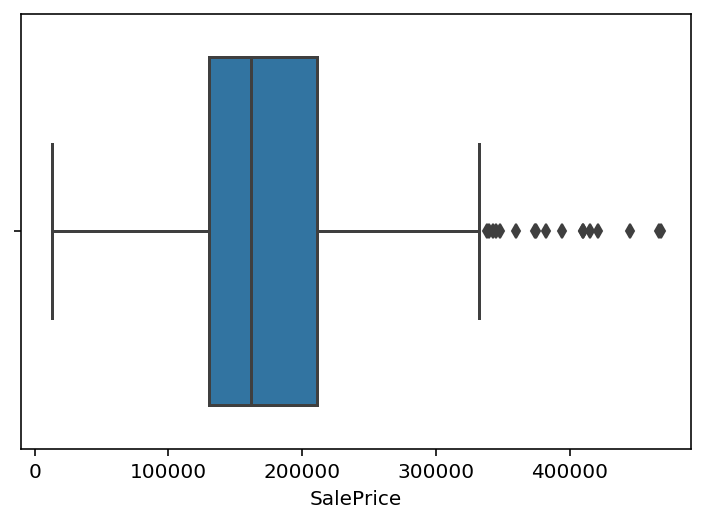

In [573]:
sns.boxplot(df_test['SalePrice']);

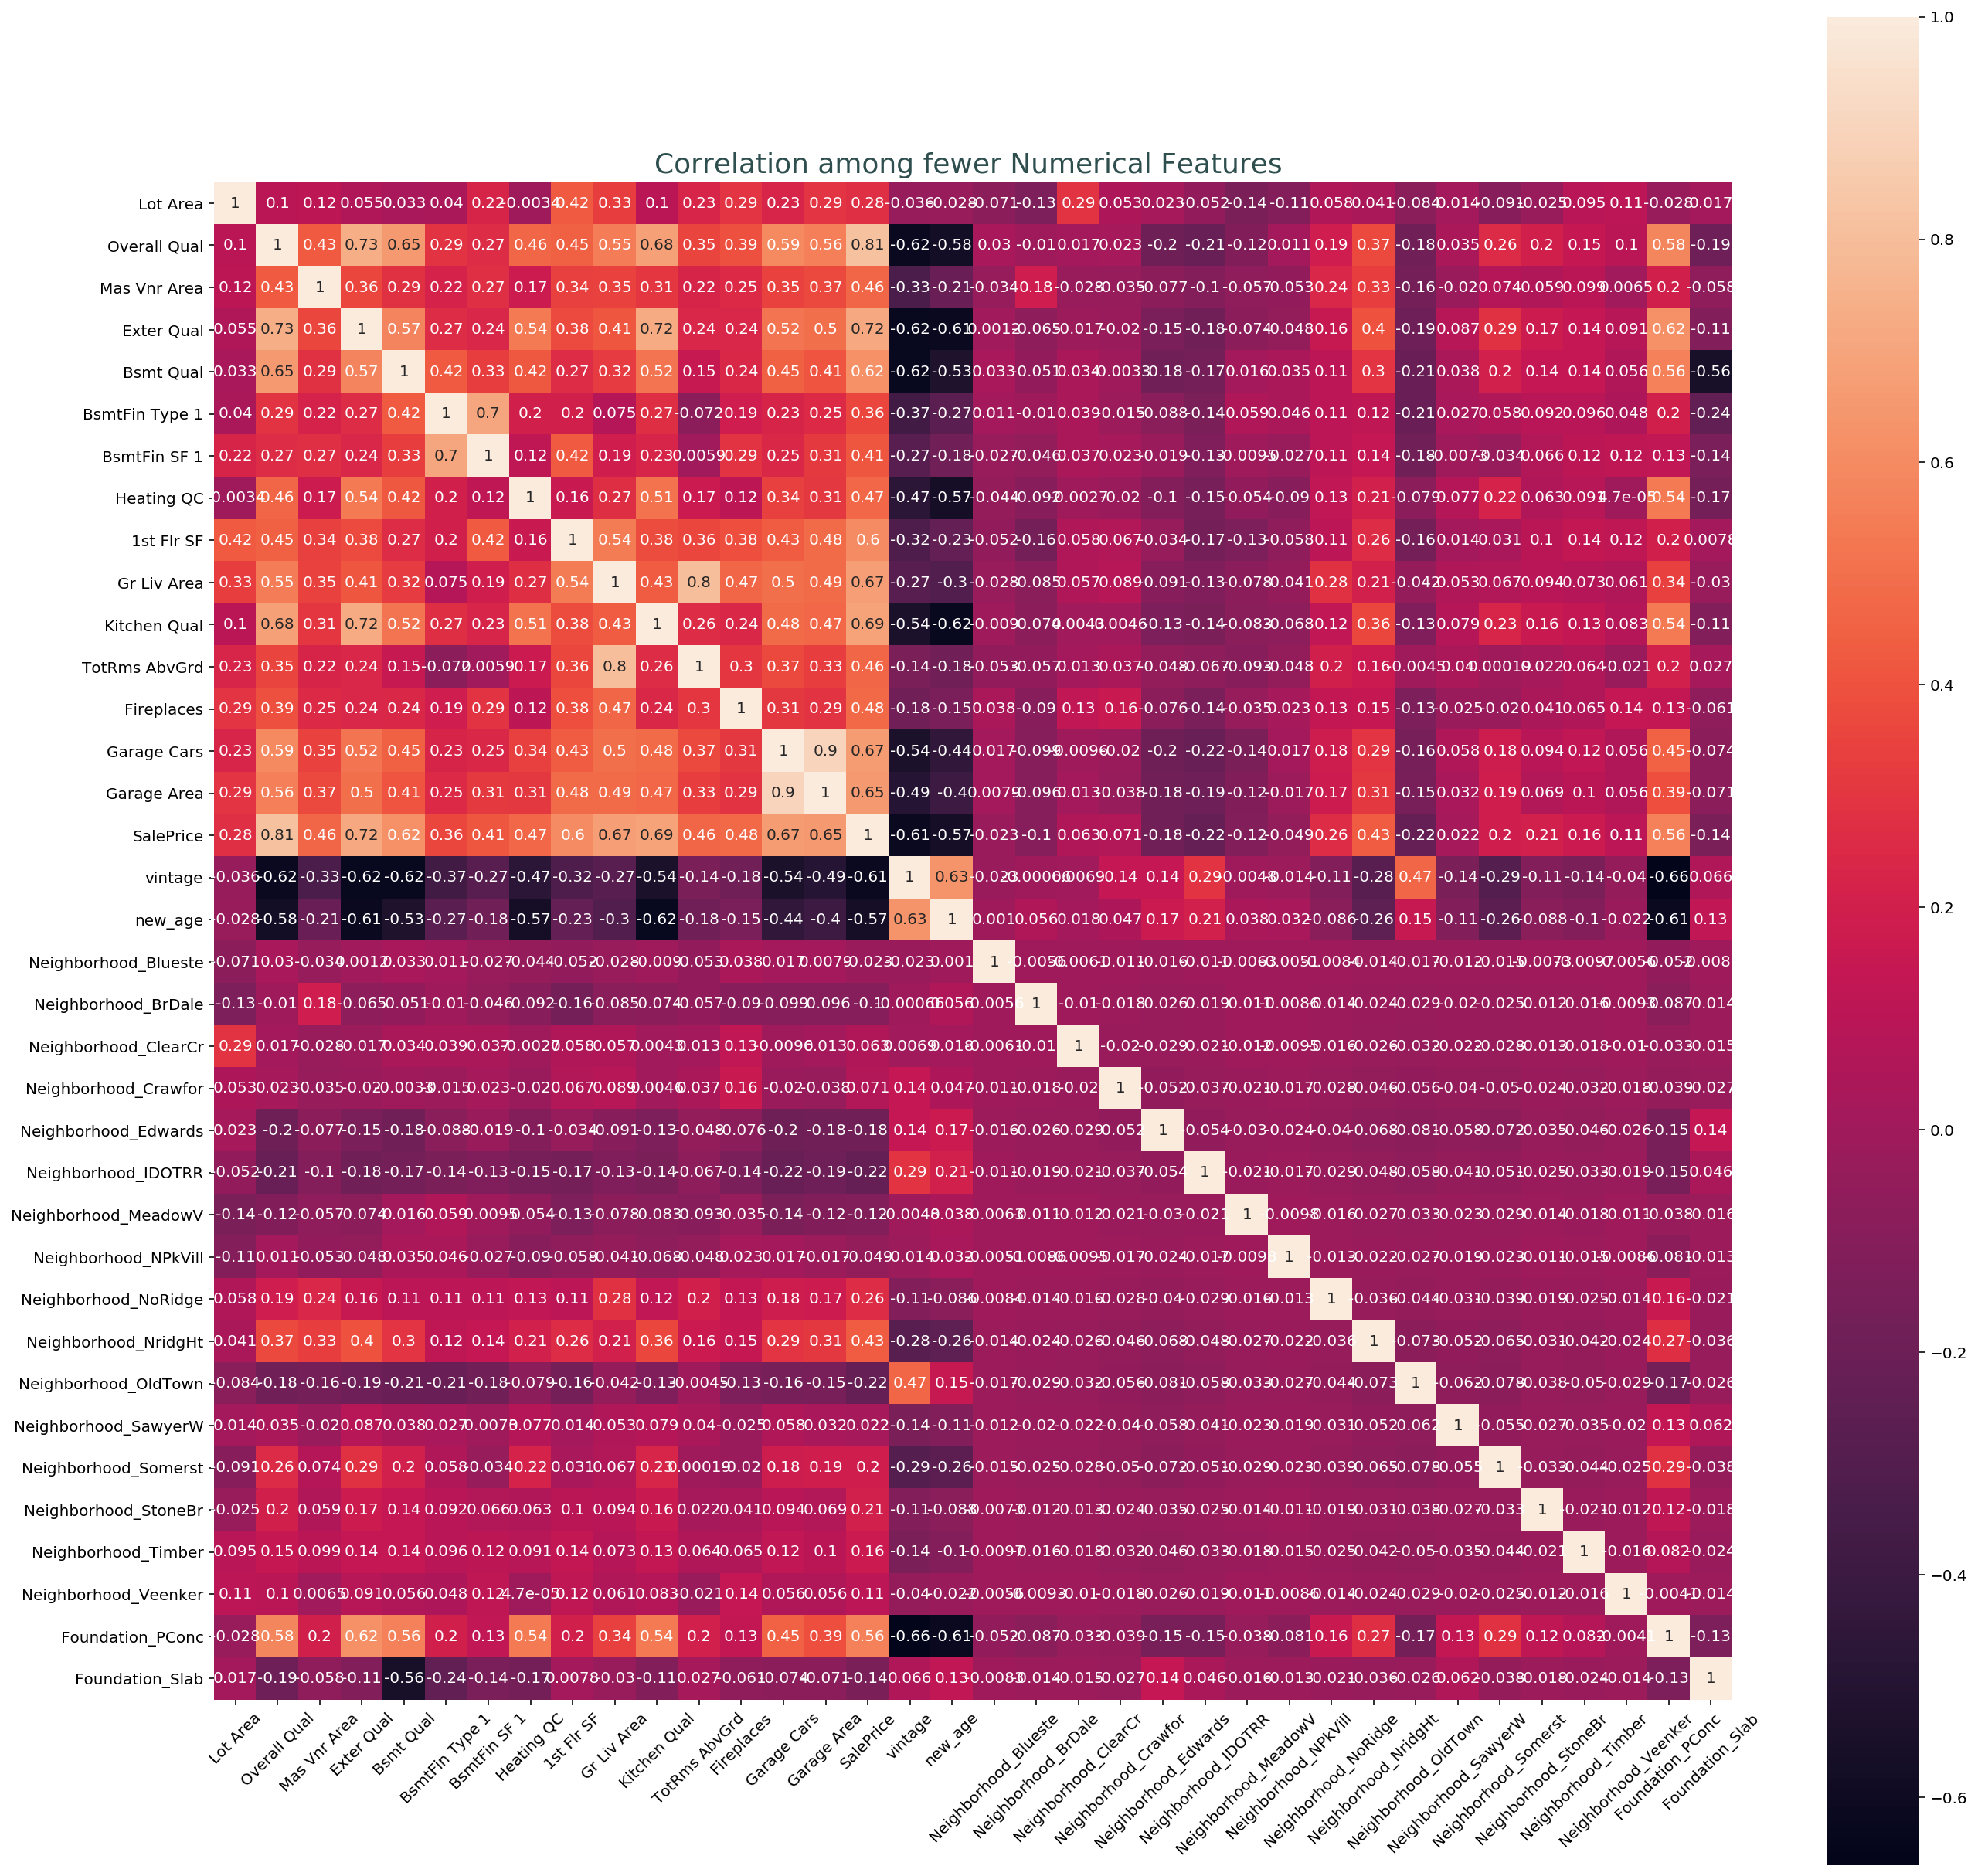

In [574]:
#  Analyze correlation among all features
subset_corr = df.corr()
fig, ax = plt.subplots(figsize=(22,22));
ax = sns.heatmap(subset_corr, annot=True,square=True);
ax.set_title("Correlation among fewer Numerical Features ",color=my_title_col, fontsize = my_title_font);
plt.xticks(rotation=45);
plt.yticks(rotation=0);

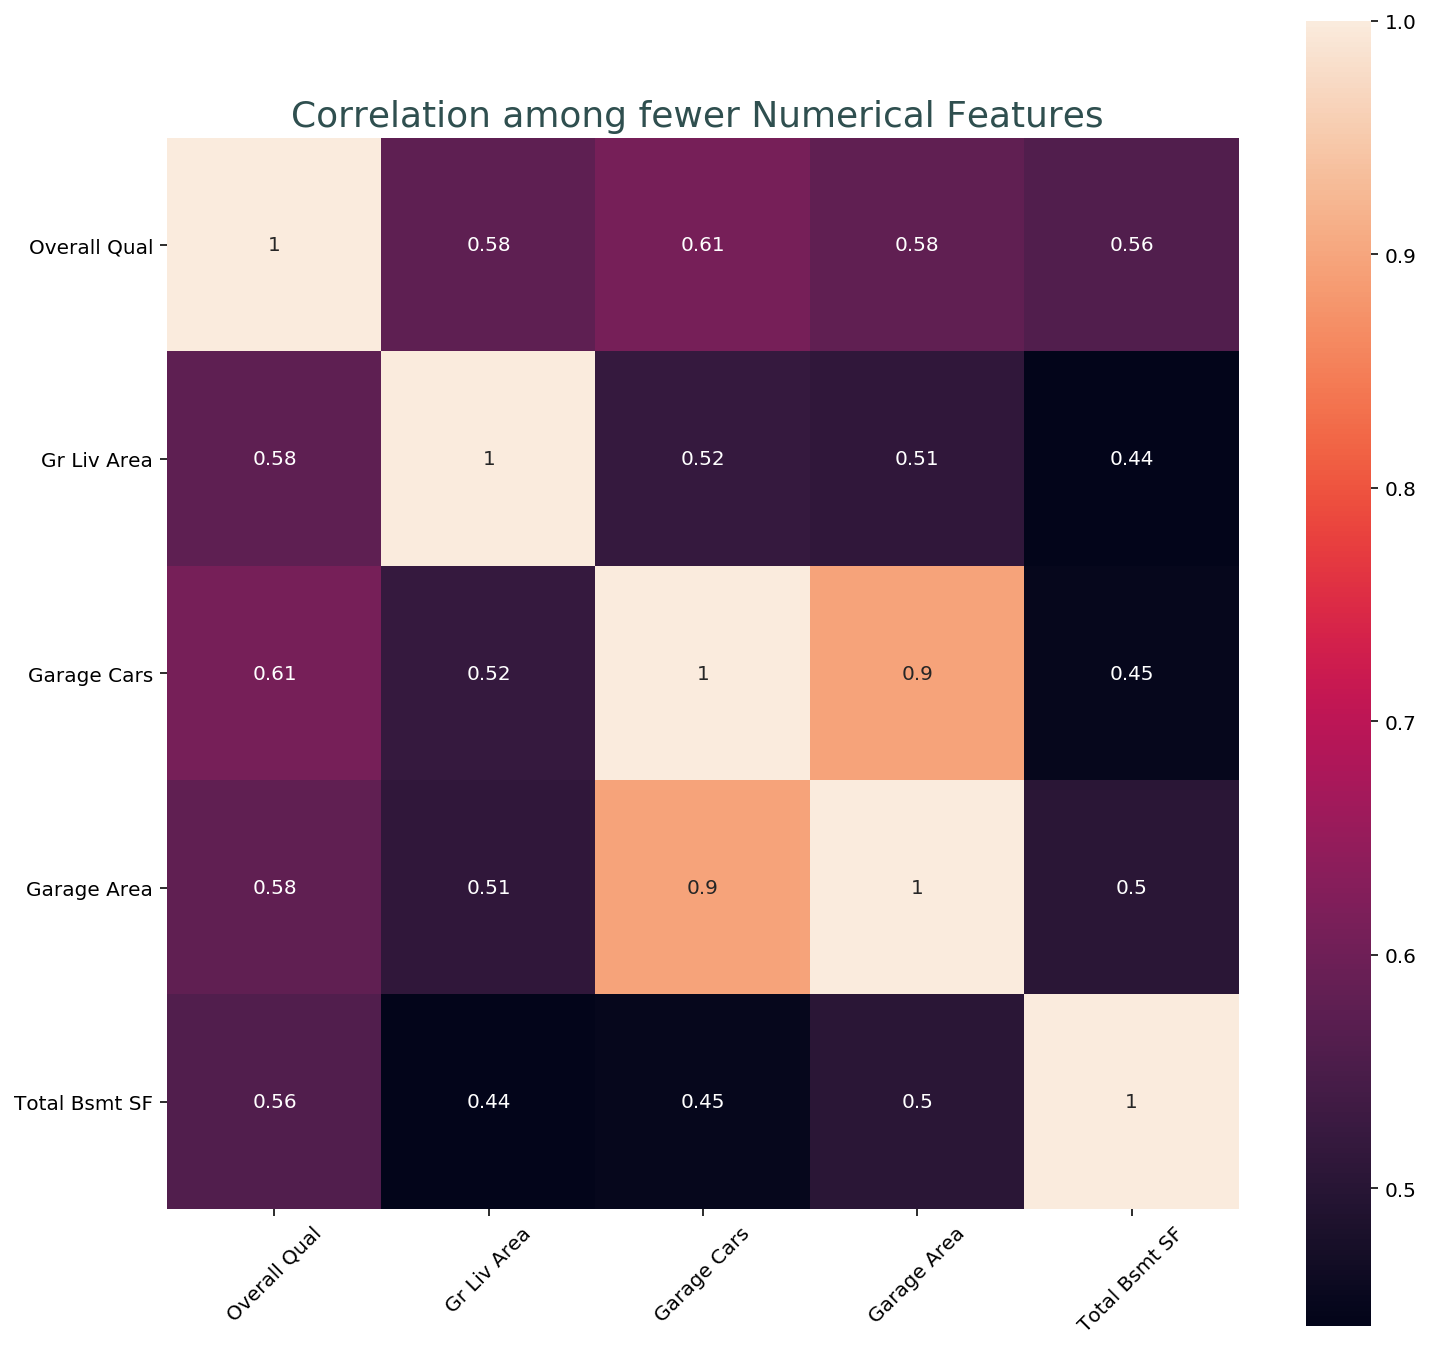

In [575]:
#  Analyze co-linearity among fewer numerical features which have high correlation with 'SalePrice'
subset_corr = sel_nums_df[['Overall Qual','Gr Liv Area','Garage Cars','Garage Area','Total Bsmt SF']].corr()
fig, ax = plt.subplots(figsize=(12,12));
ax = sns.heatmap(subset_corr, annot=True,square=True);
ax.set_title("Correlation among fewer Numerical Features ",color=my_title_col, fontsize = my_title_font);
plt.xticks(rotation=45);
plt.yticks(rotation=0);

**Observation: Garage Cars and Garage Area are highly correlated, so 'Garage Cars' will be dropped in the phase 2.** 

In [576]:
# Analysis of correlation of 'Overall Qual' with other selected numeric features. 
corr_overall_qual = df.corr()['Overall Qual']
corr_overall_qual.sort_values(ascending=False)

Overall Qual            1.000000
SalePrice               0.814837
Exter Qual              0.734696
Kitchen Qual            0.677528
Bsmt Qual               0.650404
Garage Cars             0.592460
Foundation_PConc        0.581244
Garage Area             0.557059
Gr Liv Area             0.548341
Heating QC              0.462376
1st Flr SF              0.447747
Mas Vnr Area            0.427519
Fireplaces              0.390318
Neighborhood_NridgHt    0.365354
TotRms AbvGrd           0.353876
BsmtFin Type 1          0.287030
BsmtFin SF 1            0.265869
Neighborhood_Somerst    0.259649
Neighborhood_StoneBr    0.200688
Neighborhood_NoRidge    0.185374
Neighborhood_Timber     0.145806
Neighborhood_Veenker    0.103097
Lot Area                0.100618
Neighborhood_SawyerW    0.035397
Neighborhood_Blueste    0.029730
Neighborhood_Crawfor    0.023361
Neighborhood_ClearCr    0.016557
Neighborhood_NPkVill    0.011072
Neighborhood_BrDale    -0.010199
Neighborhood_MeadowV   -0.119089
Neighborho

**Observation: 'Overall Qual' feature has correlation with almost all other numerical features and highest with 'Exter Qual'feature. So 'Exter Qual'feature will be dropped **

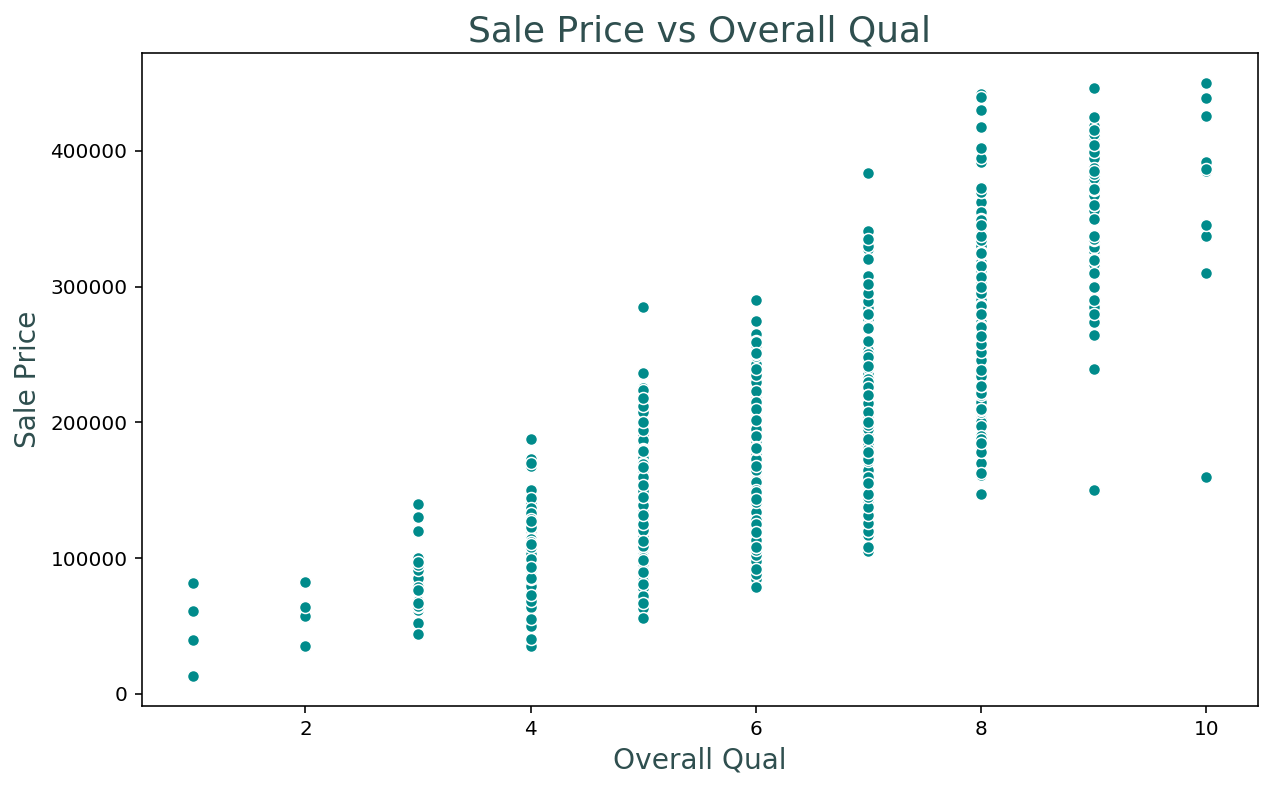

In [577]:
# Scatter plot to visually reflect the corrrelation between sales price and Overall Qual. 
xf=df['Overall Qual']
yf=df['SalePrice']
xlabel='Overall Qual'
ylabel='Sale Price'
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x=xf,y=yf,color=my_graph_col);
ax.set_title("Sale Price vs Overall Qual",color=my_title_col, fontsize = my_title_font);
ax.set_xlabel(xlabel,color=my_label_col, fontsize = my_label_font);
ax.set_ylabel(ylabel,color=my_label_col, fontsize = my_label_font);

**Observation: Most houses with high 'Overall Qual' have high sale price.**  

In [578]:
# Analysis of correlation of 'Gr Liv Area' with other selected numeric features. 
corr_gr_liv_area = df.corr()['Gr Liv Area']
corr_gr_liv_area.sort_values(ascending=False)

Gr Liv Area             1.000000
TotRms AbvGrd           0.800473
SalePrice               0.674897
Overall Qual            0.548341
1st Flr SF              0.542033
Garage Cars             0.498004
Garage Area             0.485809
Fireplaces              0.465836
Kitchen Qual            0.430320
Exter Qual              0.412005
Mas Vnr Area            0.348093
Foundation_PConc        0.339545
Lot Area                0.327190
Bsmt Qual               0.323674
Neighborhood_NoRidge    0.283788
Heating QC              0.268628
Neighborhood_NridgHt    0.206711
BsmtFin SF 1            0.189243
Neighborhood_StoneBr    0.094245
Neighborhood_Crawfor    0.088758
BsmtFin Type 1          0.074529
Neighborhood_Timber     0.073008
Neighborhood_Somerst    0.066680
Neighborhood_Veenker    0.060763
Neighborhood_ClearCr    0.057366
Neighborhood_SawyerW    0.053486
Neighborhood_Blueste   -0.027916
Foundation_Slab        -0.030363
Neighborhood_NPkVill   -0.041260
Neighborhood_OldTown   -0.042320
Neighborho

**Observation: 'Gr Liv Area' has high correlation of .81 with 'TotRms AbvGrd', so 'TotRms AbvGrd' will be dropped in phase 2.**

In [579]:
# Analysis of correlation of 'new_age' with other selected numeric features. 
corr_new_age = df.corr()['new_age']
corr_new_age.sort_values(ascending=False)

new_age                 1.000000
vintage                 0.631540
Neighborhood_IDOTRR     0.208093
Neighborhood_Edwards    0.165612
Neighborhood_OldTown    0.153035
Foundation_Slab         0.127345
Neighborhood_BrDale     0.056008
Neighborhood_Crawfor    0.047423
Neighborhood_MeadowV    0.037565
Neighborhood_NPkVill    0.032498
Neighborhood_ClearCr    0.018386
Neighborhood_Blueste    0.001048
Neighborhood_Veenker   -0.022054
Lot Area               -0.027713
Neighborhood_NoRidge   -0.085676
Neighborhood_StoneBr   -0.087823
Neighborhood_Timber    -0.104126
Neighborhood_SawyerW   -0.111102
Fireplaces             -0.145995
BsmtFin SF 1           -0.175500
TotRms AbvGrd          -0.180453
Mas Vnr Area           -0.212576
1st Flr SF             -0.230030
Neighborhood_NridgHt   -0.255681
Neighborhood_Somerst   -0.264826
BsmtFin Type 1         -0.270855
Gr Liv Area            -0.304503
Garage Area            -0.395047
Garage Cars            -0.442950
Bsmt Qual              -0.528830
Heating QC

**Observation: None fo the features have collinearity of more than 0.8 with new_age feature**

In [580]:
# Analysis of correlation of 'vintage' with other selected numeric features. 
corr_vintage = df.corr()['vintage']
corr_vintage.sort_values(ascending=False)

vintage                 1.000000
new_age                 0.631540
Neighborhood_OldTown    0.466630
Neighborhood_IDOTRR     0.290912
Neighborhood_Crawfor    0.141138
Neighborhood_Edwards    0.140390
Foundation_Slab         0.065511
Neighborhood_ClearCr    0.006861
Neighborhood_BrDale    -0.000657
Neighborhood_MeadowV   -0.004773
Neighborhood_NPkVill   -0.014137
Neighborhood_Blueste   -0.023026
Lot Area               -0.036032
Neighborhood_Veenker   -0.039932
Neighborhood_StoneBr   -0.113004
Neighborhood_NoRidge   -0.114688
TotRms AbvGrd          -0.135670
Neighborhood_SawyerW   -0.136000
Neighborhood_Timber    -0.136211
Fireplaces             -0.182614
Gr Liv Area            -0.272279
BsmtFin SF 1           -0.273284
Neighborhood_NridgHt   -0.277556
Neighborhood_Somerst   -0.291260
1st Flr SF             -0.318990
Mas Vnr Area           -0.333760
BsmtFin Type 1         -0.374029
Heating QC             -0.466612
Garage Area            -0.492079
Garage Cars            -0.540646
Kitchen Qu

**Observation: Vintage has collinearity of more than 0.8 with garage age feature, so 'garage_age' will be dropped in phase 2.**

### Phase 2 - Dropping of Features
- Observation: 'Overall Qual' feature has correlation with almost all other numerical features and highest with 'Exter Qual'feature. So 'Exter Qual'feature will be dropped.
- 'Garage Cars' and Garage Area are highly correlated, so 'Garage Cars' will be dropped.
- 'Gr Liv Area' has high correlation of .81 corr coef with 'TotRms AbvGrd', so 'TotRms AbvGrd' will be dropped.
- While 'Exter Qual' feature was selected to be dropped through collinearity analysis, it was re-instated as the Kaggle RMSE score did not improve after dropping 'Exter Qaul'. 

In [581]:
#phase 2 dropping of continous features 

print(df.shape,df_test.shape,test.shape)

#df.drop(['Exter Qual'],axis=1,inplace=True)
df.drop(['TotRms AbvGrd'],axis=1,inplace=True)
df.drop(['Garage Cars'],axis=1,inplace=True)


#df_test.drop(['Exter Qual'],axis=1,inplace=True)
df_test.drop(['TotRms AbvGrd'],axis=1,inplace=True)
df_test.drop(['Garage Cars'],axis=1,inplace=True)


#test.drop(['Exter Qual'],axis=1,inplace=True)
test.drop(['TotRms AbvGrd'],axis=1,inplace=True)
test.drop(['Garage Cars'],axis=1,inplace=True)


print(df.shape,df_test.shape,test.shape)

(1517, 36) (513, 36) (879, 35)
(1517, 34) (513, 34) (879, 33)


**While 'Exter Qual' feature was selected to be dropped through collinearity analysis, it was re-instated as the Kaggle RMSE score did not improve after dropping 'Exter Qaul'.**

In [582]:
# saving cleaned, transformed and selected feature set for phase 2 modeling
df.to_csv('../datasets/x_train_for_mod_p2.csv',index=False)
df_test.to_csv('../datasets/x_test_for_mod_p2.csv',index=False)
y_train.to_csv('../datasets/y_train_for_mod_p2.csv',index=False)
y_test.to_csv('../datasets/y_test_for_mod_p2.csv',index=False)
test.to_csv('../datasets/test_for_mod_p2.csv',index=False)


## Summary of selected features for phase 2 modeling 

### Continous
- Overall Qual    
- Gr Liv Area.  
- Garage Area     
- Garage Cars  - dropped in phase 2  
- Total Bsmt SF   

- 1st Flr SF      
- Year Built.    
- Year Remod/Add  
- Full Bath       
- Mas Vnr Area    

- TotRms AbvGrd  - dopped in phase 2 
- Fireplaces      
- BsmtFIn SF 1    
- vintage
- new_age
- garage_age     - dropped in phase 2
- Lot Area        - less than .4, so exception, however intutively lot area should have high influence on sales price. So will be interesting to see how 'Lot Area' fairs though lassoCV modeling.

### Categorical
- Neighborhood - nominal  (Converted into one-hot-encoded)
- Foundation   - nominal  (Converted into one-hot-encoded) 

- Lot Shape    - ordinal
- Exter Qual   - ordinal 
- Bsmt Qual    - ordinal
- Bsmt Cond    - ordinal
- BsmtFin Type 1 - ordinal
- Heating QC   - ordinal
- Central Air  - ordinal
- Kitchen Qual - ordinal

## Continue with phase 2 of  modeling thru Phase2_Modeling_Project_2_VK.ipynb
**Important Note : Phase 2 modeling notebook will use datasets created with suffix '_mod_P2.csv'

## Project Summary Report 

### Phase 1  - Data Cleaning, EDA & Feature Engineering
**Observations & Actions:**
- Train dataset has 2051 observations and 81 features
- Test dataset has 879 observation and 80 features, without the target variable of SalePrice.
- One time train_test_split was done on the Train dataset with .25 ratio and those datasets were used for rest of the activities in the project.
- A logical separation of new train dataset (df) was done to analyse numerical and categorical features separately. 
- First, analysed for null values in numeric features and various imputation techniques were leveraged to replace null values.
- Some features were dropped as per the threshhold described in the 'Executive Summary'.
- Outliers for SalePrice in the train was analysed and observation above $500,000 of SalePrice were dopped to shorten the tail of the distribution curve.
- Three new features were added to replace 1) the year when house was built, 2) was last remodeled, and 3) the year when garage was buit
- Second, analyzed for categorical values, conducted visual data analysis to see how the IQRs of classes within each categorical feature mapped to SalePrice by using boxplots. Features with IQRs of their classes overalapping against SalePrice are dropped. And features with IQRs not overallping against SalePrice are checked for value count and if one of the class dominates, then that feature is dropped. 
- Selected categotical features were then clead, nominal feature are hot encoded and ordinal features are given numerical order. 
- Number of features selected were 17 numerical and 10 categorical features made of 2 nominal and 8 ordinal features coverting to 35 features, totaling it all to 52 predictors for phase 1 of modeling. 

### Phase 1 - Modeling 

- Created first submission file for Kaggle by using linear regression with just one predictor i.e. 'Overall Qual'.
- During the phase 1 of modelling, built baseline model, linear regression model, LassoCV and ElasticNetCV model listed below are the RMSE score from each of the model.  

**Baseline Model:**
- R2 score for the baseline model on validation dataset:  -0.0006156545387887569
- MSE score for the baseline model on validation dataset::  4858364177.975382
- **RMSE score for the baseline model on validation dataset: 69701.9668156888**

**Regression Model:**
- R2 of LR model on X_train:  0.8682261301880155
- R2 of LR model on X_test:  0.8154686074094704
- MSE of LR on X_train data: 750682679.5139594
- MSE of LR on X_test  data: 895969100.0306927
- **RMSE of LR on X_testdata: 29932.742941980654**

<u>Findings from LR modeling</u>
- LR model has performed better than the baseline model
- LR model was marginally overfitting as per R2 and MSE scores.
- Residual analysis was conducted on the lr model prediction and two of the LINE assumptions were validated.

**RidgeCV Model with CV=5 and alpha range of logspace(0.1, 10, 100)**
- Optimal alpha value suggested by ridgeCV with cv=5: 398.1071705534973
- R2 score from ridgeCV model with CV=5 on X_train_scaled: 0.8629281222657397
- R2 score from ridgeCV model with CV=5 on X_test_scaled: 0.8160483447876532- 
- MSE from ridgeCV on X_train_scaled: 780864101.5884181
- MSE from ridgeCV on X_test_scaled: 893154257.6903589
- **RMSE from ridgeCV on X_test_scaled: 29885.68650190855**

<u>Findings from RidgeCV model</u>
- RidgeCV RMSE score are marginally better than the LR RMSE scores.

**LassoCV Model with number of alphas as 100**
- Optimal alpha value suggested by lassoCV with cv=5: 762.4727401079197
- R2 score from lassoCV model with CV=5 on X_train_scaled:0.8649475393461086
- R2 score from lassoCV model with CV=5 on X_test_scaled:0.8183342390822687
- MSE from lassoCV on X_train_scaled: 769359989.0727081
- MSE from lassoCV on X_test_scaled:882055383.8068427
- RMSE from lassoCV on X_test_scaled:29699.41723008791

<u>Findings from LassoCV model</u>
- RMSE score for LassoCV was marginally better than RidgeCV and LR models. 
- Out of 52, 17 features were allocated zero coefficient value.
- While 'Garage Area' had higher corr coef with SalePrice, however 'Lot Area' has higher lassCv coef than 'Garage Area'. That could be explained due to high collinearity between 'Garage Area' and 'Garage Cars'.

**ElasticNetCV Model with 50:50 ratio**
- Optimal alpha value suggested by ElasticNetCV With cv=5: 123.69302942764524
- R2 score from ElasticNet CV model with CV=5 on X_train_scaled: 0.20985665080001803
- R2 score from ElasticNet CV model with CV=5 on X_test_scaled: 0.21097576240143778
- MSE from ElasticNetCV on X_train_scaled: 4501248444.960153
- MSE from ElasticNetCV on X_test_scaled: 3831008513.723579
- **RMSE from ElasticNetCV on X_test_scaled: 61895.141277192175**

**ElasticNetCV Model with 90:10 ratio**
- Optimal alpha value suggested by ElasticNetCV With cv=5: 68.7183496820251
- R2 score from ElasticNet CV model with CV=5 on X_train_scaled: 0.6842997507819564
- R2 score from ElasticNet CV model with CV=5 on X_test_scaled: 0.6735451454688607
- MSE from ElasticNetCV on X_train_scaled: 1798465123.2020822
- MSE from ElasticNetCV on X_test_scaled: 1585060721.153018
- **RMSE from ElasticNetCV on X_test_scaled: 39812.82106499134**

<u>Findings from ElasticNet Model</u>
- While there was a significant improvement when the ratio between LassoCV and RidgeCV where changed from 50:50 to 90:10, however it still did not perform better than LassoCV model.

### Phase 2 -  EDA & Feature Engineering
**Observations & Actions:**
- Features with **zero** coefficient value from LassoCV model were dropped.
- Collinearity among the remainng features was analyzed and few three more columns dropped 
- Further reduction in the SalePrice outliers observation was done.

### Phase 2 Modeling
There were multiple iteration of features selection and adjustment in level of outliers reduction and as documented in phase 2 modeling notebook as well, the RMSE score for phase 2 - Lr and LassoCV models were better than phase 1 - LR and LassoCV score. If more time was available, I would have explored the interaction terms among the features and its impact on the performance of the models.

The best combination of feature and SalePrice outlier was used for the final selection among the submisions on Kaggle i.e **submission_lr_p2.csv**.

## Conclusion:
**For the training data that was provided for this competition, Linear Regression model performed best through combination of conducting feature selection through EDA, feature Engineering, and list of features with zero coefficient provides by LassoCV model.**




